# Profiles of Individual Radicalization in the United States (PIRUS)

Radicalization is a process by which an individual, or group comes to adopt increasingly extreme political, social, or religious ideals and aspirations that reject or undermine the status quo or undermine contemporary ideas and expressions of the nation.

**Specification:**
1. Individuals – regardless of whether they are part of a group.
2. Espousing – where it appears from the open sources that ideological motives were the prime driver of the decision to engage in illegal behavior.
3. Ideological Motives




- Islamist – An advocate or supporter of a political movement that favors reordering government and society in accordance with laws prescribed by Islam.

- Far Right – Right-wing populism often involves appeals to the "common man" and opposition to immigration. Far-right politics sometimes involves anti-immigration and anti-integration stances towards groups that are deemed inferior and undesirable.

- Far Left – The far left in the United States is essentially class-oriented and consists primarily of individuals and groups that adhere to some form of Marxism-Leninism, i.e., some form of Communism.

- Single Issue – Single issue extremists are individuals that are motivated primarily by a single issue, rather than a broad ideology. Examples in the PIRUS data of single issue extremists are individuals associated with the Puerto Rican independence movement, anti-abortion extremists, members of the Jewish Defense League, and extremists with idiosyncratic ideologies (e.g., Ted Kaczynski).

**Inclusion Criteria**
Summary: In order to be eligible for inclusion, each individual must meet one of the following five criteria:
1. the individual was arrested;
2. the individual was indicted of a crime;
3. the individual was killed as a result of his or her ideological activities;
4. the individual is/was a member of a designated terrorist organization; or
5. the individual was associated with an extremist organization whose leader(s) or founder(s) has/have been indicted of an ideologically motivated violent offense.
In addition, each individual MUST:
1. have been radicalized in the United States,
2. have espoused or currently espouse ideological motives, and
3. show evidence that his or her behaviors are/were linked to the ideological motives he or she espoused/espouses.

<hr>

# 1. Preparing Data

> **Steps**
1. Understand Raw Dara 
* Generating Tidy Dataset
* Generating Clean Dataset
    * Generating Data Quality Report
* Generating Data Quality Plan
    * Handling Data Quality Issues as per Data Quality Plan

## 1.1 Data Understanding <font color="#5C6BC0">RAW Dataset</font>

In [1]:
%matplotlib inline

# Importing the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
import seaborn as sns

# Setting pandas display all columns options to ON
pd.options.display.max_columns=999
pd.options.display.max_rows=1999

# Setting Numpy suppress scientific notation to ON
np.set_printoptions(suppress=True)

# Importing the data set as a pandas dataframe
df = pd.read_csv("terror.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# Get the number of rows and columns within the data
# df.shape
print('Rows: {}, Columns: {}'.format(df.shape[0],df.shape[1]))

Rows: 1867, Columns: 133


In [2]:
# View the top 5 instances of the data set
df.head(5)

Subject_ID Loc_Plot_State1 Loc_Plot_City1 Loc_Plot_State2  Loc_Plot_City2  \
0        1000        Illinois        Chicago         Florida  Broward County   
1        1001     Afghanistan            -99             NaN             NaN   
2        1002      California      Santa Ana             NaN             NaN   
3        1005        New York       New York             NaN             NaN   
4        1006        New York       New York             NaN             NaN   

  Date_Exposure  Plot_Target1  Plot_Target2  Plot_Target3  Attack_Preparation  \
0      5/8/2002            14           NaN           NaN                   1   
1    11/25/2001           -88           NaN           NaN                 -88   
2      5/1/1997           -99           2.0           NaN                 -99   
3     4/10/1993             1           NaN           NaN                   2   
4      3/4/1993             1           NaN           NaN                   2   

   Op_Security  Changing_Target  Anticp_Fatals_Targ  Internet_Use_Plot  \
0            2                1                   3                  1   
1          -88              -88                 -88                -88   
2          -99              -99                 -99                -99   
3            2                0                   3                -88   
4            2                0                   3                -88   

   Extent_Plot  Violent  Criminal_Severity  Criminal_Charges  Indict_Arrest  \
0            2        1                  5                 1              3   
1            0        0                  7                 1              3   
2          -99        0                 10                 1              2   
3            5        1                 10                 1              3   
4            5        1                 10                 1              3   

   Current_Status  Group_Membership Terrorist_Group_Name1  \
0               3                 2         al-Qaeda core   
1               3                 2               Taliban   
2               7                 2         al-Qaeda core   
3               3                 1                   -88   
4               3                 1                   -88   

  Terrorist_Group_Name2 Terrorist_Group_Name3  Actively_Recruited  Recruiter1  \
0                   NaN                   NaN                   1           2   
1                   NaN                   NaN                   0         -88   
2                   NaN                   NaN                   1           0   
3                   NaN                   NaN                 -99         -99   
4                   NaN                   NaN                   1           2   

   Recruiter2  Recruiter3  Actively_Connect  Group_Competition  Role_Group  \
0         3.0         NaN                 0                  0           1   
1         NaN         NaN                 2                -99           1   
2         NaN         NaN                 1                -99           2   
3         NaN         NaN                 0                  0           1   
4         NaN         NaN                 1                  0           1   

   Length_Group  Clique  Clique_Radicalize  Clique_Connect  \
0            36       1                  2               1   
1            24       1                  1               1   
2           180       1                  2               1   
3           -99       1                  2               2   
4            60       1                  2               2   

   Internet_Radicalization  Media_Radicalization  Radicalization_Islamist  \
0                        0                     0                        1   
1                        1                     1                        1   
2                        1                     1                        1   
3                      -88                   -99                        1   
4                      -88        

In [3]:
# View the last 5 instances of the data set
df.tail(5)

Subject_ID Loc_Plot_State1  Loc_Plot_City1 Loc_Plot_State2  \
1862        9406      California       San Diego           Syria   
1863        9407         Florida         Orlando           Syria   
1864        9409    Pennsylvania  Blooming Grove    Pennsylvania   
1865        9410        New York       Rochester             NaN   
1866        9411        Oklahoma           Moore             NaN   

         Loc_Plot_City2 Date_Exposure  Plot_Target1  Plot_Target2  \
1862                -99     8/14/2014           -88           NaN   
1863  Jabal al-Arba'een     5/25/2014             4           NaN   
1864         Canadensis     9/12/2014             2           3.0   
1865                NaN     5/31/2014           -88           NaN   
1866                NaN     9/25/2014            14           NaN   

      Plot_Target3  Attack_Preparation  Op_Security  Changing_Target  \
1862           NaN                 -88          -88              -88   
1863           NaN                   2          -99              -99   
1864           NaN                   2            2                0   
1865           NaN                 -88          -88              -88   
1866           NaN                   0            1                0   

      Anticp_Fatals_Targ  Internet_Use_Plot  Extent_Plot  Violent  \
1862                 -88                -88            0        1   
1863                   3                -99            5        1   
1864                   1                  1            5        1   
1865                 -88                -88            0        0   
1866                   1                  0            5        1   

      Criminal_Severity  Criminal_Charges  Indict_Arrest  Current_Status  \
1862                 10               -88            -88               8   
1863                 10               -88            -88               6   
1864                 10                 1              3               3   
1865                  5                 1              3               3   
1866                 10                 1              3               2   

      Group_Membership                        Terrorist_Group_Name1  \
1862                 2  Islamic State of Iraq and the Levant (ISIL)   
1863                 2                              Jabhat al-Nusra   
1864                 0                                          -88   
1865                 0  Islamic State of Iraq and the Levant (ISIL)   
1866                 0                                          -99   

     Terrorist_Group_Name2 Terrorist_Group_Name3  Actively_Recruited  \
1862                   NaN                   NaN                 -99   
1863                   NaN                   NaN                   0   
1864                   NaN                   NaN                   0   
1865                   NaN                   NaN                   0   
1866                   NaN                   NaN                   0   

      Recruiter1  Recruiter2  Recruiter3  Actively_Connect  Group_Competition  \
1862         -99         NaN         NaN                 2                  1   
1863         -88         NaN         NaN                 2                  1   
1864         -88         NaN         NaN                 0                -88   
1865         -88         NaN         NaN                 2                -88   
1866         -88         NaN         NaN                 0                -88   

      Role_Group  Length_Group  Clique  Clique_Radicalize  Clique_Connect  \
1862           1             3       0                  0             -88   
1863           1            24       0                  0             -88   
1864         -88           -88       0                  0             -88   
1865         -88           -88       0                  0             -88   
1866         -88           -88       0                  0             -88   

      Internet_Radicalization  Media_Radicalization  Radicalization

In [4]:
# Display each feature and its type
df.dtypes

Subject_ID                            int64
Loc_Plot_State1                      object
Loc_Plot_City1                       object
Loc_Plot_State2                      object
Loc_Plot_City2                       object
Date_Exposure                        object
Plot_Target1                          int64
Plot_Target2                        float64
Plot_Target3                        float64
Attack_Preparation                    int64
Op_Security                           int64
Changing_Target                       int64
Anticp_Fatals_Targ                    int64
Internet_Use_Plot                     int64
Extent_Plot                           int64
Violent                               int64
Criminal_Severity                     int64
Criminal_Charges                      int64
Indict_Arrest                         int64
Current_Status                        int64
Group_Membership                      int64
Terrorist_Group_Name1                object
Terrorist_Group_Name2           

In [5]:
# Describing numeric features
df.describe().T

count         mean          std     min  \
Subject_ID                        1867.0  4574.209963  1610.047524  1000.0   
Plot_Target1                      1867.0   -39.795394    48.225210   -99.0   
Plot_Target2                       227.0     8.101322     5.969194     1.0   
Plot_Target3                        82.0     9.646341     5.924154     1.0   
Attack_Preparation                1867.0   -51.917515    45.163756   -99.0   
Op_Security                       1867.0   -63.181575    42.893156   -99.0   
Changing_Target                   1867.0   -60.749330    43.229718   -99.0   
Anticp_Fatals_Targ                1867.0   -53.614355    44.920403   -99.0   
Internet_Use_Plot                 1867.0   -76.412426    32.764354   -99.0   
Extent_Plot                       1867.0     0.605785    12.264674   -99.0   
Violent                           1867.0     0.590787     0.491820     0.0   
Criminal_Severity                 1867.0     5.834494    10.791502   -99.0   
Criminal_Charges                  1867.0   -12.141939    32.237973   -99.0   
Indict_Arrest                     1867.0    -8.550080    30.207695   -99.0   
Current_Status                    1867.0   -12.153723    35.841760   -99.0   
Group_Membership                  1867.0     1.366899     0.862359     0.0   
Actively_Recruited                1867.0   -53.304231    49.481195   -99.0   
Recruiter1                        1867.0   -83.435994    31.436142   -99.0   
Recruiter2                          14.0     1.714286     0.994490     0.0   
Recruiter3                           1.0     2.000000          NaN     2.0   
Actively_Connect                  1867.0   -56.284413    49.292595   -99.0   
Group_Competition                 1867.0   -58.817354    46.779366   -99.0   
Role_Group                        1867.0   -22.342260    40.206596   -99.0   
Length_Group                      1867.0   -50.968399    90.933097   -99.0   
Clique                            1867.0   -34.392073    47.510223   -99.0   
Clique_Radicalize                 1867.0   -45.988752    49.685046   -99.0   
Clique_Connect                    1867.0   -74.341189    39.401128   -99.0   
Internet_Radicalization           1867.0   -65.951794    43.339531   -99.0   
Media_Radicalization              1867.0   -69.989823    45.254282   -99.0   
Radicalization_Islamist           1867.0     0.244778     0.430071     0.0   
Radicalization_Far_Right          1867.0     0.399572     0.489942     0.0   
Radicalization_Far_Left           1867.0     0.173540     0.378815     0.0   
Radicalization_Single_Issue       1867.0     0.182110     0.386039     0.0   
Ideological_Sub_Category1         1867.0     7.706481     5.098344     1.0   
Ideological_Sub_Category2          199.0     5.768844     4.009690     1.0   
Ideological_Sub_Category3           24.0     8.000000     6.178504     1.0   
Itinerant                         1867.0   -44.645420    49.545724   -99.0   
External_Rad                      1867.0   -32.108731    46.441027   -99.0   
Rad_duration                      1867.0   -57.095340    49.429657   -99.0   
Radical_Behaviors                 1867.0     5.007499    19.076086   -99.0   
Radical_Beliefs                   1867.0    -6.771291    31.357662   -99.0   
US_Govt_Leader                    1867.0   -43.799679    49.452799   -99.0   
Foreign_Govt_Leader               1867.0   -44.300482    49.323084   -99.0   
Event_Influence1                  1867.0   -47.915372    50.625406   -99.0   
Event_Influence2                    38.0     5.657895     2.083089     1.0   
Event_Influence3                     3.0     6.333333     1.154701     5.0   
Event_Influence4                     1.0     7.000000          NaN     7.0   
Beliefs_Trajectory                1867.0   -59.373862    48.643425   -99.0   
Behaviors_Trajectory              1867.0   -55.449920    49.331664   -99.0   
Radicalization_Sequence           1867.0   -46.903053    49.578650   -99.0   
Radicalization_Place              1867.0   -63.776111    

In [6]:
# For plots for presentation in the last section
df_old = df

**Summary:**
* Many of the features here are accepted as numerical but are not. They can be converted into bins or can be directly converted into categories.
* Many features are split into 1st, 2nd, 3rd and most times 4th. This means the number of times the individual has used or selected to use that feature in his/her act.
* **<font color="#FF7043">-99</font>** here means **<font color="#FF7043"><u>Unknown</u></font>** and **<font color="#FF7043">-88</font>** means **<font color="#FF7043"><u>Not Applicable</u></font>**. These values are preselected from the source and are provided in detail in the **<font color="#ef5350">CodeBook</font>** attached.
* Some features are showing missing values and will be inspected in the next part of the **Data Understanding**

<hr>

## 1.2 Data Understanding <font color="#5C6BC0">TIDY Dataset</font>

**<font color="#ef5350">Note</font>**:
> This step is required to be able to create an intermediate data set that makes it easier to:
1. Visualise the Data 
* Transform the data 
* Model the data

> It can be understood as a step towards clean data


**<font color="#3F51B5">Steps</font>**:
1. Check cardinality for all features
* Check for duplicate records
* Convert columns in their respective data types
* Convert the categories in human readable formats
* Check cardinality again
* Save the frame as A new Tidy Data set

In [7]:
# 1. Checking for cardinality in each feature
df_features = []
df_unique = []
df_dtype = []
for cols in df.columns:
    df_features.append(cols)
    df_unique.append(str(len(df[cols].unique())))
    df_dtype.append(df[cols].dtype)
df_cardinality = pd.DataFrame()
df_cardinality['Features'] = df_features
df_cardinality['Cardinality'] = df_unique
df_cardinality['Type'] = df_dtype
df_cardinality

Features Cardinality     Type
0                          Subject_ID        1867    int64
1                     Loc_Plot_State1          65   object
2                      Loc_Plot_City1         543   object
3                     Loc_Plot_State2          60   object
4                      Loc_Plot_City2         113   object
5                       Date_Exposure        1388   object
6                        Plot_Target1          19    int64
7                        Plot_Target2          17  float64
8                        Plot_Target3          17  float64
9                  Attack_Preparation           5    int64
10                        Op_Security           5    int64
11                    Changing_Target           4    int64
12                 Anticp_Fatals_Targ           6    int64
13                  Internet_Use_Plot           4    int64
14                        Extent_Plot           7    int64
15                            Violent           2    int64
16                  Criminal_Severity          12    int64
17                   Criminal_Charges           4    int64
18                      Indict_Arrest           6    int64
19                     Current_Status          10    int64
20                   Group_Membership           4    int64
21              Terrorist_Group_Name1          81   object
22              Terrorist_Group_Name2          34   object
23              Terrorist_Group_Name3          10   object
24                 Actively_Recruited           4    int64
25                         Recruiter1           6    int64
26                         Recruiter2           5  float64
27                         Recruiter3           2  float64
28                   Actively_Connect           4    int64
29                  Group_Competition           4    int64
30                         Role_Group           5    int64
31                       Length_Group          83    int64
32                             Clique           3    int64
33                  Clique_Radicalize           5    int64
34                     Clique_Connect           5    int64
35            Internet_Radicalization           5    int64
36               Media_Radicalization           4    int64
37            Radicalization_Islamist           2    int64
38           Radicalization_Far_Right           2    int64
39            Radicalization_Far_Left           2    int64
40        Radicalization_Single_Issue           2    int64
41          Ideological_Sub_Category1          18    int64
42          Ideological_Sub_Category2          14  float64
43          Ideological_Sub_Category3           8  float64
44              Loc_Habitation_State1          52   object
45               Loc_Habitation_City1         458   object
46              Loc_Habitation_State2          35   object
47               Loc_Habitation_City2          60   object
48                          Itinerant           3    int64
49                       External_Rad           3    int64
50                       Rad_duration           4    int64
51                  Radical_Behaviors          12    int64
52                    Radical_Beliefs           7    int64
53                     US_Govt_Leader           3    int64
54                Foreign_Govt_Leader           3    int64
55                   Event_Influence1          10    int64
56                   Event_Influence2           8  float64
57                   Event_Influence3           3  float64
58                   Event_Influence4           2  float64
59                 Beliefs_Trajectory           3    int64
60               Behaviors_Trajectory           3    int64
61            Radicalization_Sequence           4    int64
62               Radicalization_Place           5    int64
63                  Prison_Radicalize           6    int64
64                    Broad_Ethnicity           7    int64
65                                Age          66    int64
66                     Marital_Status           5    int64
67               

In [8]:
isDuplicate = df.duplicated(keep=False)
for j,i in enumerate(isDuplicate):
    if(i==True):
        print('Found Duplicate at',j)
else:
    print('No Duplicates Found')

No Duplicates Found


In [9]:
# Checking for constant cardinality
df_cardinality.loc[df_cardinality['Cardinality'] == '1']

Empty DataFrame
Columns: [Features, Cardinality, Type]
Index: []

> We can see that in our raw data there are no feature with a constant cardinality.

In [10]:
# 1. Converting the columns in their relevant datatypes
df_continuous_columns = df[['Subject_ID','Length_Group','Age','Children','Age_Child','Time_US_Months','Gang_Age_Joined']]

df_categorical_columns = df.drop(['Subject_ID','Length_Group','Age','Children','Age_Child','Time_US_Months','Gang_Age_Joined'],axis=1)

**<font color="#ef5350">Note</font>**:
> Here the selection of continuous and categorical columns are completely based on the **CodeBook** provided and the type of data found in these columns

### <font color="#673AB7">CATEGORICAL COLUMNS</font>

In [11]:
df_categorical_columns.dtypes

Loc_Plot_State1                      object
Loc_Plot_City1                       object
Loc_Plot_State2                      object
Loc_Plot_City2                       object
Date_Exposure                        object
Plot_Target1                          int64
Plot_Target2                        float64
Plot_Target3                        float64
Attack_Preparation                    int64
Op_Security                           int64
Changing_Target                       int64
Anticp_Fatals_Targ                    int64
Internet_Use_Plot                     int64
Extent_Plot                           int64
Violent                               int64
Criminal_Severity                     int64
Criminal_Charges                      int64
Indict_Arrest                         int64
Current_Status                        int64
Group_Membership                      int64
Terrorist_Group_Name1                object
Terrorist_Group_Name2                object
Terrorist_Group_Name3           

In [12]:
for cols in df_categorical_columns.columns:
    df_categorical_columns[cols] = df_categorical_columns[cols].astype('category')

In [13]:
df_categorical_columns.dtypes

Loc_Plot_State1                     category
Loc_Plot_City1                      category
Loc_Plot_State2                     category
Loc_Plot_City2                      category
Date_Exposure                       category
Plot_Target1                        category
Plot_Target2                        category
Plot_Target3                        category
Attack_Preparation                  category
Op_Security                         category
Changing_Target                     category
Anticp_Fatals_Targ                  category
Internet_Use_Plot                   category
Extent_Plot                         category
Violent                             category
Criminal_Severity                   category
Criminal_Charges                    category
Indict_Arrest                       category
Current_Status                      category
Group_Membership                    category
Terrorist_Group_Name1               category
Terrorist_Group_Name2               category
Terrorist_

In [14]:
for cols in df_categorical_columns.columns:
    print(cols,"::::::",df_categorical_columns[cols].unique())
    print("---------------------------------------------------")

Loc_Plot_State1 :::::: [Illinois, Afghanistan, California, New York, Virginia, ..., Egypt, Kenya, Rhode Island, Syria, Tunisia]
Length: 65
Categories (65, object): [Illinois, Afghanistan, California, New York, ..., Kenya, Rhode Island, Syria, Tunisia]
---------------------------------------------------
Loc_Plot_City1 :::::: [Chicago, -99, Santa Ana, New York, Lackawanna, ..., Great Cacapon, Piqua, Annandale, Blooming Grove, Moore]
Length: 543
Categories (543, object): [Chicago, -99, Santa Ana, New York, ..., Piqua, Annandale, Blooming Grove, Moore]
---------------------------------------------------
Loc_Plot_State2 :::::: [Florida, NaN, Illinois, Pakistan, Saudi Arabia, ..., Jordan, South Carolina, Michigan, Arizona, Kentucky]
Length: 60
Categories (59, object): [Florida, Illinois, Pakistan, Saudi Arabia, ..., South Carolina, Michigan, Arizona, Kentucky]
---------------------------------------------------
Loc_Plot_City2 :::::: [Broward County, NaN, Chicago, Peshawar, Waziristan, ..., K

Radical_Friend :::::: [3, 2, 1, 0, -99]
Categories (5, int64): [3, 2, 1, 0, -99]
---------------------------------------------------
Radical_Family :::::: [0, 1, 2, -99, 3]
Categories (5, int64): [0, 1, 2, -99, 3]
---------------------------------------------------
Radical_Signif_Other :::::: [0, -99, 3, 2, 1, -88]
Categories (6, int64): [0, -99, 3, 2, 1, -88]
---------------------------------------------------
Relationship_Troubles :::::: [0, -99, 1]
Categories (3, int64): [0, -99, 1]
---------------------------------------------------
Platonic_Troubles :::::: [0, -99, 1]
Categories (3, int64): [0, -99, 1]
---------------------------------------------------
Unstructured_Time :::::: [0, -99, 1]
Categories (3, int64): [0, -99, 1]
---------------------------------------------------
Friendship_Source1 :::::: [0, 3, -99, 5, 4, 1, 2, -88]
Categories (8, int64): [0, 3, -99, 5, 4, 1, 2, -88]
---------------------------------------------------
Friendship_Source2 :::::: [3.0, NaN, 0.0, 2.0, 5.0

In [15]:
# 2. Check unique values and replacing -99 with Nan
for cols in df_categorical_columns.columns:
    if (-99 in df_categorical_columns[cols].unique()):
        print(cols)
        df_categorical_columns.replace(-99,np.nan,inplace=True)
    if ('-99' in df_categorical_columns[cols].unique()):
        print(cols)
        df_categorical_columns.replace('-99',np.nan,inplace=True)

Loc_Plot_State1
Plot_Target1


> Columns with -99 as unknown will be converted to Missing Data where as -88 will be kept same as they provide a not applicable information

In [16]:
# Checking for cardinality again in each feature
df_features = []
df_unique = []
df_dtype = []
sum_feat = -1
for cols in df_categorical_columns.columns:
    df_features.append(cols)
    sum_feat = sum(df_categorical_columns[cols].unique().isnull())
    if (sum_feat == 1):
        df_unique.append(str(len(df_categorical_columns[cols].unique())-1))
    else:
        df_unique.append(str(len(df_categorical_columns[cols].unique())))    
    df_dtype.append(df_categorical_columns[cols].dtype)
df_cardinality = pd.DataFrame()
df_cardinality['Features'] = df_features
df_cardinality['Cardinality'] = df_unique
df_cardinality['Type'] = df_dtype
# df_cardinality

In [17]:
# Checking for constant cardinality
df_cardinality.loc[df_cardinality['Cardinality'] == '1']

Features Cardinality      Type
26        Recruiter3           1  category
56  Event_Influence4           1  category
92       Abuse_Type3           1  category

> We can see that **Recruiter3**, **Event_Influence4** and **Abuse_Type3** have a cardinality 1 and have missing data in them. Hence these will be reported in the data quality report

We have completed our tidying of Categorical Features

### <font color="#673AB7">CONTINUOUS COLUMNS</font>

In [18]:
df_continuous_columns.dtypes

Subject_ID          int64
Length_Group        int64
Age                 int64
Children            int64
Age_Child           int64
Time_US_Months      int64
Gang_Age_Joined    object
dtype: object

In [19]:
# Converting in relevant datatypes
for cols in df_continuous_columns.columns:
    print(cols,"::::::::::::",df_continuous_columns[cols].unique())

Subject_ID :::::::::::: [1000 1001 1002 ... 9409 9410 9411]
Length_Group :::::::::::: [ 36  24 180 -99  60 108  16  18  15  22  21  26  12 -88   9 120   8   7
   3  30  84  17  74  19  10  32  72  20   6  11  43  13 204  34   1  75
  96  70   2 168 300  25 336 156  55 132 144 396 216  64  48 372  39 169
 264 408 468 192 312 348  66 240   4   5  29 624 276 420 150  42 444 528
 516 480 360 552 252  56 288  54 260  14  53]
Age :::::::::::: [ 42  20  28  25  27  23  26  24  34  30  31  35  49  21  19  37  29  43
  32  22  63 -99  38  50  48  47  44  53  18  17  33  46  39  15  54  36
  52  73  16  45  59  40  60  51  88  57  74  66  61  72  55  58  62  41
  56  64  80  68  65  67  85  71  69  76  78  70]
Children :::::::::::: [  2   0   1   3   4 -99   6   7   5  10   8   9  15  11  12]
Age_Child :::::::::::: [  2 -88   1 -99   4  20  11  10  36   6   8   3  40  22  18  12   9  17
  13  29  19  21  16   5  44  15  41  14  24   7  26  23  30  34  27  45
  35  31]
Time_US_Months ::::::::::::

> * We can see that there is -99 here as well that denotes unknown, or missing data. They will be handled next. 
* We can also see that the feature Gang Age Joined as values that contains String in them. We will convert these strings into integer values and change the data type of the feature

In [20]:
# Removing the unwanted 'Age: ' string from Gang_Age_Joined
df_continuous_columns['Gang_Age_Joined'] = df_continuous_columns['Gang_Age_Joined'].map(lambda x: x.lstrip('Age: '))
df_continuous_columns['Gang_Age_Joined'] = df_continuous_columns['Gang_Age_Joined'].astype('int64')
df_continuous_columns['Gang_Age_Joined'].unique()

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([  3, -88, -99,  16,  26,   4,   2,  15,   5], dtype=int64)

In [21]:
df_continuous_columns.dtypes

Subject_ID         int64
Length_Group       int64
Age                int64
Children           int64
Age_Child          int64
Time_US_Months     int64
Gang_Age_Joined    int64
dtype: object

In [22]:
# We can see from the above steps that there isn't any feature with constant cardinality. Hence we can skip this part
# Replacing -99 with Nan
for cols in df_continuous_columns.columns:
    if (-99 in df_continuous_columns[cols].unique()):
        print(cols)
        df_continuous_columns.replace(-99,np.nan,inplace=True)
    if ('-99' in df_continuous_columns[cols].unique()):
        print(cols)
        df_continuous_columns.replace('-99',np.nan,inplace=True)

Length_Group


C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
# Converting in relevant datatypes
for cols in df_continuous_columns.columns:
    print(cols,"::::::::::::",df_continuous_columns[cols].unique())

Subject_ID :::::::::::: [1000 1001 1002 ... 9409 9410 9411]
Length_Group :::::::::::: [ 36.  24. 180.  nan  60. 108.  16.  18.  15.  22.  21.  26.  12. -88.
   9. 120.   8.   7.   3.  30.  84.  17.  74.  19.  10.  32.  72.  20.
   6.  11.  43.  13. 204.  34.   1.  75.  96.  70.   2. 168. 300.  25.
 336. 156.  55. 132. 144. 396. 216.  64.  48. 372.  39. 169. 264. 408.
 468. 192. 312. 348.  66. 240.   4.   5.  29. 624. 276. 420. 150.  42.
 444. 528. 516. 480. 360. 552. 252.  56. 288.  54. 260.  14.  53.]
Age :::::::::::: [42. 20. 28. 25. 27. 23. 26. 24. 34. 30. 31. 35. 49. 21. 19. 37. 29. 43.
 32. 22. 63. nan 38. 50. 48. 47. 44. 53. 18. 17. 33. 46. 39. 15. 54. 36.
 52. 73. 16. 45. 59. 40. 60. 51. 88. 57. 74. 66. 61. 72. 55. 58. 62. 41.
 56. 64. 80. 68. 65. 67. 85. 71. 69. 76. 78. 70.]
Children :::::::::::: [ 2.  0.  1.  3.  4. nan  6.  7.  5. 10.  8.  9. 15. 11. 12.]
Age_Child :::::::::::: [  2. -88.   1.  nan   4.  20.  11.  10.  36.   6.   8.   3.  40.  22.
  18.  12.   9.  17.  13.  2

In [24]:
# We can now concatenate it into a new dataframe and save that dataframe as a tidy dataset
df_tidy = pd.concat([df_continuous_columns,df_categorical_columns],axis=1)

In [25]:
df_tidy.head(5)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
0        1000          36.0  42.0       2.0        2.0           504.0   
1        1001          24.0  20.0       0.0      -88.0           240.0   
2        1002         180.0  28.0       1.0        1.0           228.0   
3        1005           NaN  25.0       1.0        NaN            84.0   
4        1006          60.0  25.0       0.0      -88.0            60.0   

   Gang_Age_Joined Loc_Plot_State1 Loc_Plot_City1 Loc_Plot_State2  \
0              3.0        Illinois        Chicago         Florida   
1            -88.0     Afghanistan            NaN             NaN   
2            -88.0      California      Santa Ana             NaN   
3            -88.0        New York       New York             NaN   
4            -88.0        New York       New York             NaN   

   Loc_Plot_City2 Date_Exposure Plot_Target1 Plot_Target2 Plot_Target3  \
0  Broward County      5/8/2002         14.0          NaN          NaN   
1             NaN    11/25/2001        -88.0          NaN          NaN   
2             NaN      5/1/1997          NaN          2.0          NaN   
3             NaN     4/10/1993          1.0          NaN          NaN   
4             NaN      3/4/1993          1.0          NaN          NaN   

  Attack_Preparation Op_Security Changing_Target Anticp_Fatals_Targ  \
0                1.0         2.0             1.0                3.0   
1              -88.0       -88.0           -88.0              -88.0   
2                NaN         NaN             NaN                NaN   
3                2.0         2.0             0.0                3.0   
4                2.0         2.0             0.0                3.0   

  Internet_Use_Plot Extent_Plot Violent Criminal_Severity Criminal_Charges  \
0               1.0         2.0       1                 5                1   
1             -88.0         0.0       0                 7                1   
2               NaN         NaN       0                10                1   
3             -88.0         5.0       1                10                1   
4             -88.0         5.0       1                10                1   

  Indict_Arrest Current_Status Group_Membership Terrorist_Group_Name1  \
0             3              3                2         al-Qaeda core   
1             3              3                2               Taliban   
2             2              7                2         al-Qaeda core   
3             3              3                1                   -88   
4             3              3                1                   -88   

  Terrorist_Group_Name2 Terrorist_Group_Name3 Actively_Recruited Recruiter1  \
0                   NaN                   NaN                1.0        2.0   
1                   NaN                   NaN                0.0      -88.0   
2                   NaN                   NaN                1.0        0.0   
3                   NaN                   NaN                NaN        NaN   
4                   NaN                   NaN                1.0        2.0   

  Recruiter2 Recruiter3 Actively_Connect Group_Competition Role_Group Clique  \
0        3.0        NaN                0               0.0          1      1   
1        NaN        NaN                2               NaN          1      1   
2        NaN        NaN                1               NaN          2      1   
3        NaN        NaN                0               0.0          1      1   
4        NaN        NaN                1               0.0          1      1   

  Clique_Radicalize Clique_Connect Internet_Radicalization  \
0                 2              1                       0   
1                 1              1                       1   
2                 2              1                       1   
3                 2              2                     -88   
4                 2              2                     -88   

  Media_Radicalization Radicalizat

In [26]:
df_tidy.to_csv("Tidy_terror.csv",encoding="utf-8",index=False)

**Summary:**
* Many of the features here are accepted as numerical but are not. They can be converted into bins or can be directly converted into categories.
* Many features are split into 1st, 2nd, 3rd and most times 4th. This means the number of times the individual has used or selected to use that feature in his/her act.
* **<font color="#FF7043">-99</font>** here means **<font color="#FF7043"><u>Unknown</u></font>** and has been converted to missing values. These values are preselected from the source and are provided in detail in the **<font color="#ef5350">CodeBook</font>** attached.
* We also found that 3 categorical columns had single cardinality
* A continuous feature had unwanted string attached to it which was then handled here

We can use this Tidy Data set as our base to create our **Analytics Base Table** which will be the result of the next stage that creates a **Clean Data Set**.

<hr>

## 1.3 Data Understanding <font color="#5C6BC0">CLEAN Dataset</font> <font color="#2196F3">Data Quality Reports</font>

> 
**Steps**:
* This sections helps us to understand each feature more deeply as compared to the section above. 
* Here we will look more closely on each feature understand their behaviour on the dataset like if and why there are outliers. 
* Ploting each feature and visualising their behaviour
* How much is the missing data. How will we handle these missing data features. 
* Creating a **Data Quality Report** for both Continuous and Categorical Features

In [27]:
# DF from tidy
df = df_tidy
# We already have our tidy continuous and categorical split dataframes
# df_continuous_columns
# df_categorical_columns

### <font color="#673AB7">CONTINUOUS COLUMNS</font> - <font color="#f44336">DQR & Plots</font>

In [28]:
cont_description = df_continuous_columns.describe().T
miss=[]
for i,m in enumerate(df_continuous_columns.columns):
    miss.append(100-((cont_description['count'][i]/df_continuous_columns.shape[0])*100))
cont_description['% miss']=miss

In [29]:
cont_description

count         mean          std     min     25%     50%  \
Subject_ID       1867.0  4574.209963  1610.047524  1000.0  3548.5  4562.0   
Length_Group      873.0     3.720504   109.865461   -88.0   -88.0     9.0   
Age              1784.0    33.621637    12.931104    15.0    24.0    30.0   
Children          942.0     1.160297     1.910538     0.0     0.0     0.0   
Age_Child         664.0   -65.356928    42.217822   -88.0   -88.0   -88.0   
Time_US_Months   1404.0   384.952279   174.725594     6.0   264.0   348.0   
Gang_Age_Joined  1768.0   -86.837670    10.377439   -88.0   -88.0   -88.0   

                    75%     max     % miss  
Subject_ID       5827.5  9411.0   0.000000  
Length_Group       36.0   624.0  53.240493  
Age                41.0    88.0   4.445635  
Children            2.0    15.0  49.544724  
Age_Child         -88.0    45.0  64.434922  
Time_US_Months    480.0  1056.0  24.799143  
Gang_Age_Joined   -88.0    26.0   5.302625

In [30]:
cont_description.to_csv("DQP_Cont.csv")

> **Observation**
* **Subject ID**
    * Identifier for each subject. ***Ignore***
* <hr>**Length_Group**
    * The amount of time (in months) each individual was a part of an infomal cell or an extremist group
        - We can see that first 25% are for those individuals who were never a part of the group (-88 = NA)
        - The mean lies around 3 months, and at around 50% values are 9 months. Highest value is 624 months, thats around 52 years
        - We can also see that more than 50% of the data is missing in this field. This feature will be reported in the **DQP**
* <hr>**Age**
    * Age of the individual at the time of incident or arrest
        - We can see that minimum age is 15 but the lower percentile is around 24 years
        - The mean lies around 33 years, and median is 30 years. Highest age is around 88 years
        - We can also see that around 4.5% of the data is missing. This feature will be reported in the **DQP**
* <hr>**Children**
    * How many children did the individual had at the time of incident or arrest
        - We can see that minimum number of children is 0 and the lower percentile is also 0
        - The mean lies around 1 child, and median is 0. Highest number of children is 15.
        - We can also see that around 49.5% of the data is missing. This feature will be reported in the **DQP**
* <hr>**Age_Child**
    * Age of the individual's children at the time of incident or arrest
        - We can see that lower, 50% and the upper percentiles is showing not applicable
        - Highest age is around 45 years
        - We can also see that around 64.4% of the data is missing. This feature will be reported in the **DQP**
* <hr>**Time_US_Months**
    * Number of months the individual was in US before the time of incident or arrest
        - We can see that minimum is 6 months and the lower percentile is 264 months
        - The mean lies around 384 months, and median is 348 months. Max months is 1056 months that is 88 years
        - We can also see that around 24% of the data is missing. This feature will be reported in the **DQP**
* <hr>**Gang_Age_Joined**
    * If the individual was involved with a street gang or organized criminal group prior to their date of exposure, how old were they when they first became involved
        - We can see that lower, 50% and the upper percentiles is showing not applicable
        - Highest age is around 26 years
        - We can also see that around 5.3% of the data is missing. This feature will be reported in the **DQP**
    

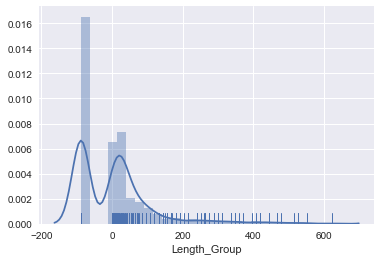

In [31]:
# Plotting a histogram for relevant features to understand its distribution
sns.set()
sns.distplot(df_continuous_columns['Length_Group'].dropna(), rug=True)

> We can see that there is a big bar for -88 that stands for not applicable. Whereas the data follows a negative binomial distribution

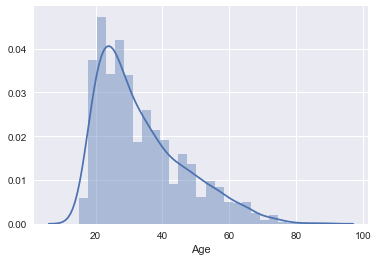

In [32]:
sns.distplot(df_continuous_columns['Age'].dropna())

> We can see that age follows normal distribution with a positive skewness [Right Skewed]

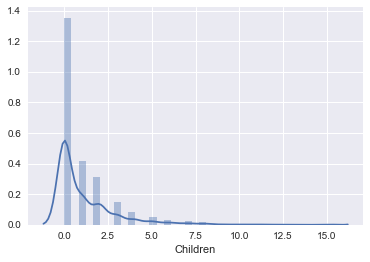

In [33]:
sns.distplot(df_continuous_columns['Children'].dropna())

> We can see that Children follows normal distribution with a positive skewness [Right Skewed]

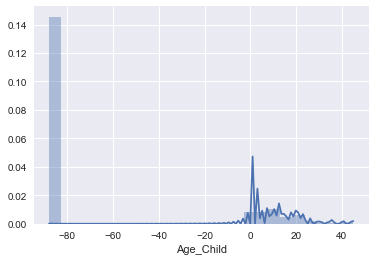

In [34]:
sns.distplot(df_continuous_columns['Age_Child'].dropna())

> We cannot interpret the distribution of this data

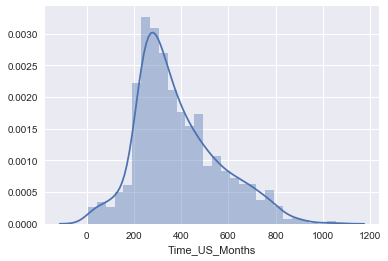

In [35]:
sns.distplot(df_continuous_columns['Time_US_Months'].dropna())

> We can see that Time_US_Months follows normal distribution

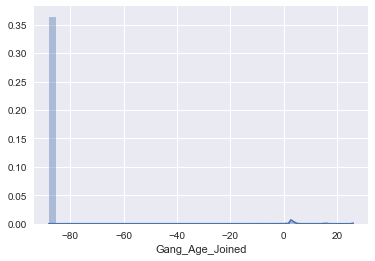

In [36]:
sns.distplot(df_continuous_columns['Gang_Age_Joined'].dropna())

> We cannot interpret the distribution of this data

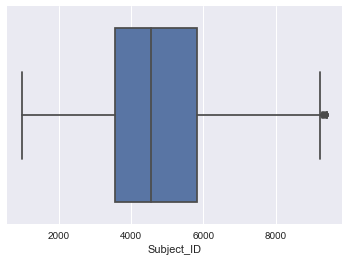

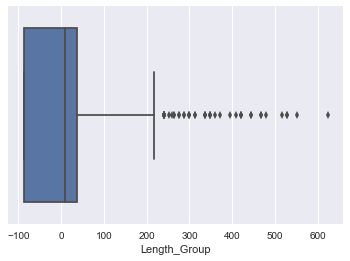

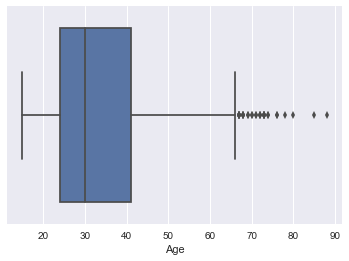

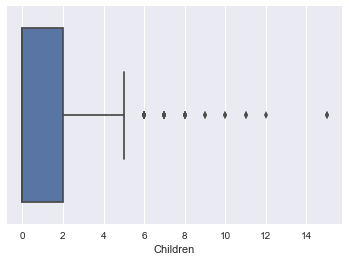

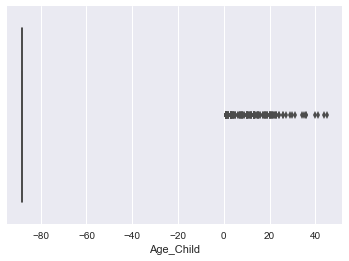

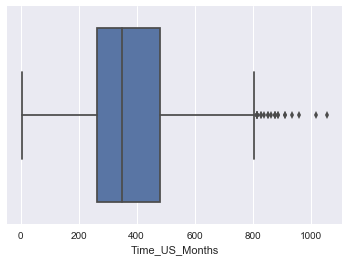

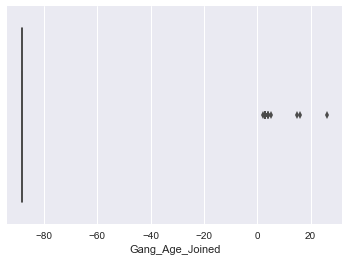

In [37]:
# Now that we have understood the distribution we can see the data more closesly to understand indepth behaviour
for cols in df_continuous_columns.columns:
    plt.figure()
    sns.boxplot(x=df[cols])

> 
* We can see that ``Gang_Age_Joined`` and ``Age_Child`` just have outlying values which will not be any use for the prediction purpose.
* There are outlying values in these features and will be further investigated in the **Data Quality Plan** Section


### <font color="#673AB7">CATEGORICAL COLUMNS</font> - <font color="#f44336">DQR & Plots</font>

In [38]:
# Data Quality Report
category_desc = df_categorical_columns.describe().T
miss=[]
freq=[]
for i,cols in enumerate(df_categorical_columns.columns):
    miss.append(100-((category_desc['count'][i]/df_categorical_columns.shape[0])*100))
    freq.append((category_desc['freq'][i]/category_desc['count'][i])*100)
category_desc['% topFreq']=freq
category_desc['% miss']=miss
sec_mode_freq=[]
sec_mode=[]
for cols in df_categorical_columns.columns:
    df_temp = df_categorical_columns[cols].value_counts()
    card = len(df_categorical_columns[cols].unique().dropna())
    for i , j in enumerate(df_temp):
        if not(card == 1):
            if (i==1):
                sec_mode_freq.append(str(j))
                sec_mode.append(df_temp.index[i])
        elif card==1:
            sec_mode_freq.append('NA')
            sec_mode.append('NA')
category_desc['sec mode'] = sec_mode
category_desc['sec mode freq'] = sec_mode_freq
category_desc

count unique                       top  freq  \
Loc_Plot_State1                   1841     64                  New York   216   
Loc_Plot_City1                    1581    542                  New York    98   
Loc_Plot_State2                    248     59                  New York    23   
Loc_Plot_City2                     180    111                  New York    15   
Date_Exposure                     1867   1388                 1/26/2016    13   
Plot_Target1                      1833     18                       -88   888   
Plot_Target2                       227     16                        14    59   
Plot_Target3                        82     16                        14    25   
Attack_Preparation                1667      4                       -88   888   
Op_Security                       1462      4                       -88   893   
Changing_Target                   1513      3                       -88   892   
Anticp_Fatals_Targ                1641      5                       -88   893   
Internet_Use_Plot                 1557      3                       -88  1274   
Extent_Plot                       1840      6                         0   888   
Violent                           1867      2                         1  1103   
Criminal_Severity                 1849     11                        10   611   
Criminal_Charges                  1785      3                         1  1465   
Indict_Arrest                     1826      5                         3  1351   
Current_Status                    1596      9                         3   701   
Group_Membership                  1867      4                         2   826   
Terrorist_Group_Name1             1849     80                       -88   719   
Terrorist_Group_Name2               92     33                   Taliban    10   
Terrorist_Group_Name3               13      9             al-Qaeda core     3   
Actively_Recruited                 862      3                         0   619   
Recruiter1                         849      5                       -88   628   
Recruiter2                          14      4                         2     6   
Recruiter3                           1      1                         2     1   
Actively_Connect                   801      3                         0   425   
Group_Competition                 1079      3                         0   483   
Role_Group                        1752      4                         1   856   
Clique                            1212      2                         1   635   
Clique_Radicalize                  995      4                         0   581   
Clique_Connect                     977      4                       -88   580   
Internet_Radicalization           1185      4                       -88   638   
Media_Radicalization               544      3                         0   281   
Radicalization_Islamist           1867      2                         0  1410   
Radicalization_Far_Right          1867      2                         0  1121   
Radicalization_Far_Left           1867      2                         0  1543   
Radicalization_Single_Issue       1867      2                         0  1527   
Ideological_Sub_Category1         1867     18                         2   479   
Ideological_Sub_Category2          199     13                         4    69   
Ideological_Sub_Category3           24      7                         5     6   
Loc_Habitation_State1             1692     51                  New York   194   
Loc_Habitation_City1               935    457                  New York   100   
Loc_Habitation_State2              130     34                California    20   
Loc_Habitation_City2                84     58               Los Angeles     5   
Itinerant                         1020      2                         0   520   
External_Rad                      1260      2                         0  1114   
Rad_duration                       781      3                   

In [39]:
category_desc.to_csv("DQP_CAT.csv")

**Observation**: Only certain features are explained here who are showing a strong amount of certain issues. All the features will be included in the Data Quality Plan

>* **Top Missing Features**
    * A lot of features have missing values more than 60 %. 
    * These are mostly the next occurences of a feature. This means that the feature says about its multiple usage by the individual
* <hr>**Constant Cardinality**
    * **``Recruiter 3``**
>
    * **``Event Influence4``**
>
    * **``Abuse_Type3``**


C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


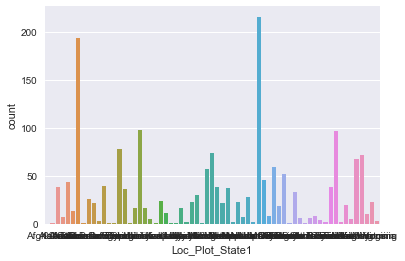

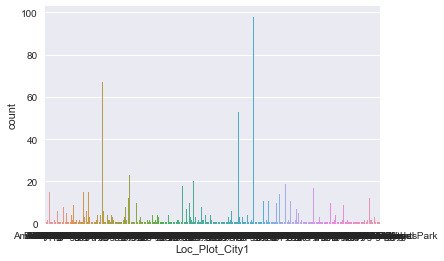

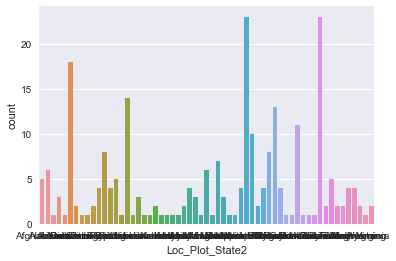

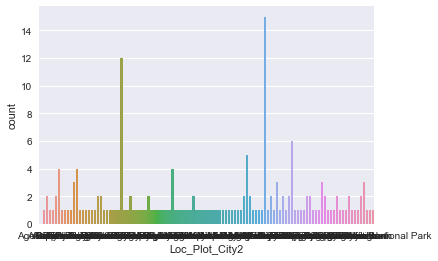

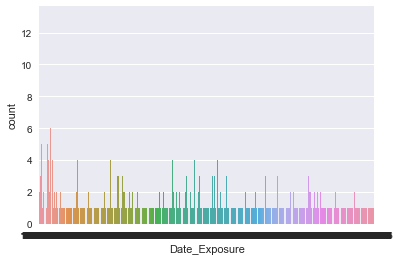

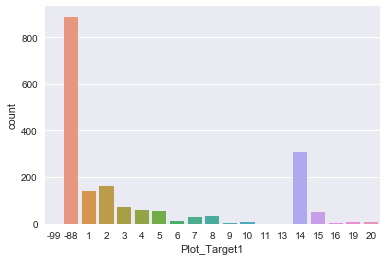

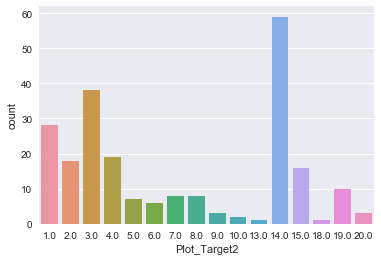

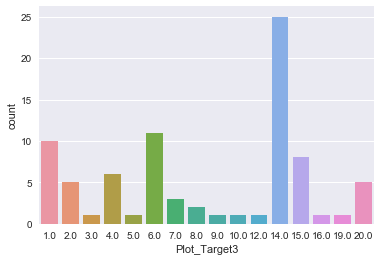

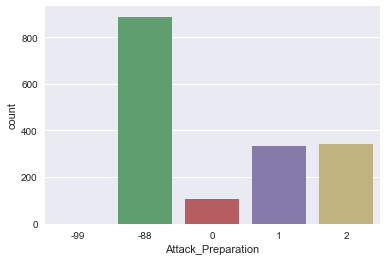

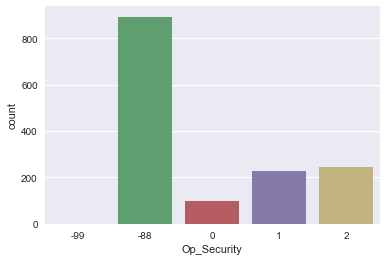

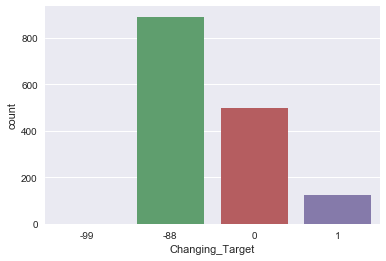

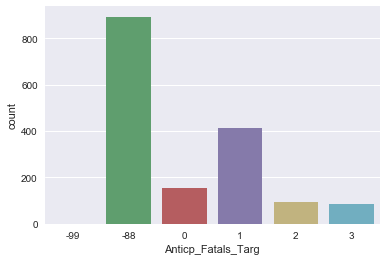

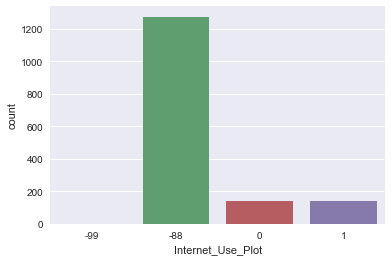

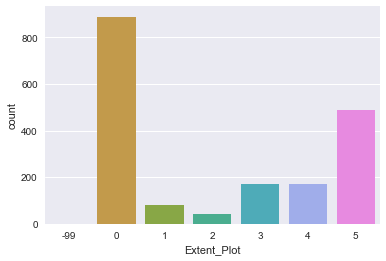

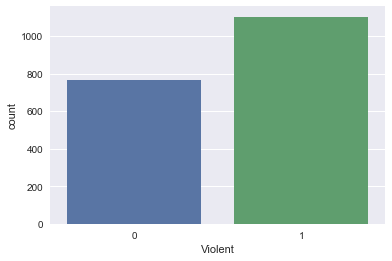

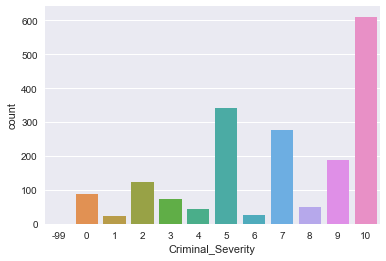

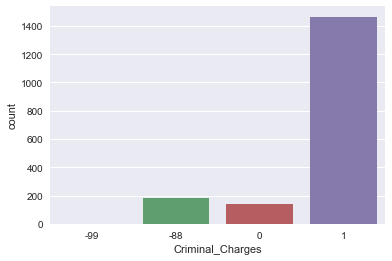

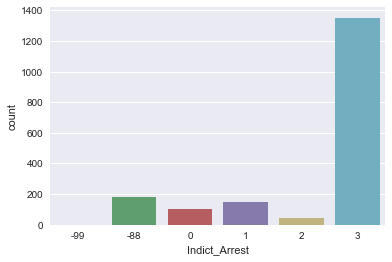

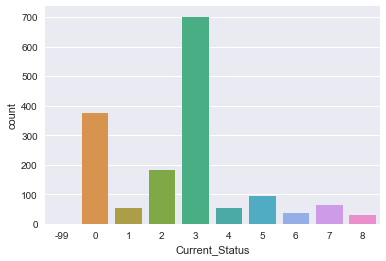

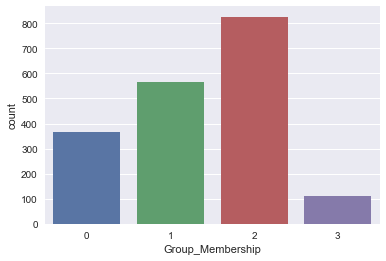

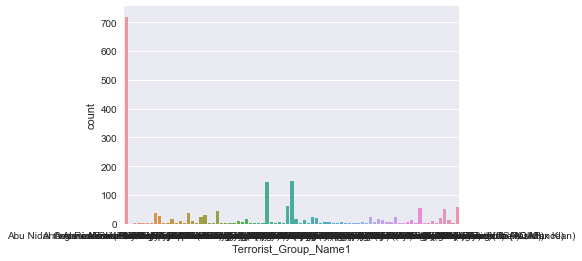

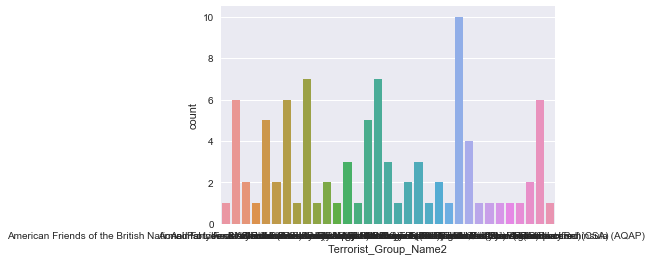

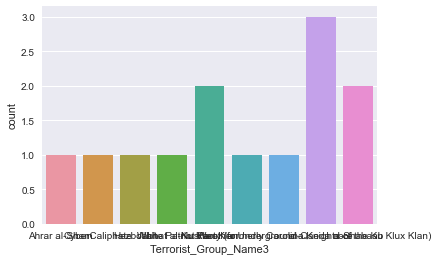

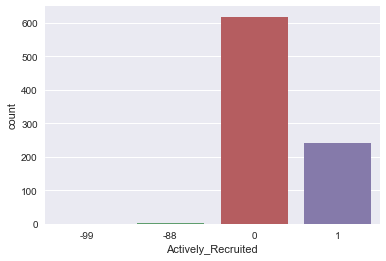

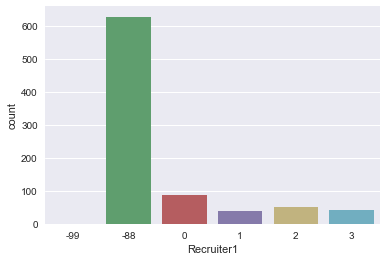

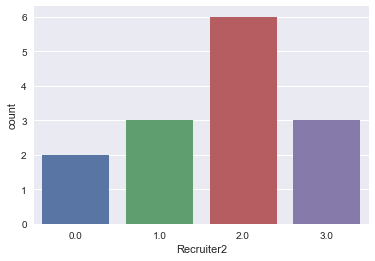

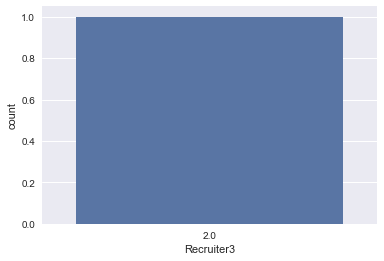

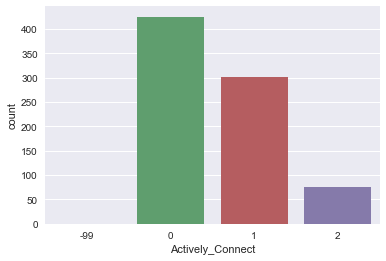

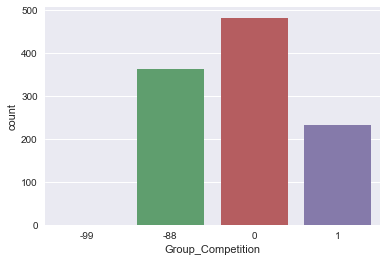

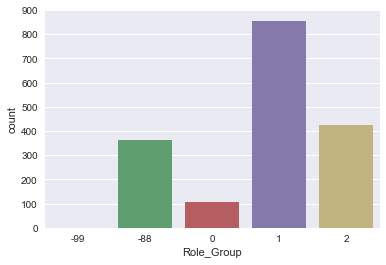

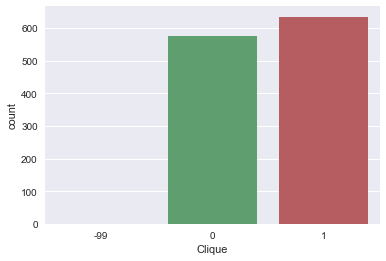

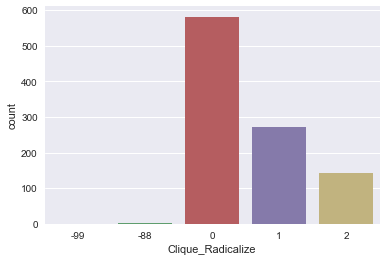

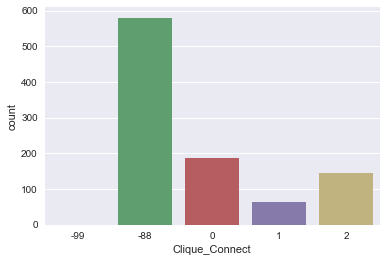

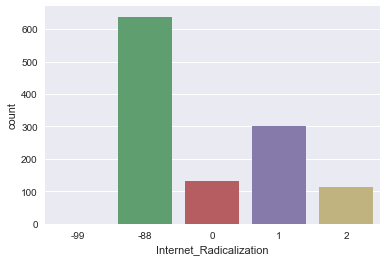

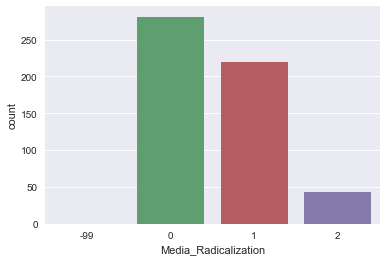

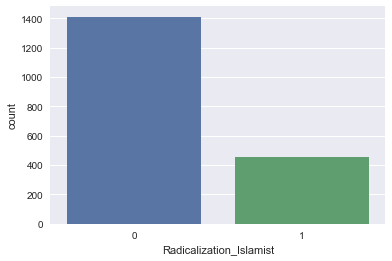

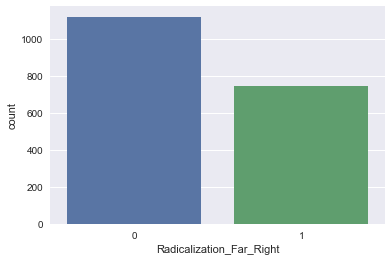

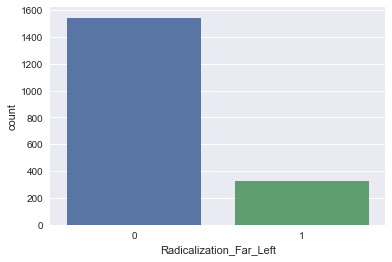

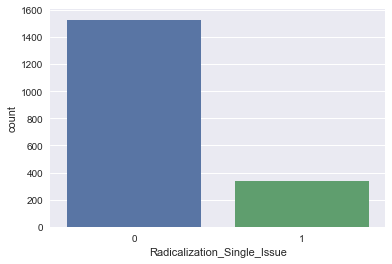

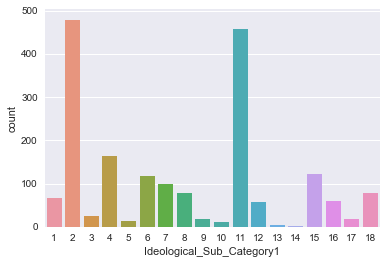

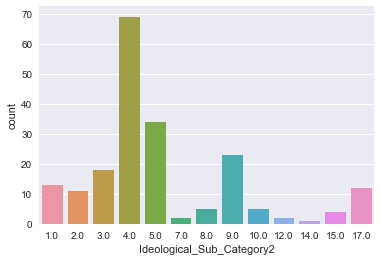

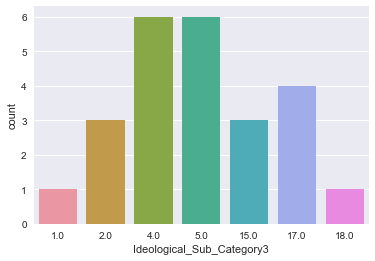

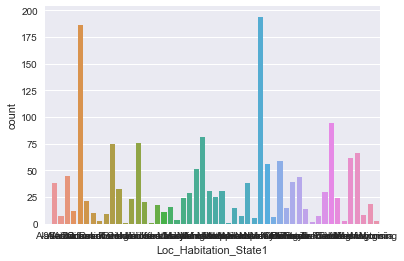

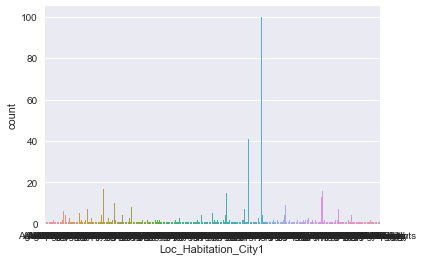

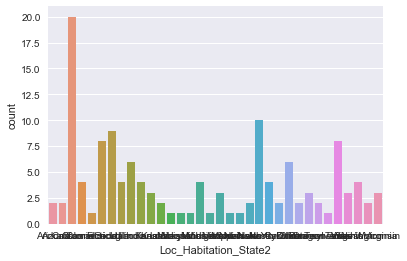

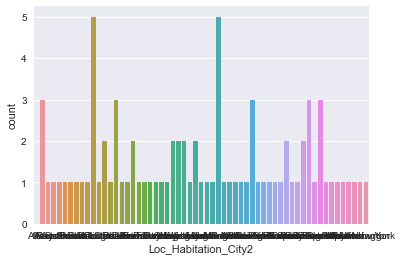

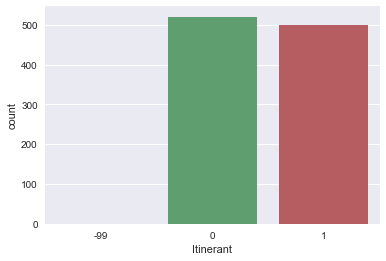

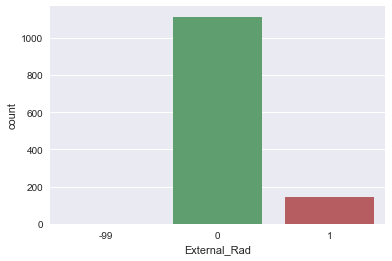

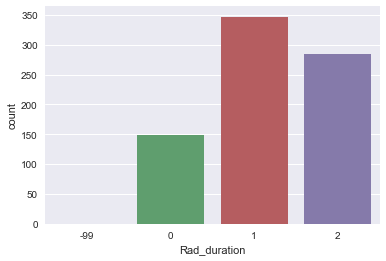

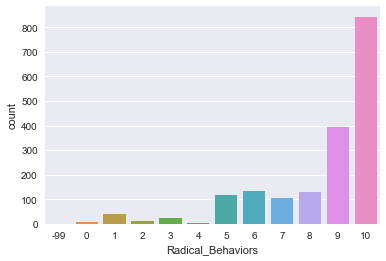

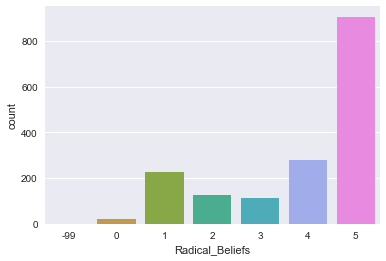

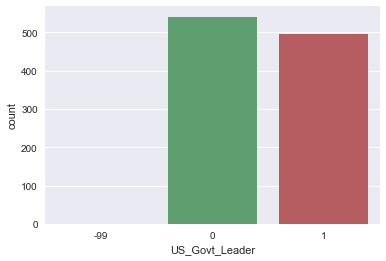

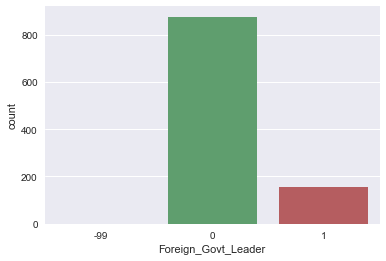

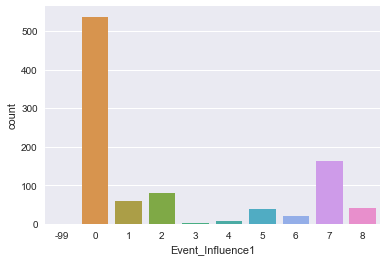

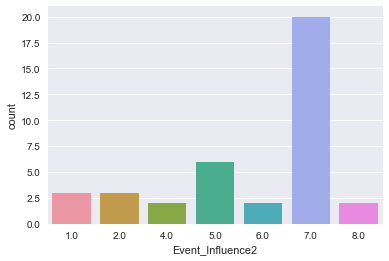

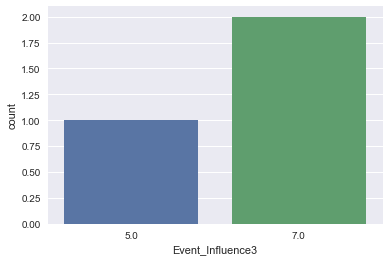

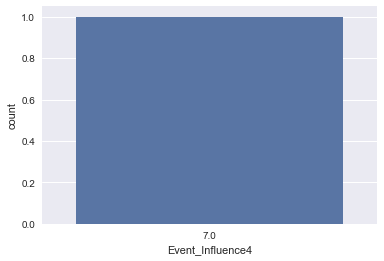

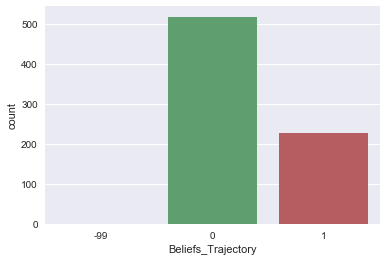

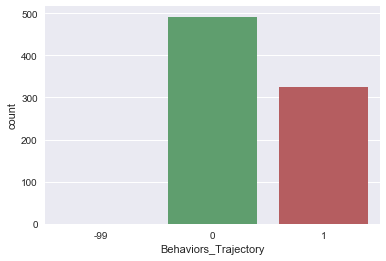

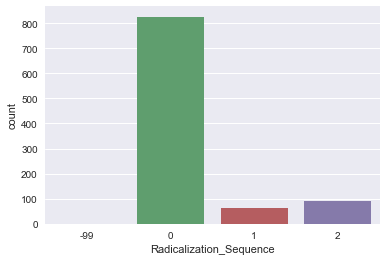

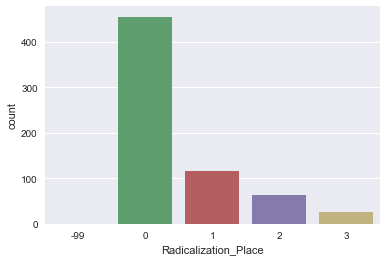

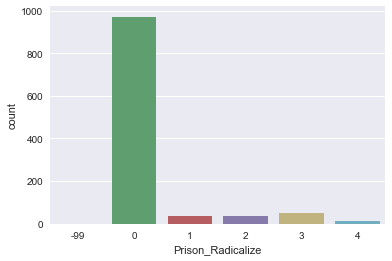

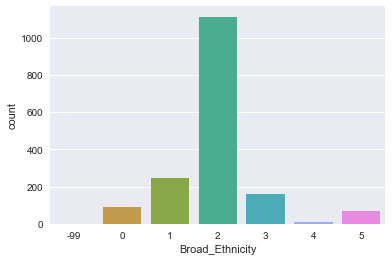

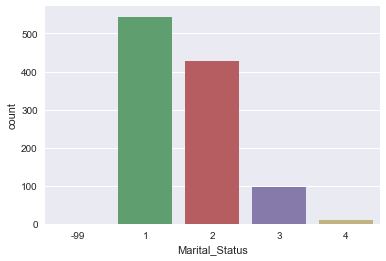

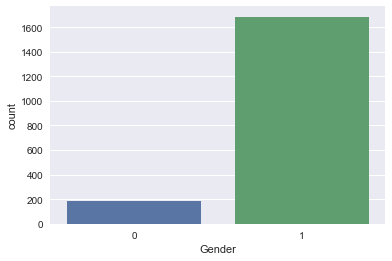

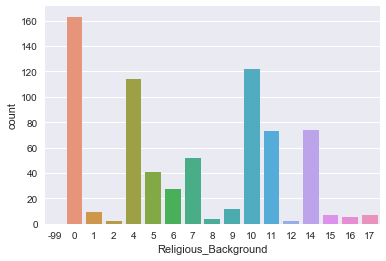

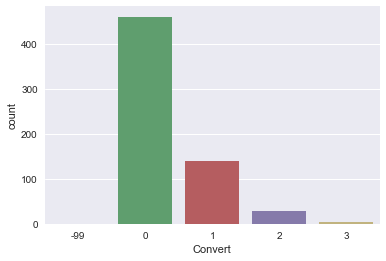

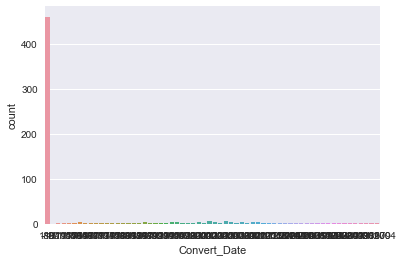

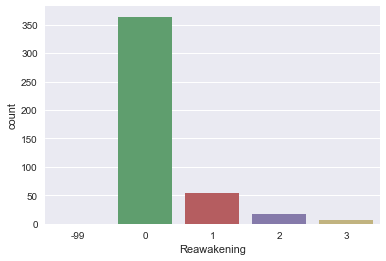

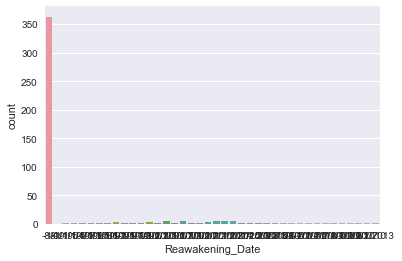

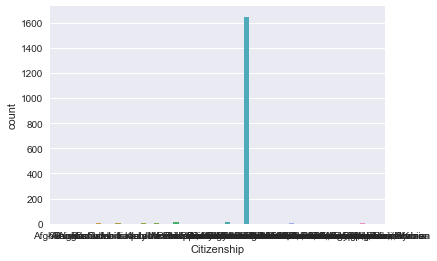

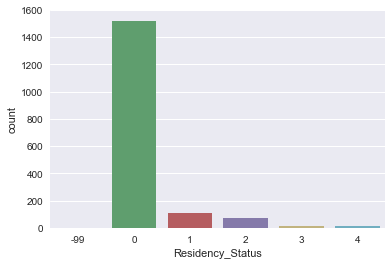

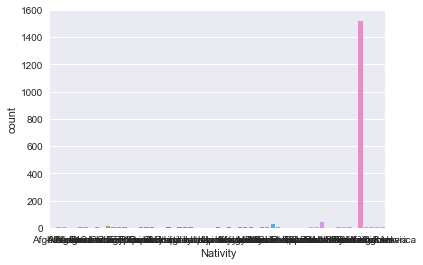

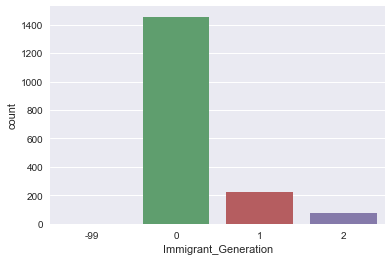

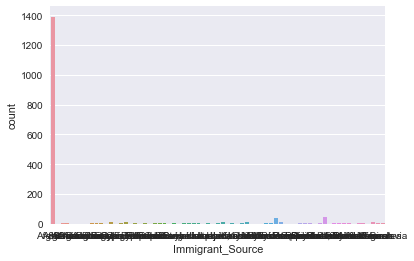

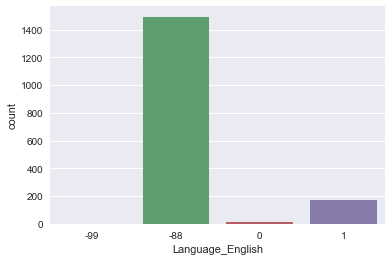

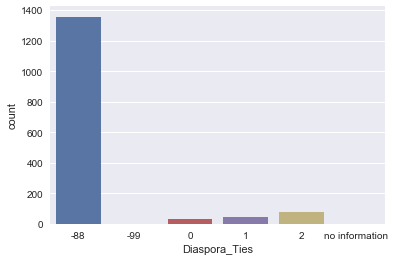

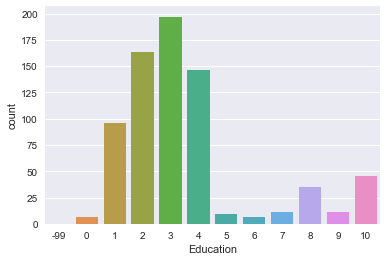

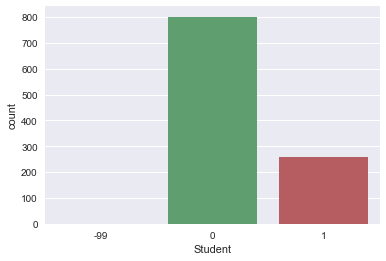

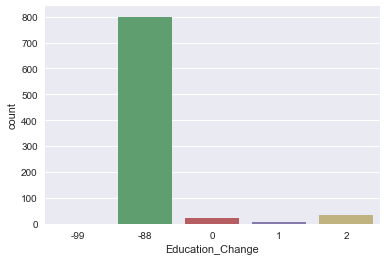

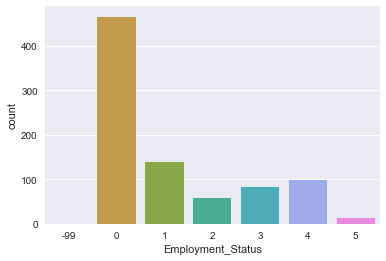

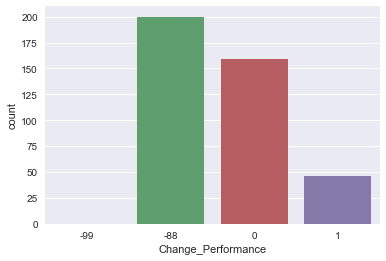

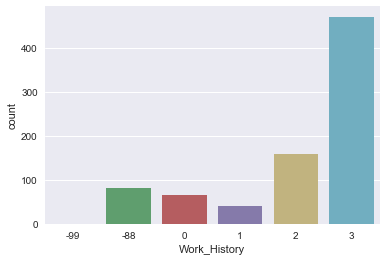

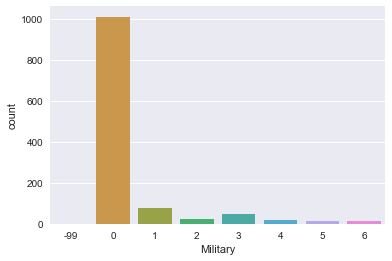

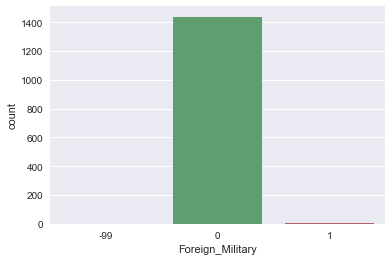

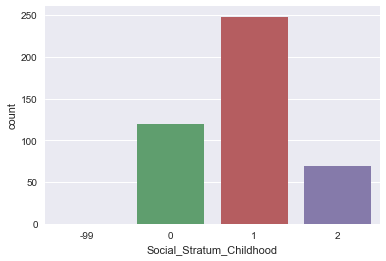

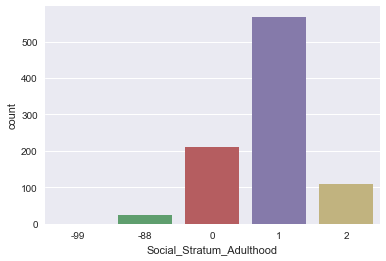

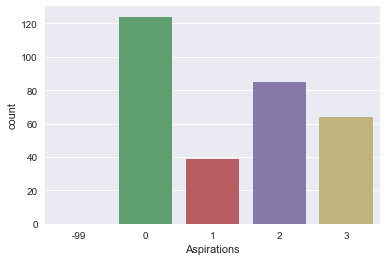

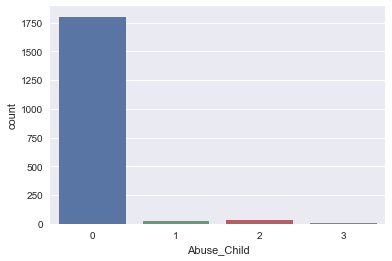

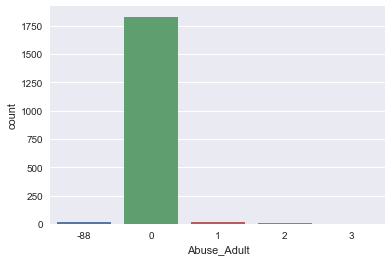

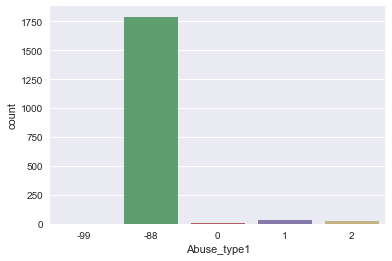

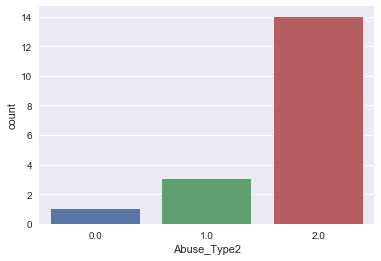

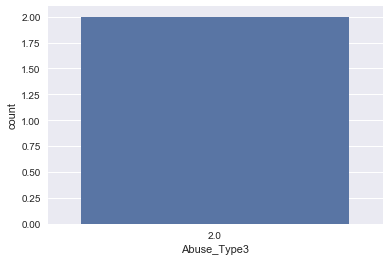

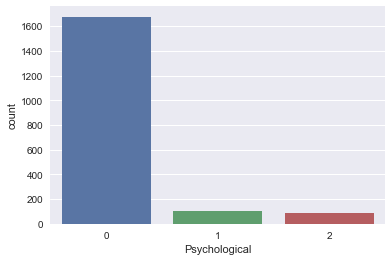

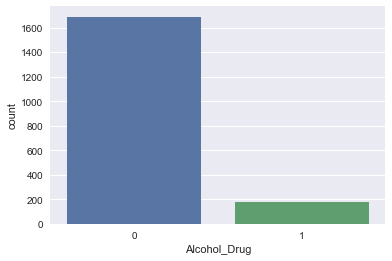

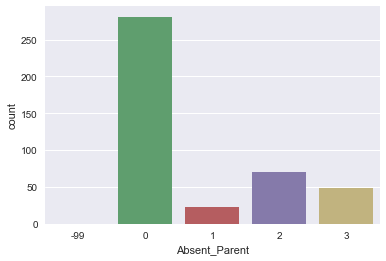

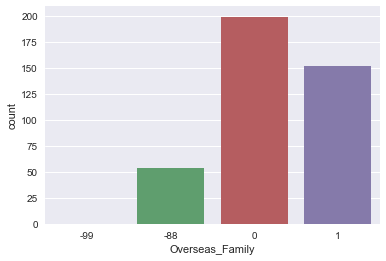

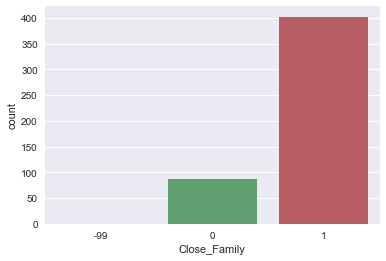

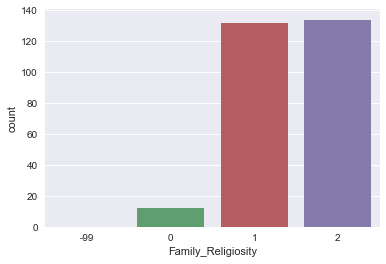

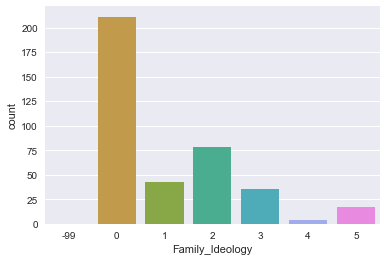

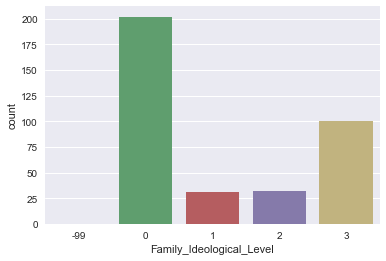

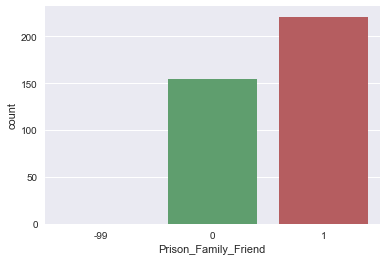

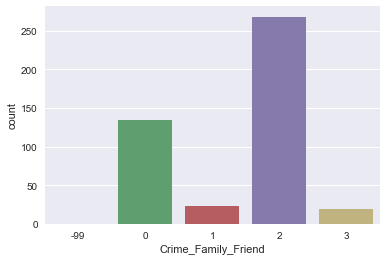

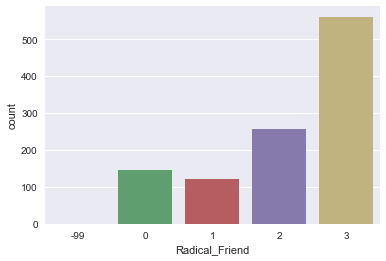

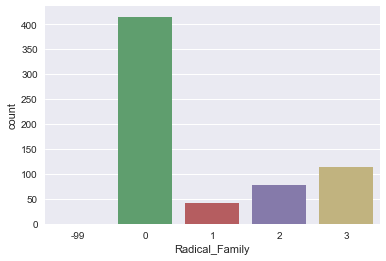

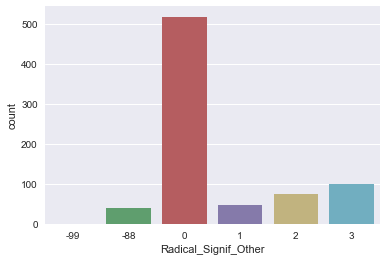

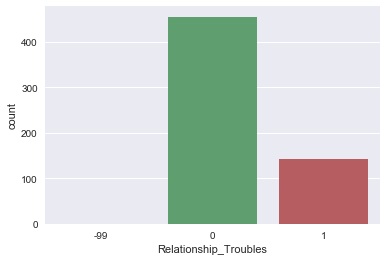

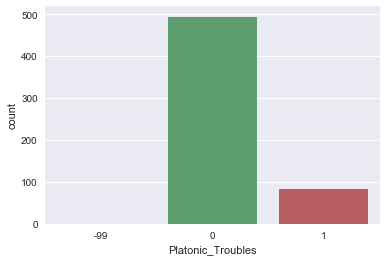

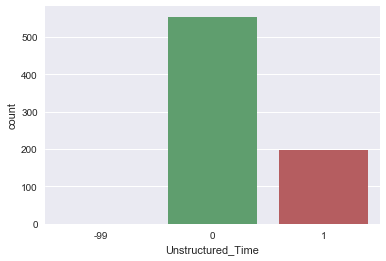

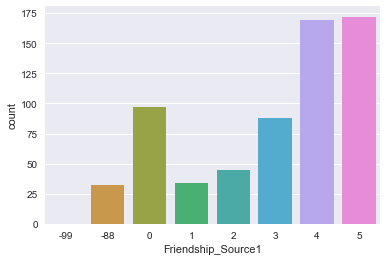

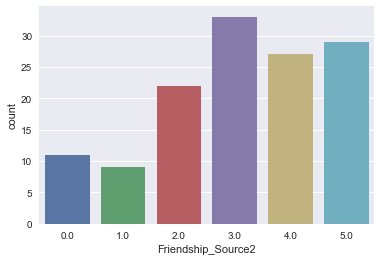

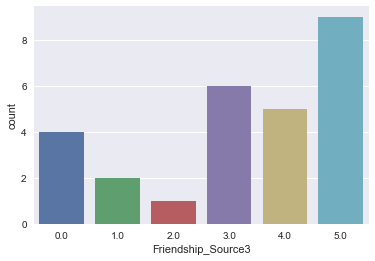

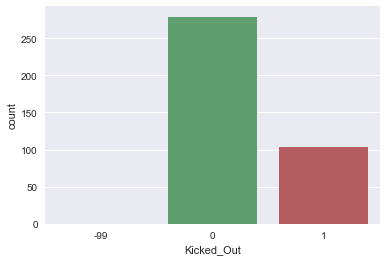

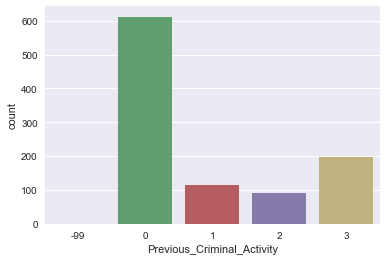

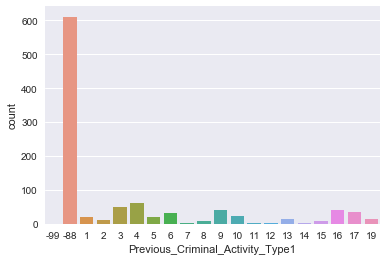

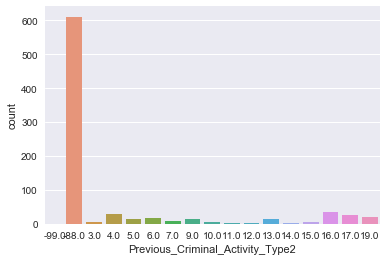

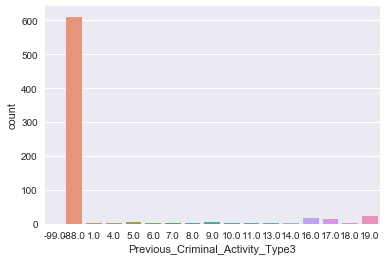

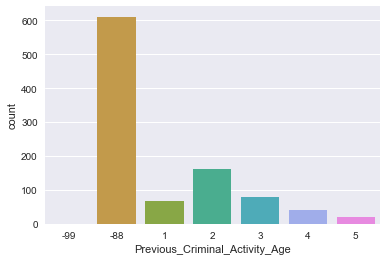

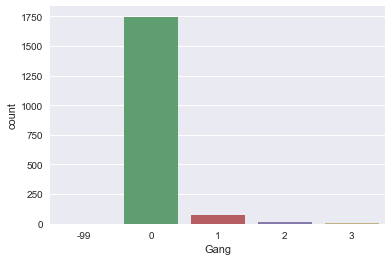

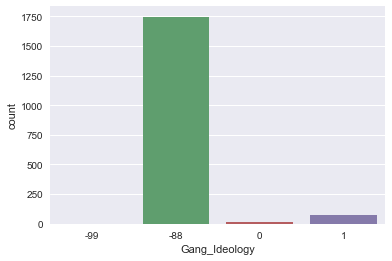

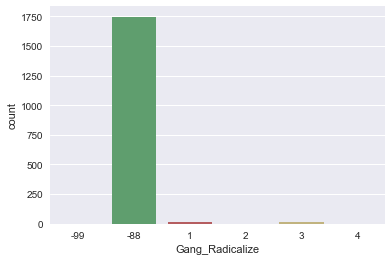

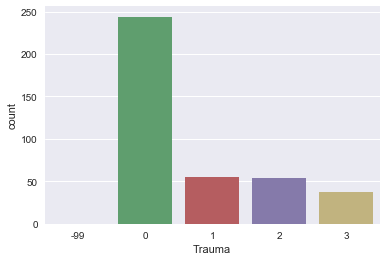

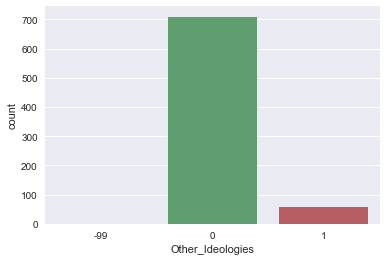

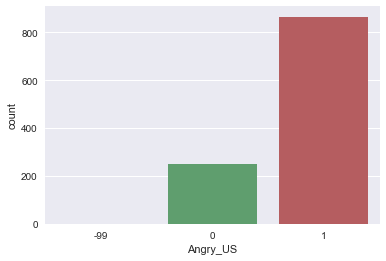

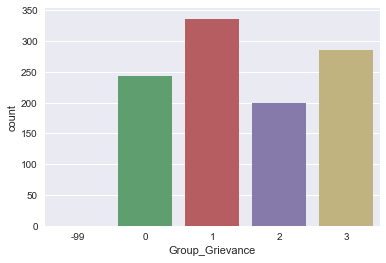

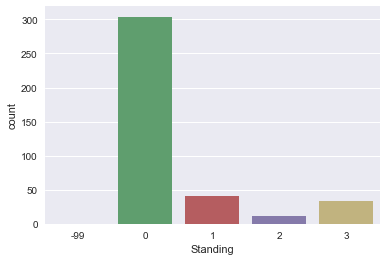

In [40]:
# Plotting a countplot for all the categories
for cols in df_categorical_columns.columns:
    plt.figure()
    sns.countplot(x=cols,data=df_categorical_columns)

**Summary:**

**Continuous**
* Out of all the continuous features, Age_Child and Gang_Months are the one which are not following any kind of distribution and have only outlying values

**Categorical**
* There is a huge amount of missing values in many features.
* There are features with constant cardinalities

<hr>

### 1.4 Data Understanding <font color="#5C6BC0">CLEAN Dataset</font> <font color="#2196F3">Data Quality Plan</font>

In [41]:
# Checking Irregular Cardinality
for cols in df_categorical_columns.columns:
    print(cols," : ",df_categorical_columns[cols].unique())

Loc_Plot_State1  :  [Illinois, Afghanistan, California, New York, Virginia, ..., Egypt, Kenya, Rhode Island, Syria, Tunisia]
Length: 65
Categories (64, object): [Illinois, Afghanistan, California, New York, ..., Kenya, Rhode Island, Syria, Tunisia]
Loc_Plot_City1  :  [Chicago, NaN, Santa Ana, New York, Lackawanna, ..., Great Cacapon, Piqua, Annandale, Blooming Grove, Moore]
Length: 543
Categories (542, object): [Chicago, Santa Ana, New York, Lackawanna, ..., Piqua, Annandale, Blooming Grove, Moore]
Loc_Plot_State2  :  [Florida, NaN, Illinois, Pakistan, Saudi Arabia, ..., Jordan, South Carolina, Michigan, Arizona, Kentucky]
Length: 60
Categories (59, object): [Florida, Illinois, Pakistan, Saudi Arabia, ..., South Carolina, Michigan, Arizona, Kentucky]
Loc_Plot_City2  :  [Broward County, NaN, Chicago, Peshawar, Waziristan, ..., Kabul, Chester County, Boston, Jabal al-Arba'een, Canadensis]
Length: 112
Categories (111, object): [Broward County, Chicago, Peshawar, Waziristan, ..., Chester C

Relationship_Troubles  :  [0.0, NaN, 1.0]
Categories (2, int64): [0, 1]
Platonic_Troubles  :  [0.0, NaN, 1.0]
Categories (2, int64): [0, 1]
Unstructured_Time  :  [0.0, NaN, 1.0]
Categories (2, int64): [0, 1]
Friendship_Source1  :  [0.0, 3.0, NaN, 5.0, 4.0, 1.0, 2.0, -88.0]
Categories (7, int64): [0, 3, 5, 4, 1, 2, -88]
Friendship_Source2  :  [3.0, NaN, 0.0, 2.0, 5.0, 1.0, 4.0]
Categories (6, float64): [3.0, 0.0, 2.0, 5.0, 1.0, 4.0]
Friendship_Source3  :  [1.0, NaN, 0.0, 3.0, 5.0, 2.0, 4.0]
Categories (6, float64): [1.0, 0.0, 3.0, 5.0, 2.0, 4.0]
Kicked_Out  :  [0.0, NaN, 1.0]
Categories (2, int64): [0, 1]
Previous_Criminal_Activity  :  [3.0, 0.0, NaN, 1.0, 2.0]
Categories (4, int64): [3, 0, 1, 2]
Previous_Criminal_Activity_Type1  :  [1.0, -88.0, 4.0, NaN, 6.0, ..., 14, 19, 2, 12, 11]
Length: 20
Categories (19, int64): [1, -88, 4, 6, ..., 19, 2, 12, 11]
Previous_Criminal_Activity_Type2  :  [4.0, -88.0, 16.0, NaN, 12.0, ..., 5.0, 15.0, 7.0, 3.0, 11.0]
Length: 17
Categories (16, float64): 

> No Irregular Cardinality Found<br>
**There are cases with constant Cardinality**

In [42]:
# Checking for null values
df.isnull().sum()

Subject_ID                             0
Length_Group                         994
Age                                   83
Children                             925
Age_Child                           1203
Time_US_Months                       463
Gang_Age_Joined                       99
Loc_Plot_State1                       26
Loc_Plot_City1                       286
Loc_Plot_State2                     1619
Loc_Plot_City2                      1687
Date_Exposure                          0
Plot_Target1                          34
Plot_Target2                        1640
Plot_Target3                        1785
Attack_Preparation                   200
Op_Security                          405
Changing_Target                      354
Anticp_Fatals_Targ                   226
Internet_Use_Plot                    310
Extent_Plot                           27
Violent                                0
Criminal_Severity                     18
Criminal_Charges                      82
Indict_Arrest   

> All the above features with sum greater than 0 will be reported in the **Data Quality Report**

In [43]:
# Checking for outliers
df_continuous_columns.sort_values(by='Length_Group', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
899         4511         624.0  27.0       0.0      -88.0           324.0   
1071        4907         552.0  76.0       1.0        NaN           912.0   
1021        4742         528.0  35.0       NaN        NaN           420.0   
1321        5686         528.0  31.0       0.0      -88.0           372.0   
1025        4751         516.0  64.0       1.0       30.0           720.0   
1035        4771         480.0  59.0       2.0        NaN           708.0   
563         3861         468.0  37.0       2.0        NaN           444.0   
1320        5685         468.0  58.0       2.0        NaN           696.0   
1014        4708         444.0  34.0       NaN        NaN           408.0   
1215        5354         444.0  35.0       0.0      -88.0           420.0   
932         4558         420.0  69.0       NaN        NaN           828.0   
1474        6014         420.0  49.0       0.0      -88.0             NaN   
1371        5772         420.0  26.0       2.0       20.0             NaN   
537         3784         408.0  36.0       2.0        NaN           432.0   
390         3423         396.0  49.0       3.0        NaN           588.0   
447         3508         372.0  57.0       2.0       21.0           492.0   
1039        4795         360.0  73.0       5.0        NaN           684.0   
1333        5701         348.0  52.0       NaN        NaN           624.0   
603         3983         348.0  45.0       NaN        NaN           551.0   
1157        5137         348.0  28.0       0.0      -88.0           336.0   
586         3912         336.0  26.0       3.0        NaN           312.0   
509         3665         336.0  32.0       2.0       12.0           384.0   
356         3336         336.0  33.0       NaN        NaN             NaN   
1040        4796         312.0  59.0       4.0        NaN           708.0   
590         3920         312.0  17.0       NaN        NaN           204.0   
1384        5803         300.0  44.0       NaN        NaN           528.0   
985         4635         300.0  55.0       NaN        NaN             NaN   
306         3200         300.0  50.0      10.0        NaN           600.0   
1514        6081         288.0  45.0       5.0        NaN           336.0   
1280        5558         288.0  45.0       1.0        NaN           540.0   
1229        5386         276.0  36.0       1.0        NaN           432.0   
905         4521         276.0  25.0       NaN        NaN           300.0   
1029        4758         264.0  36.0       NaN        NaN           432.0   
523         3702         264.0  19.0       NaN        NaN             NaN   
1322        5688         260.0  29.0       NaN        NaN           377.0   
1086        5020         252.0  78.0       2.0        NaN           936.0   
1622        6229         240.0  47.0       NaN        NaN           564.0   
1140        5110         240.0  31.0       6.0        NaN           372.0   
807         4371         240.0  22.0       NaN        NaN             NaN   
630         4043         240.0  37.0       NaN        NaN           444.0   
1170        5174         240.0  39.0       6.0       21.0           180.0   
1205        5324         240.0  31.0       2.0       13.0             NaN   
1851        9298         240.0  41.0       0.0      -88.0           216.0   
1228        5378         240.0  20.0       NaN        NaN             NaN   
602         3982         216.0  25.0       NaN        NaN           348.0   
391         3424         216.0  26.0       1.0        NaN             NaN   
129         2012         204.0  43.0       NaN        NaN             NaN   
645         4075         192.0  18.0       2.0        NaN           216.0   
578         3898         192.0  34.0       4.0        NaN           408.0   
1406        5836         192.0  20.0       0.0      -88.0           648.0   
127         2002         180.0  25.0       0.0      -88.0           300.0   
2 

> Since Length Group can have values till 624. We can say that these outliers are valid

In [44]:
df_continuous_columns.sort_values(by='Age', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
273         3127         -88.0  88.0       1.0        NaN          1056.0   
577         3894         -88.0  85.0       NaN        NaN          1020.0   
496         3642         -88.0  80.0       NaN        NaN           960.0   
1086        5020         252.0  78.0       2.0        NaN           936.0   
1398        5826           NaN  76.0       1.0        NaN           912.0   
1071        4907         552.0  76.0       1.0        NaN           912.0   
558         3848          96.0  74.0       5.0        NaN           888.0   
281         3139           NaN  74.0       1.0        NaN           888.0   
518         3686           NaN  73.0       1.0       44.0           876.0   
761         4288           NaN  73.0       NaN        NaN           876.0   
1039        4795         360.0  73.0       5.0        NaN           684.0   
1052        4846           NaN  73.0       NaN        NaN             NaN   
191         2213           NaN  73.0       NaN        NaN           876.0   
1379        5794           NaN  72.0       NaN        NaN             NaN   
333         3259           NaN  72.0       NaN        NaN             NaN   
440         3499           NaN  72.0       NaN        NaN           864.0   
615         4012          48.0  71.0       1.0       41.0           852.0   
1309        5648           NaN  71.0       NaN        NaN             NaN   
1373        5779           NaN  70.0       2.0        NaN           432.0   
1621        6228         -88.0  70.0       2.0        NaN           840.0   
655         4097           NaN  69.0       1.0        NaN           828.0   
932         4558         420.0  69.0       NaN        NaN           828.0   
543         3804           NaN  68.0       NaN        NaN           816.0   
500         3650           NaN  68.0       NaN        NaN           816.0   
764         4291          12.0  68.0       NaN        NaN           816.0   
1103        5051           NaN  68.0       1.0       34.0           816.0   
540         3795         -88.0  67.0       2.0       21.0           804.0   
726         4232           NaN  67.0       NaN        NaN           804.0   
1485        6032           NaN  67.0       NaN        NaN           804.0   
1547        6126         -88.0  67.0       NaN        NaN           804.0   
762         4289           NaN  67.0       0.0      -88.0           804.0   
978         4623           NaN  67.0       NaN        NaN           804.0   
293         3163           NaN  66.0       3.0        NaN           792.0   
536         3783         144.0  66.0       2.0        NaN             NaN   
1615        6215           NaN  66.0       0.0      -88.0           792.0   
1433        5919         -88.0  66.0       NaN        NaN           762.0   
478         3595         120.0  66.0       NaN        NaN           792.0   
373         3375         -88.0  66.0       NaN        NaN           708.0   
1150        5126           NaN  65.0       1.0        NaN           780.0   
512         3673           NaN  65.0       NaN        NaN           780.0   
763         4290           NaN  65.0       1.0       18.0             NaN   
946         4585           NaN  65.0       NaN        NaN           780.0   
1294        5607           NaN  65.0       3.0        NaN           780.0   
1331        5698           NaN  65.0       NaN        NaN             NaN   
1025        4751         516.0  64.0       1.0       30.0           720.0   
493         3629           NaN  64.0       1.0        NaN           768.0   
744         4265         -88.0  64.0       NaN        NaN           768.0   
863         4444           NaN  64.0       NaN        NaN           768.0   
1187        5233           NaN  64.0       NaN        NaN           768.0   
1435        5923           NaN  64.0       NaN        NaN           768.0   
1794        6524           NaN  64.0       2.0        NaN           768.0   
17

> Age can be 88 years and these outliers are valid

In [45]:
df_continuous_columns.sort_values(by='Children', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
553         3836          60.0  34.0      15.0        NaN           396.0   
1479        6022           NaN  43.0      15.0        NaN           516.0   
1678        6355           NaN  59.0      12.0        NaN           708.0   
598         3964           NaN  42.0      11.0        NaN           504.0   
1776        6488           1.0  54.0      11.0        NaN           648.0   
306         3200         300.0  50.0      10.0        NaN           600.0   
68          1105          24.0  53.0      10.0       36.0           636.0   
357         3340           NaN  57.0       9.0        NaN           684.0   
1489        6039           NaN  29.0       9.0        NaN             NaN   
1504        6069           NaN  49.0       8.0       26.0           588.0   
320         3238           NaN  33.0       8.0        NaN             NaN   
1198        5289           NaN  55.0       8.0        NaN             NaN   
1011        4705           NaN  37.0       8.0        NaN             NaN   
324         3244           NaN  33.0       8.0        NaN           408.0   
1855        9330           NaN  30.0       8.0        NaN             NaN   
1676        6353           NaN  44.0       8.0        NaN           528.0   
31          1046          36.0  43.0       7.0       11.0             NaN   
1183        5223           NaN  33.0       7.0        NaN           396.0   
1416        5854           NaN  41.0       7.0        NaN           492.0   
328         3251          72.0  59.0       7.0        NaN           705.0   
353         3320         108.0  46.0       7.0       17.0           552.0   
300         3175           NaN  46.0       7.0       20.0           552.0   
1317        5675          17.0  37.0       7.0        NaN           444.0   
1242        5424           NaN   NaN       7.0        NaN             NaN   
327         3250         -88.0  40.0       7.0        NaN           480.0   
599         3972          72.0  53.0       6.0        NaN           636.0   
1170        5174         240.0  39.0       6.0       21.0           180.0   
1113        5065          96.0  32.0       6.0        NaN           384.0   
64          1099           NaN  48.0       6.0        NaN           288.0   
583         3908          96.0  63.0       6.0       36.0           757.0   
313         3221           NaN  36.0       6.0        NaN           432.0   
1140        5110         240.0  31.0       6.0        NaN           372.0   
202         2241         108.0  33.0       6.0        NaN            24.0   
1705        6389           NaN  28.0       6.0        NaN             NaN   
1847        9230         -88.0  42.0       6.0        NaN           312.0   
1549        6129          29.0  44.0       6.0       22.0           336.0   
23          1034         -88.0  49.0       6.0       20.0           216.0   
755         4280           NaN  38.0       6.0        NaN           456.0   
113         1174          43.0  39.0       5.0       20.0           468.0   
301         3176          24.0  63.0       5.0        NaN           384.0   
156         2067           NaN  24.0       5.0        NaN           132.0   
1514        6081         288.0  45.0       5.0        NaN           336.0   
1364        5760           1.0  34.0       5.0        NaN             NaN   
65          1100         -88.0  47.0       5.0        NaN           300.0   
359         3345           NaN  34.0       5.0        NaN           408.0   
1072        4910           NaN  53.0       5.0        NaN           618.0   
1540        6118           NaN  29.0       5.0        NaN           348.0   
332         3258           NaN  39.0       5.0        NaN             NaN   
1039        4795         360.0  73.0       5.0        NaN           684.0   
1148        5124           NaN  33.0       5.0        NaN             NaN   
1649        6319         -88.0  57.0       5.0       35.0           684.0   
35

> It is can be rare for an individual at age 34 to have 15 children but is not impossible 

In [46]:
df_continuous_columns.sort_values(by='Age_Child', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
1583        6176           NaN  63.0       4.0       45.0           756.0   
518         3686           NaN  73.0       1.0       44.0           876.0   
615         4012          48.0  71.0       1.0       41.0           852.0   
162         2101         -88.0  63.0       1.0       40.0           756.0   
68          1105          24.0  53.0      10.0       36.0           636.0   
583         3908          96.0  63.0       6.0       36.0           757.0   
1649        6319         -88.0  57.0       5.0       35.0           684.0   
1103        5051           NaN  68.0       1.0       34.0           816.0   
1683        6360           2.0  47.0       2.0       31.0           564.0   
1025        4751         516.0  64.0       1.0       30.0           720.0   
404         3446           NaN  50.0       1.0       29.0           600.0   
1120        5079           NaN  47.0       1.0       27.0           564.0   
1504        6069           NaN  49.0       8.0       26.0           588.0   
729         4239         -88.0  56.0       1.0       26.0           672.0   
653         4093           NaN  51.0       3.0       24.0           612.0   
1476        6017         -88.0  58.0       1.0       24.0           696.0   
1665        6337          15.0  50.0       2.0       23.0           252.0   
1606        6204         -88.0  44.0       2.0       23.0           528.0   
980         4627          12.0  64.0       1.0       23.0           768.0   
981         4628           NaN  52.0       1.0       23.0           624.0   
272         3126         168.0  51.0       2.0       22.0           612.0   
1505        6070           NaN  48.0       2.0       22.0           576.0   
1549        6129          29.0  44.0       6.0       22.0           336.0   
972         4617           NaN  48.0       2.0       21.0           576.0   
1170        5174         240.0  39.0       6.0       21.0           180.0   
540         3795         -88.0  67.0       2.0       21.0           804.0   
447         3508         372.0  57.0       2.0       21.0           492.0   
646         4077           NaN  47.0       1.0       21.0           564.0   
113         1174          43.0  39.0       5.0       20.0           468.0   
1371        5772         420.0  26.0       2.0       20.0             NaN   
1553        6134         -88.0  47.0       3.0       20.0           564.0   
1520        6088         -88.0  46.0       2.0       20.0           552.0   
300         3175           NaN  46.0       7.0       20.0           552.0   
23          1034         -88.0  49.0       6.0       20.0           216.0   
859         4438           NaN  50.0       1.0       19.0           600.0   
1797        6527           NaN  59.0       1.0       19.0           708.0   
406         3448         -88.0  44.0       1.0       19.0           528.0   
1842        9120           NaN  45.0       4.0       19.0             NaN   
763         4290           NaN  65.0       1.0       18.0             NaN   
303         3182         -88.0  48.0       1.0       18.0           576.0   
1724        6414           NaN  50.0       3.0       18.0             NaN   
1427        5910           NaN  39.0       2.0       18.0           468.0   
367         3358           NaN  40.0       1.0       18.0           480.0   
1190        5250           NaN   NaN       1.0       17.0           540.0   
353         3320         108.0  46.0       7.0       17.0           552.0   
1515        6082           NaN  40.0       3.0       17.0           192.0   
465         3546           NaN  45.0       2.0       16.0           540.0   
1179        5191           NaN  61.0       5.0       16.0           732.0   
535         3781         -88.0  47.0       1.0       15.0             NaN   
702         4193         -88.0  32.0       1.0       15.0           384.0   
1169        5173          48.0  46.0       2.0       15.0           173.0   
15

> Age Child provides the age of the eldest child. Looking at the data it can be seen that these outliers can be valid

In [47]:
df_continuous_columns.sort_values(by='Time_US_Months', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
273         3127         -88.0  88.0       1.0        NaN          1056.0   
577         3894         -88.0  85.0       NaN        NaN          1020.0   
496         3642         -88.0  80.0       NaN        NaN           960.0   
1086        5020         252.0  78.0       2.0        NaN           936.0   
1071        4907         552.0  76.0       1.0        NaN           912.0   
1398        5826           NaN  76.0       1.0        NaN           912.0   
281         3139           NaN  74.0       1.0        NaN           888.0   
558         3848          96.0  74.0       5.0        NaN           888.0   
761         4288           NaN  73.0       NaN        NaN           876.0   
191         2213           NaN  73.0       NaN        NaN           876.0   
518         3686           NaN  73.0       1.0       44.0           876.0   
440         3499           NaN  72.0       NaN        NaN           864.0   
927         4552           NaN  38.0       1.0        1.0           852.0   
615         4012          48.0  71.0       1.0       41.0           852.0   
1621        6228         -88.0  70.0       2.0        NaN           840.0   
655         4097           NaN  69.0       1.0        NaN           828.0   
932         4558         420.0  69.0       NaN        NaN           828.0   
1103        5051           NaN  68.0       1.0       34.0           816.0   
543         3804           NaN  68.0       NaN        NaN           816.0   
1250        5453         -88.0  20.0       NaN        NaN           816.0   
1022        4743          72.0  42.0       1.0        NaN           816.0   
764         4291          12.0  68.0       NaN        NaN           816.0   
500         3650           NaN  68.0       NaN        NaN           816.0   
1485        6032           NaN  67.0       NaN        NaN           804.0   
762         4289           NaN  67.0       0.0      -88.0           804.0   
540         3795         -88.0  67.0       2.0       21.0           804.0   
726         4232           NaN  67.0       NaN        NaN           804.0   
978         4623           NaN  67.0       NaN        NaN           804.0   
866         4454           NaN  46.0       NaN        NaN           804.0   
1547        6126         -88.0  67.0       NaN        NaN           804.0   
478         3595         120.0  66.0       NaN        NaN           792.0   
1615        6215           NaN  66.0       0.0      -88.0           792.0   
293         3163           NaN  66.0       3.0        NaN           792.0   
1150        5126           NaN  65.0       1.0        NaN           780.0   
1294        5607           NaN  65.0       3.0        NaN           780.0   
512         3673           NaN  65.0       NaN        NaN           780.0   
946         4585           NaN  65.0       NaN        NaN           780.0   
1187        5233           NaN  64.0       NaN        NaN           768.0   
744         4265         -88.0  64.0       NaN        NaN           768.0   
493         3629           NaN  64.0       1.0        NaN           768.0   
1794        6524           NaN  64.0       2.0        NaN           768.0   
1795        6525           NaN  64.0       2.0        NaN           768.0   
1247        5442         -88.0  64.0       NaN        NaN           768.0   
863         4444           NaN  64.0       NaN        NaN           768.0   
980         4627          12.0  64.0       1.0       23.0           768.0   
506         3657         168.0  64.0       NaN        NaN           768.0   
812         4376           NaN  64.0       NaN        NaN           768.0   
1435        5923           NaN  64.0       NaN        NaN           768.0   
1433        5919         -88.0  66.0       NaN        NaN           762.0   
583         3908          96.0  63.0       6.0       36.0           757.0   
738         4256         -88.0  63.0       NaN        NaN           756.0   
53

> The time in US are all either same as the individual's age or less and hence can be considered valid

In [48]:
df_continuous_columns.sort_values(by='Gang_Age_Joined', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

Subject_ID  Length_Group   Age  Children  Age_Child  Time_US_Months  \
482         3604          48.0  33.0       NaN        NaN           396.0   
417         3467          12.0  19.0       0.0      -88.0           228.0   
1317        5675          17.0  37.0       7.0        NaN           444.0   
1445        5944          60.0  30.0       NaN        NaN           348.0   
1694        6378         -88.0  28.0       2.0        7.0           336.0   
669         4132           NaN  24.0       0.0      -88.0           288.0   
532         3776         120.0  29.0       NaN        NaN             NaN   
1479        6022           NaN  43.0      15.0        NaN           516.0   
1441        5940          19.0  30.0       NaN        NaN           360.0   
1337        5706           NaN  23.0       0.0      -88.0           276.0   
109         1169         -88.0  24.0       0.0      -88.0             6.0   
517         3685           NaN  30.0       NaN        NaN             NaN   
656         4098           NaN  19.0       NaN        NaN           228.0   
74          1113          17.0  30.0       0.0      -88.0             NaN   
1006        4696          48.0  25.0       0.0      -88.0           216.0   
310         3215           NaN  33.0       4.0       12.0           396.0   
30          1043           8.0  29.0       0.0        NaN           348.0   
869         4457           NaN  29.0       NaN        NaN           348.0   
0           1000          36.0  42.0       2.0        2.0           504.0   
392         3425          12.0  20.0       NaN        NaN           240.0   
1614        6214          96.0  22.0       2.0        3.0           264.0   
1079        4982           NaN   NaN       NaN        NaN             NaN   
1269        5523           NaN  32.0       2.0        NaN           384.0   
1265        5508           NaN  28.0       NaN        NaN           336.0   
1266        5509         180.0  24.0       2.0        NaN             NaN   
1237        5411           2.0  43.0       NaN        NaN           516.0   
1236        5407           5.0  35.0       NaN        NaN           420.0   
1235        5402           NaN  18.0       NaN        NaN           216.0   
1267        5517          36.0  27.0       NaN        NaN           324.0   
1268        5518           NaN  26.0       NaN        NaN           312.0   
1234        5398         -88.0  40.0       NaN        NaN           480.0   
1233        5396           NaN  36.0       NaN        NaN           432.0   
1232        5395         144.0  55.0       4.0        NaN             NaN   
1238        5414          96.0  51.0       NaN        NaN           612.0   
1231        5389           NaN  24.0       0.0      -88.0           288.0   
1230        5388         -88.0  51.0       NaN        NaN           612.0   
1270        5524          36.0  28.0       NaN        NaN           336.0   
1271        5525           NaN  27.0       NaN        NaN             NaN   
1272        5530          56.0  41.0       NaN        NaN           492.0   
1228        5378         240.0  20.0       NaN        NaN             NaN   
1273        5532           NaN  24.0       NaN        NaN           288.0   
1227        5376         -88.0  19.0       NaN        NaN           228.0   
1264        5502           NaN  33.0       3.0        NaN           396.0   
1259        5494           NaN  39.0       0.0      -88.0           468.0   
1258        5491           NaN  19.0       0.0      -88.0           228.0   
1250        5453         -88.0  20.0       NaN        NaN           816.0   
1257        5485           NaN   NaN       NaN        NaN             NaN   
1256        5484           NaN  26.0       1.0        NaN             NaN   
1255        5480           NaN  19.0       NaN        NaN           228.0   
1254        5473           NaN  23.0       0.0      -88.0           276.0   
1253        5472           NaN  52.0       0.0      -88.0           624.0   
12

> This feature provides either the age of the individul when he/she joined a gang or the number of months. And hence the outliers are valid

#### Handling Data Quality Issues

| Feature                          | Data Quality Issue                         | Data Type | Handling Strategy | Comment Harsh                                   | Comment Colin     | Comment Elena                                              | Comment Pavinee |
|----------------------------------|--------------------------------------------|-----------|-------------------|-------------------------------------------------|-------------------|------------------------------------------------------------|-----------------|
| Subject_ID                       | Individual Identifier                      | Int64     | Drop              |                                                 |                   |                                                            |                 |
| Length_Group                     | MISSING (53.240493%)                       | Int64     |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Age                              | MISSING (4.445635%)                        | Int64     |                   | Imputation with Mean                            |                   |                                                            |                 |
| Children                         | MISSING (49.544724%)                       | Int64     |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Age_Child                        | MISSING (64.434922%)                       | Int64     |                   | Drop                                            |                   |                                                            |                 |
| Time_US_Months                   | MISSING (24.799143%)                       | Int64     |                   | Imputation with Mean                            |                   |                                                            |                 |
| Gang_Age_Joined                  | MISSING (5.302625%)                        | Int64     |                   | Drop                                            |                   |                                                            |                 |
| Loc_Plot_State1                  | MISSING (1.392608%)                        | Category  |                   | Imputation with Mean                            | Consider Dropping |                                                            |                 |
| Loc_Plot_City1                   | MISSING (15.318693%)                       | Category  |                   | Imputation with Mean                            | Consider Dropping |                                                            |                 |
| Loc_Plot_State2                  | MISSING (86.716658%)                       | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Loc_Plot_City2                   | MISSING (90.358864%)                       | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Plot_Target1                     | MISSING (1.821103%)                        | Category  |                   | Imputation with Mean                            | Consider Dropping |                                                            |                 |
| Plot_Target2                     | MISSING (87.841457%)                       | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Plot_Target3                     | MISSING (95.607927155865%)                 | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Attack_Preparation               | MISSING (10.7123727905731%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Op_Security                      | MISSING (21.6925549009105%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Changing_Target                  | MISSING (18.9608998393144%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Anticp_Fatals_Targ               | MISSING (12.1049812533476%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Internet_Use_Plot                | MISSING (16.6041778253883%)                | Category  |                   | Imputation with Mean                            | Agreed! | We can leave this until we plot against Violent            |                 |
| Extent_Plot                      | MISSING (1.44617032672736%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Criminal_Severity                | MISSING (0.964113551151584%)               | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Criminal_Charges                 | MISSING (4.39207284413497%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Indict_Arrest                    | MISSING (2.19603642206749%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Current_Status                   | MISSING (14.5152651312265%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Terrorist_Group_Name1            | MISSING (0.964113551151584%)               | Category  |                   | Imputation with Mean                            | Agreed! | List of nouns                                              |                 |
| Terrorist_Group_Name2            | MISSING (95.0723085163363%)                | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Terrorist_Group_Name3            | MISSING (99.3036957686127%)                | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Actively_Recruited               | MISSING (53.8296732726298%)                | Category  |                   | We can leave this until we plot against Violent | Consider Dropping |                                                            |                 |
| Recruiter1                       | MISSING (54.5259775040171%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Recruiter2                       | MISSING (99.2501339046598%)                | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Recruiter3                       | MISSING (99.9464381360471%), CARDINALITY 1 | Category  |                   | Drop                                            | Consider Dropping |                                                            |                 |
| Actively_Connect                 | MISSING (57.0969469737546%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Group_Competition                | MISSING (42.206748794858%)                 | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Role_Group                       | MISSING (6.15961435457953%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Clique                           | MISSING (35.0830208891269%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Clique_Radicalize                | MISSING (46.7059453668987%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Clique_Connect                   | MISSING (47.6700589180503%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Internet_Radicalization          | MISSING (36.5291912158543%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Media_Radicalization             | MISSING (70.8623460096411%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Ideological_Sub_Category2        | MISSING (89.3411890733797%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Ideological_Sub_Category3        | MISSING (98.7145152651312%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Loc_Habitation_State1            | MISSING (9.37332619175147%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Loc_Habitation_City1             | MISSING (49.9196572040707%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Loc_Habitation_State2            | MISSING (93.0369576861274%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Loc_Habitation_City2             | MISSING (95.5008034279593%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Itinerant                        | MISSING (45.3668987680771%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| External_Rad                     | MISSING (32.5120514193893%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Rad_duration                     | MISSING (58.168184252812%)                 | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Radical_Behaviors                | MISSING (3.21371183717192%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Radical_Beliefs                  | MISSING (10.337439742903%)                 | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| US_Govt_Leader                   | MISSING (44.5099089448312%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Foreign_Govt_Leader              | MISSING (44.8312801285484%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Event_Influence1                 | MISSING (49.4911622924477%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Event_Influence2                 | MISSING (97.9646491697911%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Event_Influence3                 | MISSING (99.8393144081414%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Event_Influence4                 | MISSING (99.9464381360471%), CARDINALITY 1 | Category  |                   | Drop                                            |                   |                                                            |                 |
| Beliefs_Trajectory               | MISSING (60.0964113551151%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Behaviors_Trajectory             | MISSING (56.1863952865559%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Radicalization_Sequence          | MISSING (47.5093733261917%)                | Category  |                   | Drop                                            |                   |                                                            |                 |
| Radicalization_Place             | MISSING (64.5956079271558%)                | Category  |                   |                                            |                   |                                                            |                 |
| Prison_Radicalize                | MISSING (40.8141403320835%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Broad_Ethnicity                  | MISSING (9.90894483128013%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |                 |
| Marital_Status                   | MISSING (42.206748794858%)                 | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |                 |
| Religious_Background             | MISSING (61.7568291376539%)                | Category  |                   | We can leave this until we plot against Violent |                   | Imputation                                                           |                 |
| Convert                          | MISSING (66.0953401178361%)                | Category  |                   | Drop                      |             May yield some interesting correlations in terms of Jihadi terrorism.      |      Drop                                                       |                 |
| Convert_Date                     | MISSING (69.6839850026781%)                | Category  |                   | Drop                                            |     May yield some interesting correlations in terms of Jihadi terrorism            |    Drop                                                          |                 |   
| Reawakening                      | MISSING (76.2720942688805%)                | Category  |                   | Drop          |  May yield some interesting correlations in terms of Jihadi terrorism               |          Drop                                     |                 |
| Reawakening_Date                 | MISSING (77.1826459560792%)                | Category  |                   | Drop                                            |  May yield some interesting correlations in terms of Jihadi terrorism               |   Drop                                                           |                 |
| Citizenship                      | MISSING (5.83824317086234%)                | Category  |                   | Imputation with Mean                            |                   |   Imputation                                                         |                 |
| Residency_Status                 | MISSING (7.6057846813069%)                 | Category  |                   | Imputation with Mean                            |                   |         Imputation (Mean/Median)                                                   |                 |
| Nativity                         | MISSING (6.10605249062668%)                | Category  |                   | Imputation with Mean                            |                   |            Imputation (Mean/Median)                                                |                 |
| Immigrant_Generation             | MISSING (5.8918050348152%)                 | Category  |                   | Imputation with Mean                            |                   |     Imputation                                                       |                 |
| Immigrant_Source                 | MISSING (8.99839314408141%)                | Category  |                   | Imputation with Mean                            |                   |  Imputation                                                          |                 |
| Language_English                 | MISSING (10.1231922870915%)                | Category  |                   | Imputation with Mean                            |                   |   Imputation                                                         |                 |
| Diaspora_Ties                    | MISSING (18.9608998393144%)                | Category  |                   | Imputation with Mean                            |  Explore                 |     Drop                                                      |                 |
| Education                        | MISSING (61.1676486341724%)                | Category  |                   | We can leave this until we plot against Violent |                   | Consider Dropping                                          |                 |
| Student                          | MISSING (43.1708623460096%)                | Category  |                   | We can leave this until we plot against Violent |                   | Consider Dropping                                          |                 |
| Education_Change                 | MISSING (53.6689876807712%)                | Category  |                   | We can leave this until we plot against Violent |                   | Consider Dropping or further investigating student/violent |                 |
| Employment_Status                | MISSING (54.2046063202999%)                | Category  |                   | We can leave this until we plot against Violent |                   | Consider Dropping                                          |                 |
| Change_Performance               | MISSING (78.3074450990894%)                | Category  |                   | Drop                                            |                   |         Drop                                                   |                 |
| Work_History                     | MISSING (56.1863952865559%)                | Category  |                   | We can leave this until we plot against Violent |                   |  Consider Imputation                                                         |                 |
| Military                         | MISSING (35.457953936797%)                 | Category  |                   | We can leave this until we plot against Violent |                   |   Imputation                                                         |                 |
| Foreign_Military                 | MISSING (22.6566684520621%)                | Category  |                   | We can leave this until we plot against Violent |                   |   Imputation                                                         |                 |
| Social_Stratum_Childhood         | MISSING (76.6470273165506%)                | Category  |                   | Drop                                            |                   | Consider Dropping                                          |                 |
| Social_Stratum_Adulthood         | MISSING (51.2587038028923%)                | Category  |                   | Drop                                            |                   | Consider Dropping                                          |                 |
| Aspirations                      | MISSING (83.2886984467059%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Abuse_type1                      | MISSING (0.589180503481529%)               | Category  |                   | We can leave this until we plot against Violent |                   | Drop                                                       |                 |
| Abuse_Type2                      | MISSING (99.0358864488484%)                | Category  |                   | Drop                                            |                   | Drop                                                       |                 |
| Abuse_Type3                      | MISSING (99.8928762720942%), CARDINALITY 1 | Category  |                   | Drop                                            |                   |    Drop                                                        |                 |
| Absent_Parent                    | MISSING (77.3968934118907%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Overseas_Family                  | MISSING (78.3074450990894%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Close_Family                     | MISSING (73.8082485270487%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Family_Religiosity               | MISSING (85.1098018211033%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Family_Ideology                  | MISSING (79.2179967862881%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Family_Ideological_Level         | MISSING (80.449919657204%)                 | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Prison_Family_Friend             | MISSING (79.8607391537225%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Crime_Family_Friend              | MISSING (76.2185324049276%)                | Category  |                   | Drop                                            |                   | Drop                                          |                 |
| Radical_Friend                   | MISSING (41.9389394750937%)                | Category  |                   | We can leave this until we plot against Violent |  Possible correlation of someone becoming an extremist is having a friend member who is one                 | Explore/Imputation                                                 |                 |
| Radical_Family                   | MISSING (65.2383502945902%)                | Category  |                   | Drop                                            |  Correlation of someone becoming an extremist is having a family member who is one                 | Investigate against Violent                                          |                 |
| Radical_Signif_Other             | MISSING (58.2217461167648%)                | Category  |                   | Drop                                            |   Correlation of someone becoming an extremist is having a family member who is one                | Nothing                                                    |                 |
| Relationship_Troubles            | MISSING (68.0235672201392%)                | Category  |                   | Drop                                            |                   | Drop                                                           |                 |
| Platonic_Troubles                | MISSING (69.0412426352437%)                | Category  |                   | Drop                                            |                   | Drop                                                           |                 |
| Unstructured_Time                | MISSING (59.7750401713979%)                | Category  |                   | Drop                                            |                   |  Drop                                                          |                 |
| Friendship_Source1               | MISSING (65.8810926620246%)                | Category  |                   | Drop                                            |                   |  Drop                                                          |                 |
| Friendship_Source2               | MISSING (92.9833958221746%)                | Category  |                   | Drop                                            |                   | Drop                                                       |                 |
| Friendship_Source3               | MISSING (98.5538296732726%)                | Category  |                   | Drop                                            |                   | Drop                                                       |                 |
| Kicked_Out                       | MISSING (79.5393679700053%)                | Category  |                   | Drop                                            |                   |                                                            |   Drop              |
| Previous_Criminal_Activity       | MISSING (45.7418318157471%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |     Drop or create a new feature by combining the group together            |
| Previous_Criminal_Activity_Type1 | MISSING (46.7595072308516%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |     Drop or create a new feature by combining the group together            |
| Previous_Criminal_Activity_Type2 | MISSING (56.7220139260846%)                | Category  |                   | Drop                                            |                   |                                                            |   Drop or create a new feature by combining the group together              |
| Previous_Criminal_Activity_Type3 | MISSING (62.6673808248527%)                | Category  |                   | Drop                                            |                   |                                                            |         Drop or create a new feature by combining the group together        |
| Previous_Criminal_Activity_Age   | MISSING (47.5629351901446%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |         Drop or create a new feature by combining the group together        |
| Gang                             | MISSING (1.49973219068023%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |  Plot against Violent	               |
| Gang_Ideology                    | MISSING (1.60685591858596%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |  Drop as 93% -88	               |
| Gang_Radicalize                  | MISSING (4.60632029994644%)                | Category  |                   | Imputation with Mean                            |                   |                                                            |   Drop as 93% -88              |
| Trauma                           | MISSING (79.0573111944295%)                | Category  |                   | Drop                                            |                   |                                                            |  Drop               |
| Other_Ideologies                 | MISSING (58.9180503481521%)                | Category  |                   | Drop                                            |                  |                                                            |  Plot against Violent                |
| Angry_US                         | MISSING (40.224959828602%)                 | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |  Plot against Violent	               |
| Group_Grievance                  | MISSING (42.9566148901981%)                | Category  |                   | We can leave this until we plot against Violent |                   |                                                            |      Plot against Violent           |
| Standing                         | MISSING (79.1644349223352%)                | Category  |                   | Drop                                            |                   |                                                            | Drop	             |

## Some points of discussion [Colin]

The following features have been marked for dropping:

>  * __Convert__

>  * __Convert_Date__ 

>  * __Reawakening__

>  * __Reawakeninf_date__


 It might be worth keeping them for now as they may yield some interesting correlations in terms of Jihadi terrorism. 

About the following:

>  * __Radical_Family__

>  * __Radical_Friend__

>  * __Radical_Significant_Other__ 


I read elsewhere that the strongest correlation of someone becoming an extremist is having a family member who is one.


I'd be interested in saving this from the cut too:

>  * __Diaspora_ties ___

Its a noticable aspect of British born terrorists that they maintain ties with their homelands.


### 1.5 Data Understanding <font color="#5C6BC0">CLEAN Dataset</font> <font color="#2196F3">Handling Data Quality Issues</font>

In [49]:
for cols in df_categorical_columns.columns:
    df_categorical_columns[cols] = df_categorical_columns[cols].astype('category')

In [50]:
#Imputation
df_continuous_columns['Age'].fillna((df_continuous_columns['Age'].mean()),inplace=True)
df_continuous_columns['Time_US_Months'].fillna((df_continuous_columns['Time_US_Months'].mean()),inplace=True)
df_categorical_columns['Loc_Habitation_State1'].replace(to_replace=np.nan,value="New York",inplace=True)
df_categorical_columns['Diaspora_Ties'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Language_English'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Immigrant_Source'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Immigrant_Generation'].replace(to_replace=np.nan,value="0",inplace=True)
df_categorical_columns['Nativity'].replace(to_replace=np.nan,value="United States of America",inplace=True)
df_categorical_columns['Residency_Status'].replace(to_replace=np.nan,value="0",inplace=True)
df_categorical_columns['Citizenship'].replace(to_replace=np.nan,value="United States of America",inplace=True)
df_categorical_columns['Broad_Ethnicity'].replace(to_replace=np.nan,value="2",inplace=True)
df_categorical_columns['Radical_Beliefs'].replace(to_replace=np.nan,value="5",inplace=True)
df_categorical_columns['Radical_Behaviors'].replace(to_replace=np.nan,value="10",inplace=True)
df_categorical_columns['Gang'].replace(to_replace=np.nan,value="0",inplace=True)
df_categorical_columns['Gang_Ideology'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Gang_Radicalize'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Loc_Plot_State1'].replace(to_replace=np.nan,value="New York",inplace=True)
df_categorical_columns['Loc_Plot_City1'].replace(to_replace=np.nan,value="New York",inplace=True)
df_categorical_columns['Plot_Target1'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Attack_Preparation'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Op_Security'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Changing_Target'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Plot_Target1'].replace(to_replace=np.nan,value="-88",inplace=True)
df_categorical_columns['Extent_Plot'].replace(to_replace=np.nan,value="0",inplace=True)
df_categorical_columns['Criminal_Severity'].replace(to_replace=np.nan,value="10",inplace=True)
df_categorical_columns['Criminal_Charges'].replace(to_replace=np.nan,value="1",inplace=True)
df_categorical_columns['Current_Status'].replace(to_replace=np.nan,value="3",inplace=True)
df_categorical_columns['Indict_Arrest'].replace(to_replace=np.nan,value="3",inplace=True)
df_categorical_columns['Role_Group'].replace(to_replace=np.nan,value="1",inplace=True)

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [51]:
# Drop
df_continuous_columns.drop('Subject_ID',axis=1,inplace=True)
df_continuous_columns.drop('Age_Child',axis=1,inplace=True)
df_continuous_columns.drop('Gang_Age_Joined',axis=1,inplace=True)
df_categorical_columns.drop(['Media_Radicalization','Ideological_Sub_Category2','Ideological_Sub_Category3','Loc_Habitation_State2','Loc_Habitation_City2','Event_Influence2','Event_Influence3','Event_Influence4','Change_Performance','Social_Stratum_Childhood','Aspirations'],axis=1,inplace=True)
df_categorical_columns.drop(columns=['Abuse_type1', 'Abuse_Type2', 'Abuse_Type3', 'Absent_Parent', 'Overseas_Family','Close_Family', 'Family_Religiosity', 'Family_Ideology','Family_Ideological_Level', 'Prison_Family_Friend','Crime_Family_Friend','Relationship_Troubles','Platonic_Troubles','Unstructured_Time','Friendship_Source1','Friendship_Source2','Friendship_Source3','Kicked_Out','Trauma','Other_Ideologies','Standing'],axis=1,inplace=True)
df_categorical_columns.drop('Loc_Plot_State2',axis=1,inplace=True)
df_categorical_columns.drop('Loc_Plot_City2',axis=1,inplace=True)
df_categorical_columns.drop('Plot_Target2',axis=1,inplace=True)
df_categorical_columns.drop('Plot_Target3',axis=1,inplace=True)
df_categorical_columns.drop('Terrorist_Group_Name1',axis=1,inplace=True)
df_categorical_columns.drop('Terrorist_Group_Name2',axis=1,inplace=True)
df_categorical_columns.drop('Terrorist_Group_Name3',axis=1,inplace=True)
df_categorical_columns.drop('Recruiter2',axis=1,inplace=True)
df_categorical_columns.drop('Recruiter3',axis=1,inplace=True)
df_categorical_columns.drop('Attack_Preparation',axis=1,inplace=True)
df_categorical_columns.drop('Changing_Target',axis=1,inplace=True)
df_categorical_columns.drop('Anticp_Fatals_Targ',axis=1,inplace=True)

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd

### 1.6 Data Understanding <font color="#5C6BC0">CLEAN Dataset</font>

In [52]:
# Data Quality Report
category_desc = df_categorical_columns.describe().T
miss=[]
freq=[]
for i,cols in enumerate(df_categorical_columns.columns):
    miss.append(100-((category_desc['count'][i]/df_categorical_columns.shape[0])*100))
    freq.append((category_desc['freq'][i]/category_desc['count'][i])*100)
category_desc['% topFreq']=freq
category_desc['% miss']=miss
sec_mode_freq=[]
sec_mode=[]
for cols in df_categorical_columns.columns:
    df_temp = df_categorical_columns[cols].value_counts()
    for i , j in enumerate(df_temp):
        if not(card == 1):
            if (i==1):
                sec_mode_freq.append(str(j))
                sec_mode.append(df_temp.index[i])
        elif card==1:
            sec_mode_freq.append('NA')
            sec_mode.append('NA')
category_desc['sec mode'] = sec_mode
category_desc['sec mode freq'] = sec_mode_freq
category_desc

count unique                       top  freq  \
Loc_Plot_State1                   1867     64                  New York   242   
Loc_Plot_City1                    1867    542                  New York   384   
Date_Exposure                     1867   1388                 1/26/2016    13   
Plot_Target1                      1867     19                       -88   888   
Op_Security                       1867      5                       -88   893   
Internet_Use_Plot                 1557      3                       -88  1274   
Extent_Plot                       1867      7                         0   888   
Violent                           1867      2                         1  1103   
Criminal_Severity                 1867     12                        10   611   
Criminal_Charges                  1867      4                         1  1465   
Indict_Arrest                     1867      6                         3  1351   
Current_Status                    1867     10                         3   701   
Group_Membership                  1867      4                         2   826   
Actively_Recruited                 862      3                         0   619   
Recruiter1                         849      5                       -88   628   
Actively_Connect                   801      3                         0   425   
Group_Competition                 1079      3                         0   483   
Role_Group                        1867      5                         1   856   
Clique                            1212      2                         1   635   
Clique_Radicalize                  995      4                         0   581   
Clique_Connect                     977      4                       -88   580   
Internet_Radicalization           1185      4                       -88   638   
Radicalization_Islamist           1867      2                         0  1410   
Radicalization_Far_Right          1867      2                         0  1121   
Radicalization_Far_Left           1867      2                         0  1543   
Radicalization_Single_Issue       1867      2                         0  1527   
Ideological_Sub_Category1         1867     18                         2   479   
Loc_Habitation_State1             1867     51                  New York   369   
Loc_Habitation_City1               935    457                  New York   100   
Itinerant                         1020      2                         0   520   
External_Rad                      1260      2                         0  1114   
Rad_duration                       781      3                         1   347   
Radical_Behaviors                 1867     12                        10   843   
Radical_Beliefs                   1867      7                         5   906   
US_Govt_Leader                    1036      2                         0   541   
Foreign_Govt_Leader               1030      2                         0   876   
Event_Influence1                   943      9                         0   537   
Beliefs_Trajectory                 745      2                         0   518   
Behaviors_Trajectory               818      2                         0   492   
Radicalization_Sequence            980      3                         0   826   
Radicalization_Place               661      4                         0   455   
Prison_Radicalize                 1105      5                         0   971   
Broad_Ethnicity                   1867      7                         2  1112   
Marital_Status                    1079      4                         1   544   
Gender                            1867      2                         1  1685   
Religious_Background               714     16                         0   163   
Convert                            633      4                         0   461   
Convert_Date                       566     61                       -88   460   
Reawakening                        443      4                   

In [53]:
cont_description = df_continuous_columns.describe().T
miss=[]
for i,m in enumerate(df_continuous_columns.columns):
    miss.append(100-((cont_description['count'][i]/df_continuous_columns.shape[0])*100))
cont_description['% miss']=miss
cont_description

count        mean         std   min    25%         50%  \
Length_Group     873.0    3.720504  109.865461 -88.0  -88.0    9.000000   
Age             1867.0   33.621637   12.640244  15.0   24.0   31.000000   
Children         942.0    1.160297    1.910538   0.0    0.0    0.000000   
Time_US_Months  1867.0  384.952279  151.505899   6.0  288.0  384.952279   

                  75%     max     % miss  
Length_Group     36.0   624.0  53.240493  
Age              40.0    88.0   0.000000  
Children          2.0    15.0  49.544724  
Time_US_Months  432.0  1056.0   0.000000

In [54]:
df_clean = pd.concat([df_continuous_columns,df_categorical_columns],axis=1)

In [55]:
df_clean.head(100)

Length_Group        Age  Children  Time_US_Months Loc_Plot_State1  \
0           36.0  42.000000       2.0      504.000000        Illinois   
1           24.0  20.000000       0.0      240.000000     Afghanistan   
2          180.0  28.000000       1.0      228.000000      California   
3            NaN  25.000000       1.0       84.000000        New York   
4           60.0  25.000000       0.0       60.000000        New York   
5          108.0  27.000000       1.0      324.000000        New York   
6           16.0  23.000000       0.0       96.000000        New York   
7           18.0  28.000000       3.0      336.000000        New York   
8           15.0  26.000000       3.0      312.000000        New York   
9           15.0  25.000000       1.0      300.000000        New York   
10           NaN  25.000000       0.0      384.952279        New York   
11          24.0  24.000000       1.0      288.000000        New York   
12          36.0  34.000000       0.0      108.000000        New York   
13          36.0  30.000000       4.0      360.000000        Virginia   
14          22.0  26.000000       0.0      120.000000        Virginia   
15          21.0  26.000000       NaN      384.952279        Virginia   
16          21.0  26.000000       NaN      156.000000        Virginia   
17          21.0  30.000000       2.0      384.952279        Virginia   
18          26.0  30.000000       NaN      360.000000        Virginia   
19           NaN  31.000000       1.0      372.000000        Virginia   
20          21.0  30.000000       2.0      342.000000        Virginia   
21          36.0  35.000000       2.0      420.000000        Virginia   
22          12.0  28.000000       1.0      336.000000        Virginia   
23         -88.0  49.000000       6.0      216.000000        New York   
24         -88.0  21.000000       0.0       56.000000        New York   
25           NaN  19.000000       NaN      384.952279        New York   
26           9.0  21.000000       0.0       60.000000      California   
27         120.0  25.000000       NaN      300.000000      California   
28           NaN  21.000000       0.0      252.000000      California   
29          36.0  37.000000       NaN      444.000000      California   
30           8.0  29.000000       0.0      348.000000      California   
31          36.0  43.000000       7.0      384.952279            Ohio   
32         -88.0  21.000000       0.0      108.000000         Georgia   
33          12.0  19.000000       0.0      228.000000         Georgia   
34          12.0  32.000000       3.0      384.000000         Florida   
35           NaN  29.000000       0.0      108.000000         Florida   
36           7.0  31.000000       0.0      372.000000         Florida   
37           NaN  22.000000       0.0      264.000000         Florida   
38           3.0  21.000000       0.0      288.000000         Florida   
39          36.0  31.000000       3.0      240.000000         Florida   
40           NaN  21.000000       NaN      252.000000         Florida   
41          12.0  24.000000       0.0      264.000000      New Jersey   
42          30.0  23.000000       2.0      264.000000      New Jersey   
43           NaN  25.000000       2.0      300.000000      New Jersey   
44           NaN  63.000000       2.0      384.952279        New York   
45           NaN  33.621637       NaN      384.952279           Texas   
46          36.0  25.000000       0.0      300.000000        Pakistan   
47         -88.0  29.000000       0.0       24.000000        Virginia   
48          36.0  23.000000       0.0      276.000000        Virginia   
49         -88.0  26.000000       0.0      384.952279      Washington   
50          36.0  31.000000       NaN      384.952279          Oregon   
51          36.0  31.000000       0.0      360.000000          Oregon   
52          12.0  25.000000       NaN      384.952279          Oregon   
53          36.0  21.000000       NaN      252.000000         

In [56]:
df_clean.dtypes

Length_Group                         float64
Age                                  float64
Children                             float64
Time_US_Months                       float64
Loc_Plot_State1                     category
Loc_Plot_City1                      category
Date_Exposure                       category
Plot_Target1                          object
Op_Security                           object
Internet_Use_Plot                   category
Extent_Plot                           object
Violent                             category
Criminal_Severity                     object
Criminal_Charges                      object
Indict_Arrest                         object
Current_Status                        object
Group_Membership                    category
Actively_Recruited                  category
Recruiter1                          category
Actively_Connect                    category
Group_Competition                   category
Role_Group                            object
Clique    

In [57]:
objectCols = df_clean.select_dtypes('object')

In [58]:
for cols in objectCols.columns:
    df_clean[cols] = df_clean[cols].astype('category')

In [59]:
df_clean.dtypes

Length_Group                         float64
Age                                  float64
Children                             float64
Time_US_Months                       float64
Loc_Plot_State1                     category
Loc_Plot_City1                      category
Date_Exposure                       category
Plot_Target1                        category
Op_Security                         category
Internet_Use_Plot                   category
Extent_Plot                         category
Violent                             category
Criminal_Severity                   category
Criminal_Charges                    category
Indict_Arrest                       category
Current_Status                      category
Group_Membership                    category
Actively_Recruited                  category
Recruiter1                          category
Actively_Connect                    category
Group_Competition                   category
Role_Group                          category
Clique    

## <hr> 2. Modelling <font color="#5C6BC0">Data Preparation</font>

Since our target feature here is Violent. This is a classification problem. We will use <font color="#2196F3">Logisitc Regression</font> as our initial model and will move ahead and test out <font color="#2196F3">Random Forest</font> and will compare their outcomes.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression

In [61]:
#Understanding numerical feature
df = df_clean
continuous_cols = df.select_dtypes('float64')
for cols in continuous_cols.columns:
    print("COLUMN:::::::::::::::::::",cols)
    print(df[cols].sort_values().unique())
    print(":::::::::::::::::::::::::::::::::::::::::::::==================")
    print("\tMIN:::::::::::",df[cols].min())
    print("\tMAX:::::::::::",df[cols].max())
    print("\tMEAN:::::::::::",df[cols].mean())
    print(":::::::::::::::::::::::::::::::::::::::::::::==================\n\n")

COLUMN::::::::::::::::::: Length_Group
[-88.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  24.  25.  26.  29.  30.
  32.  34.  36.  39.  42.  43.  48.  53.  54.  55.  56.  60.  64.  66.
  70.  72.  74.  75.  84.  96. 108. 120. 132. 144. 150. 156. 168. 169.
 180. 192. 204. 216. 240. 252. 260. 264. 276. 288. 300. 312. 336. 348.
 360. 372. 396. 408. 420. 444. 468. 480. 516. 528. 552. 624.  nan]
:::::::::::::::::::::::::::::::::::::::::::::==================
	MIN::::::::::: -88.0
	MAX::::::::::: 624.0
	MEAN::::::::::: 3.720504009163803
:::::::::::::::::::::::::::::::::::::::::::::==================


COLUMN::::::::::::::::::: Age
[15.         16.         17.         18.         19.         20.
 21.         22.         23.         24.         25.         26.
 27.         28.         29.         30.         31.         32.
 33.         33.62163677 34.         35.         36.         37.
 38.         39.         40.         41.

In [62]:
#Binning these features
df['Length_Groups'] = pd.qcut(df['Length_Group'].rank(method="first"),10) # Equal Frequency Bins
df['Age_Groups'] = pd.qcut(df['Age'].rank(method="first"),10)
df['Children_Groups'] = pd.qcut(df['Children'].rank(method="first"),10)
df['Time_US_Months_Groups'] = pd.qcut(df['Time_US_Months'].rank(method="first"),10)

In [63]:
df.drop(['Length_Group','Age','Children','Time_US_Months'],axis=1,inplace=True)

In [64]:
# Understanding rest other features
for cols in df.columns:
    print("COLUMN:::::::::::::::::::",cols)
    print(df[cols].sort_values().unique())
    flag = df[cols].isnull().sum()
    if flag>0:
        print("\tCOLUMN=================----------",cols)
    print(":::::::::::::::::::::::::::::::::::::::::::::==================\n")

COLUMN::::::::::::::::::: Loc_Plot_State1
[Afghanistan, Alabama, Alaska, Arizona, Arkansas, ..., Virginia, Washington, West Virginia, Wisconsin, Wyoming]
Length: 64
Categories (64, object): [Afghanistan, Alabama, Alaska, Arizona, ..., Washington, West Virginia, Wisconsin, Wyoming]
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Loc_Plot_City1
[Abbeville, Acampo, Adventura, Akron, Albany, ..., Wounded Knee, Yakima, Yellow Springs, Yellowstone National Park, Yuba City]
Length: 542
Categories (542, object): [Abbeville, Acampo, Adventura, Akron, ..., Yakima, Yellow Springs, Yellowstone National Park, Yuba City]
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Date_Exposure
[1/1/1949, 1/1/1959, 1/1/1961, 1/1/1963, 1/1/1964, ..., 9/8/2010, 9/8/2016, 9/9/1971, 9/9/2011, 9/9/2016]
Length: 1388
Categories (1388, object): [1/1/1949, 1/1/1959, 1/1/1961, 1/1/1963, ..., 9/8/2016, 9/9/1971, 9/9/2011, 9/9/2016]
:::::

[0.0, 1.0, 2.0, 3.0, NaN]
Categories (4, int64): [0, 1, 2, 3]
	COLUMN=================---------- Radicalization_Place
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Prison_Radicalize
[0.0, 1.0, 2.0, 3.0, 4.0, NaN]
Categories (5, int64): [0, 1, 2, 3, 4]
	COLUMN=================---------- Prison_Radicalize
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Broad_Ethnicity
[0, 1, 2, 3, 4, 5, 2]
Categories (7, object): [0, 1, 2, 3, 4, 5, 2]
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Marital_Status
[1.0, 2.0, 3.0, 4.0, NaN]
Categories (4, int64): [1, 2, 3, 4]
	COLUMN=================---------- Marital_Status
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Gender
[0, 1]
Categories (2, int64): [0, 1]
:::::::::::::::::::::::::::::::::::::::::::::==================

COLUMN::::::::::::::::::: Religious_Background
[0, 1, 2, 

In [65]:
# Converting all of them to category
for cols in df.columns:
    df[cols] = df[cols].astype('category')

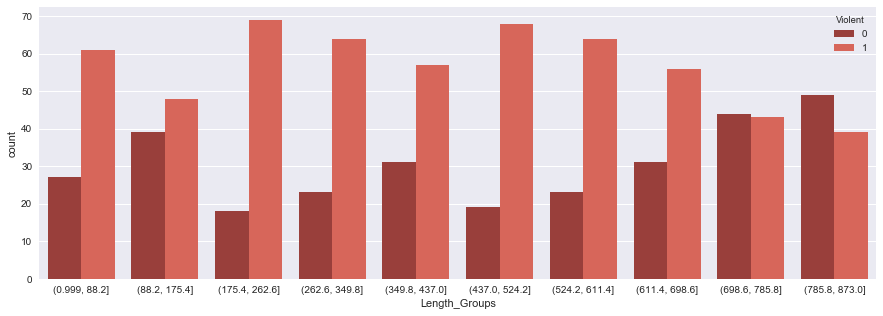

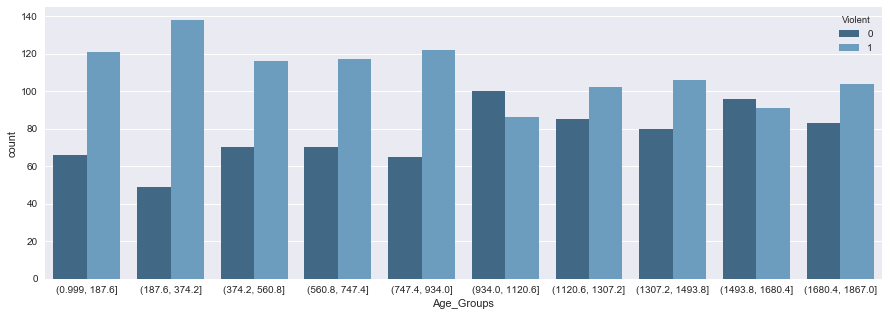

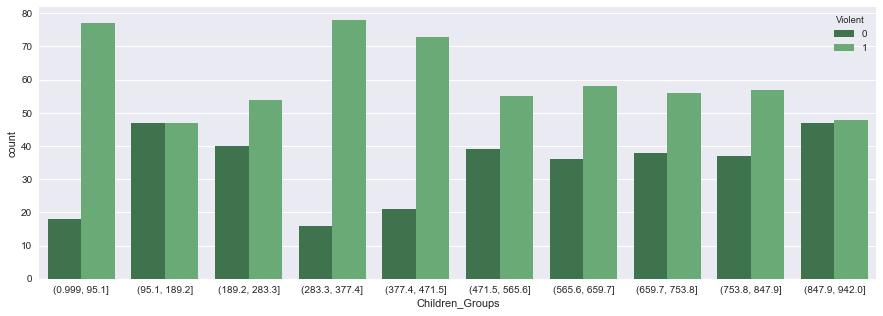

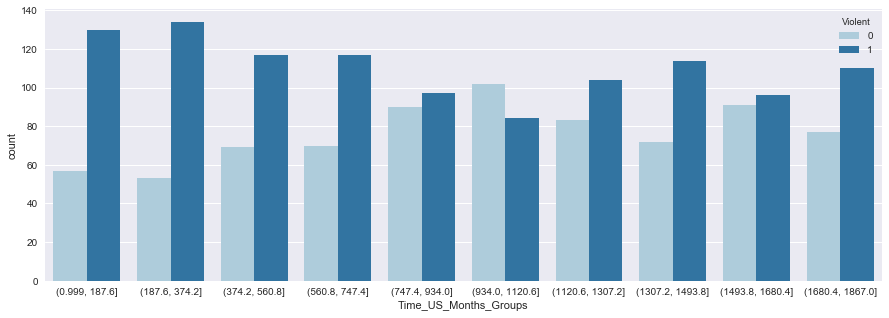

In [66]:
# Beahviour of the binned feature with Violent
plt.figure()
f,ax = plt.subplots(figsize=(15,5))
sns.countplot(x="Length_Groups", hue="Violent",data=df, palette="Reds_d");
plt.figure()
f,ax = plt.subplots(figsize=(15,5))
sns.countplot(x="Age_Groups", hue="Violent",data=df, palette="Blues_d");
plt.figure()
f,ax = plt.subplots(figsize=(15,5))
sns.countplot(x="Children_Groups", hue="Violent",data=df, palette="Greens_d");
plt.figure()
f,ax = plt.subplots(figsize=(15,5))
sns.countplot(x="Time_US_Months_Groups", hue="Violent",data=df, palette="Paired");

In [67]:
# Checking for missing values in the binned features
print("Total Rows: {}, Missing: {}, Missing %: {}".format(df.shape[0],df['Length_Groups'].isnull().sum(),df['Length_Groups'].isnull().sum()/df.shape[0]))
print("Total Rows: {}, Missing: {}, Missing %: {}".format(df.shape[0],df['Age_Groups'].isnull().sum(),df['Age_Groups'].isnull().sum()/df.shape[0]))
print("Total Rows: {}, Missing: {}, Missing %: {}".format(df.shape[0],df['Children_Groups'].isnull().sum(),df['Children_Groups'].isnull().sum()/df.shape[0]))
print("Total Rows: {}, Missing: {}, Missing %: {}".format(df.shape[0],df['Time_US_Months_Groups'].isnull().sum(),df['Time_US_Months_Groups'].isnull().sum()/df.shape[0]))

Total Rows: 1867, Missing: 994, Missing %: 0.5324049276914836
Total Rows: 1867, Missing: 0, Missing %: 0.0
Total Rows: 1867, Missing: 925, Missing %: 0.49544724156400644
Total Rows: 1867, Missing: 0, Missing %: 0.0


C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


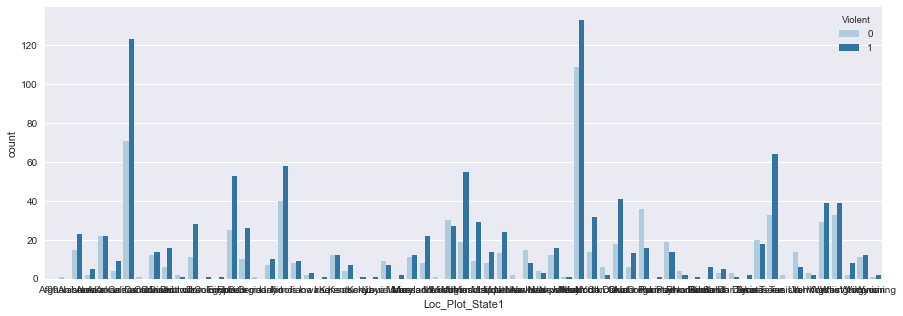

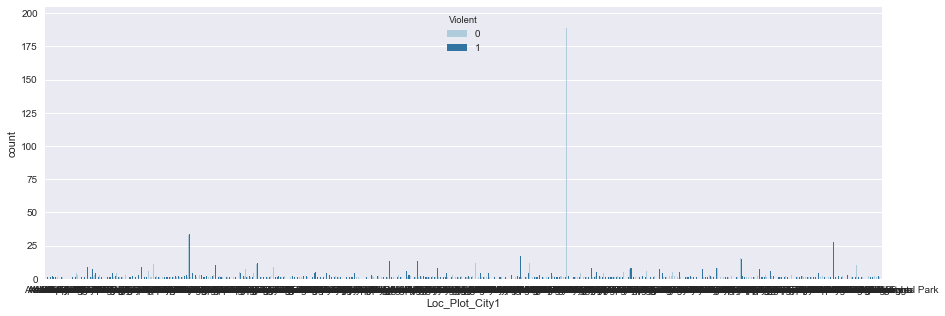

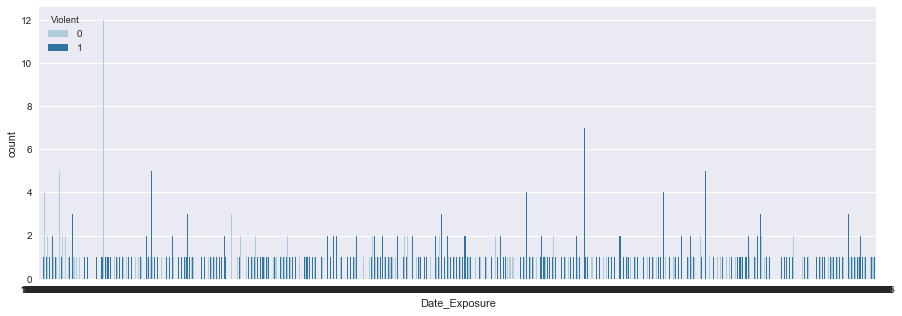

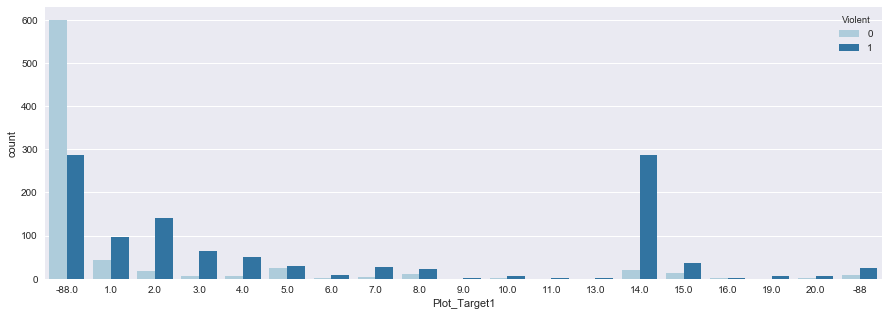

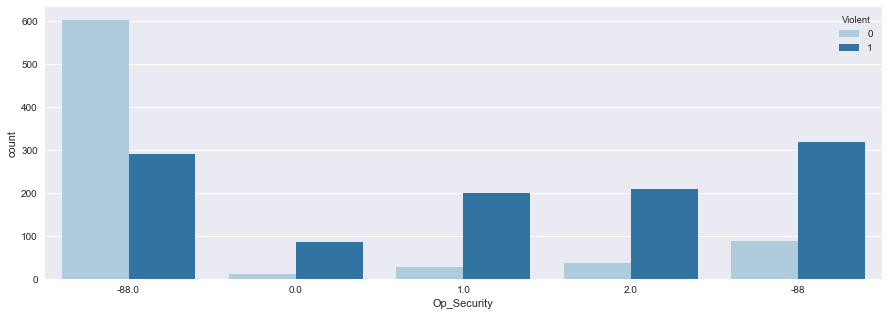

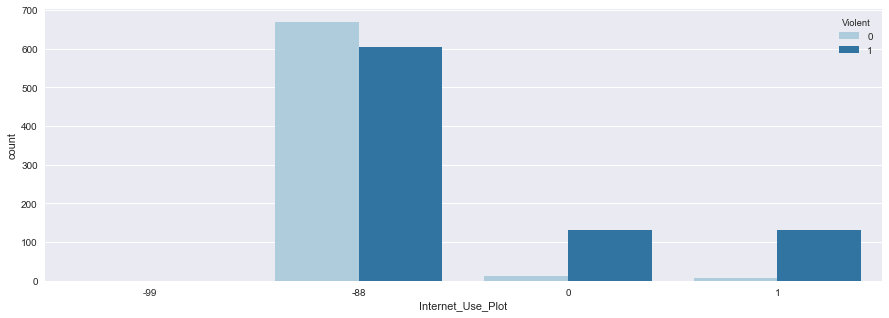

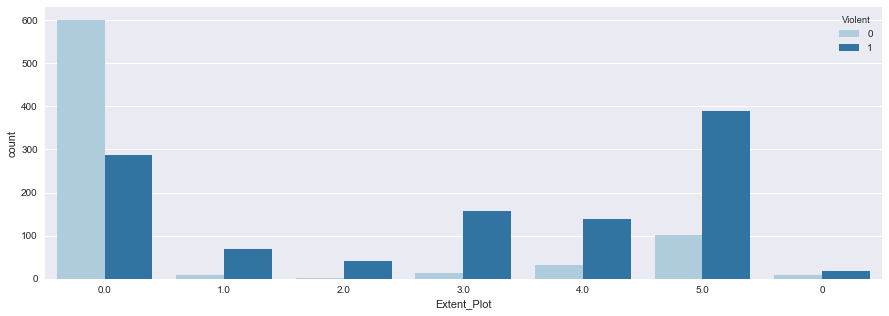

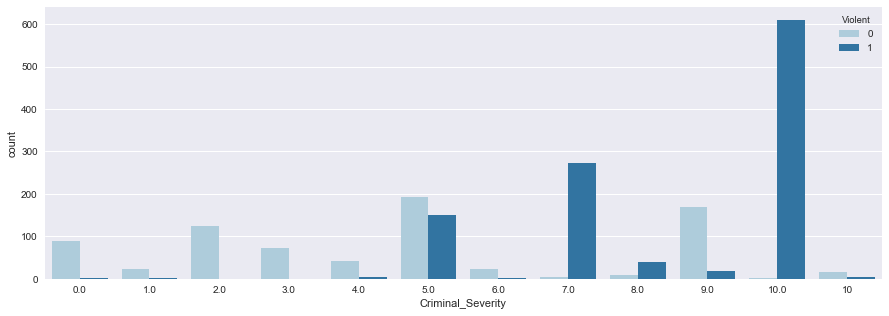

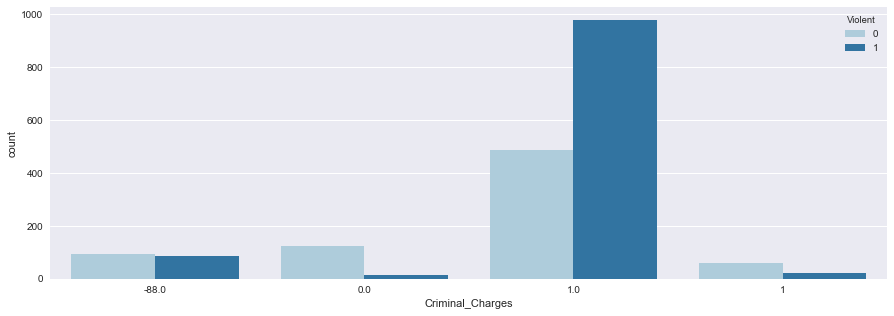

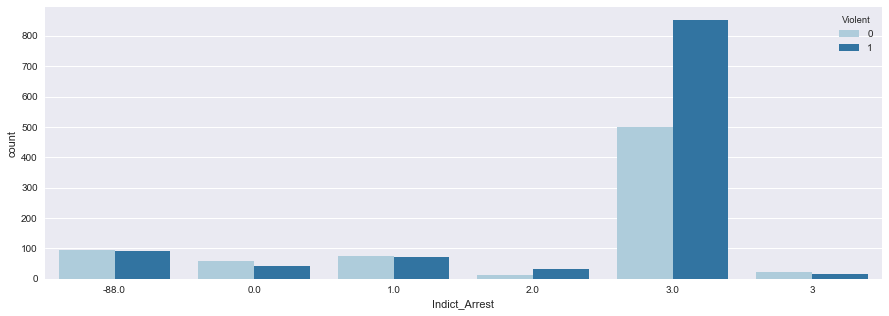

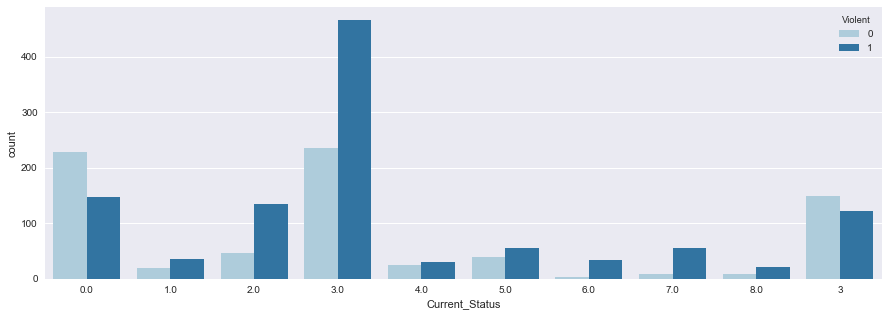

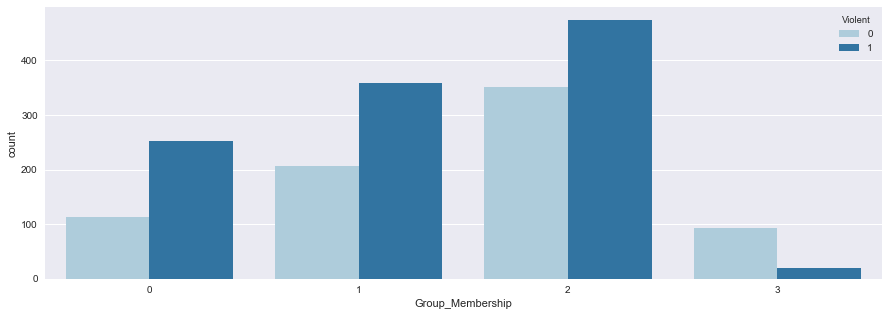

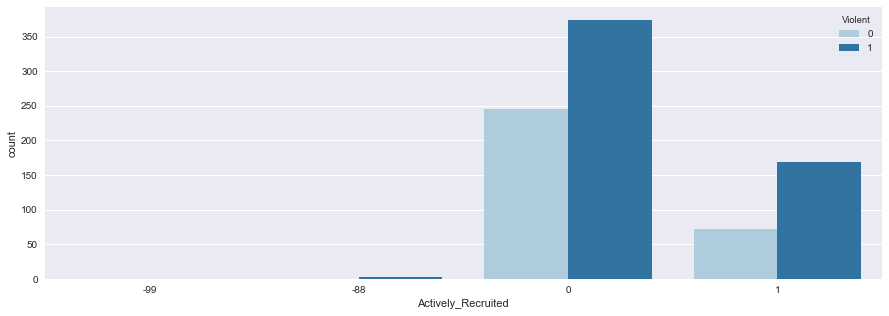

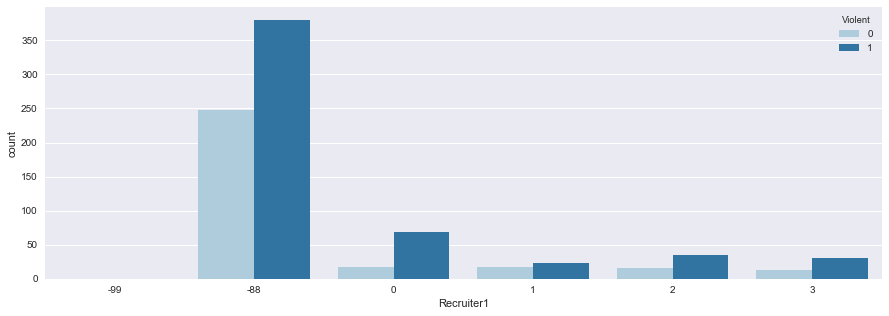

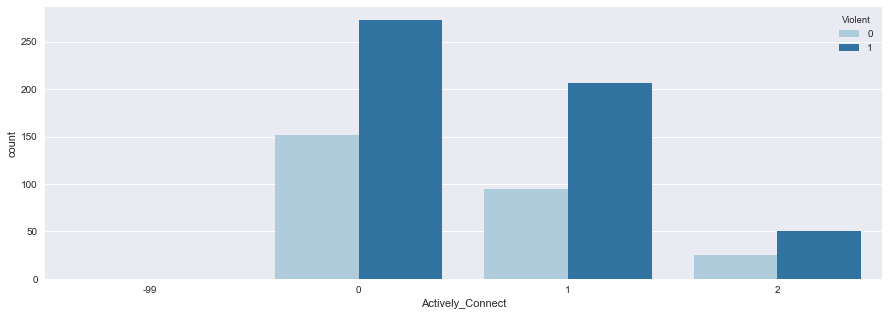

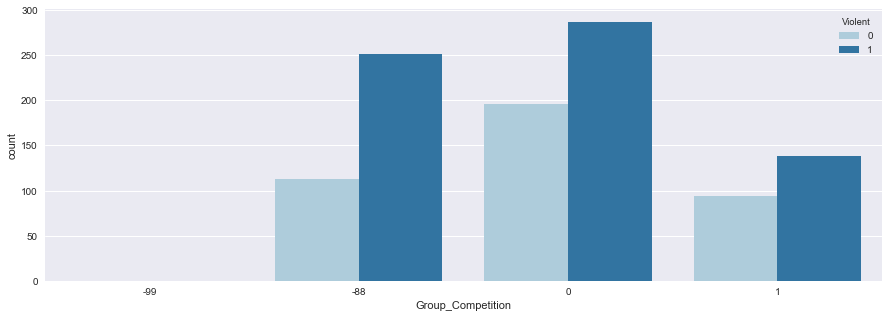

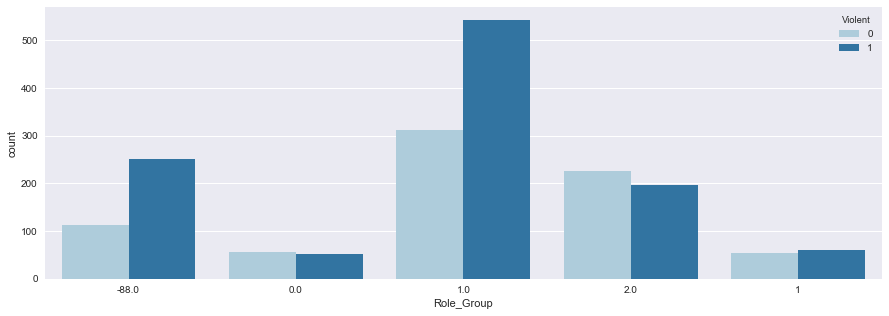

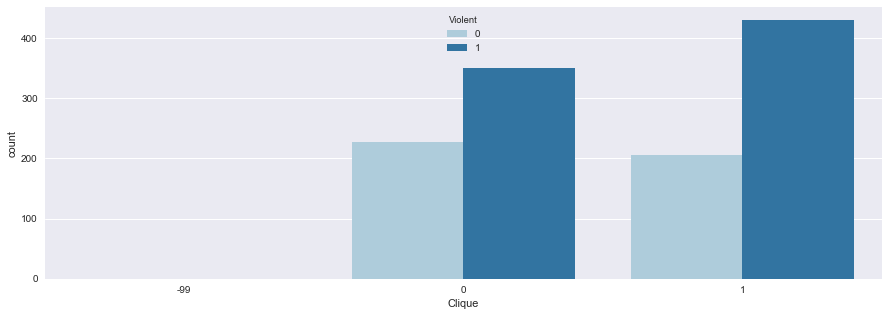

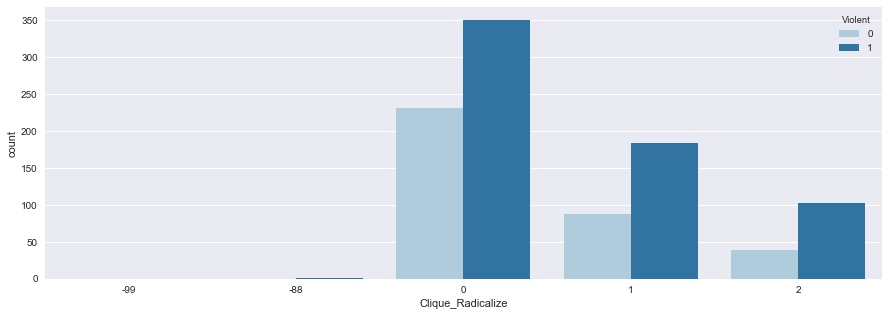

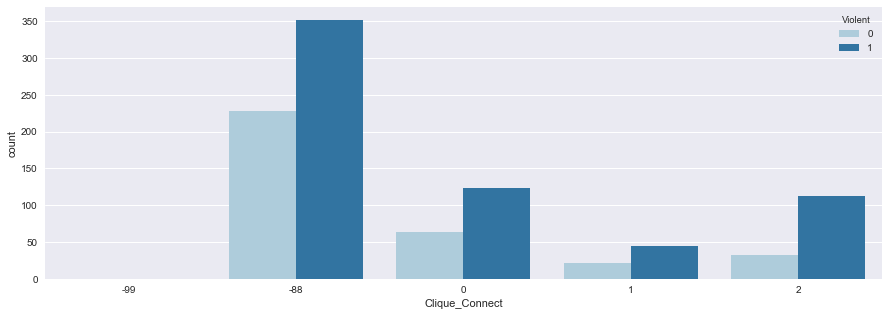

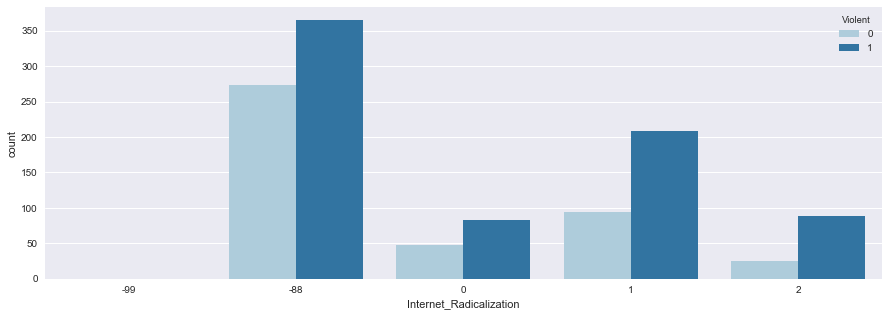

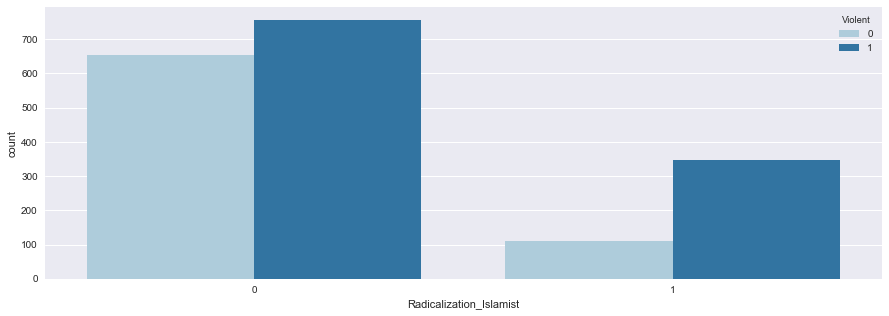

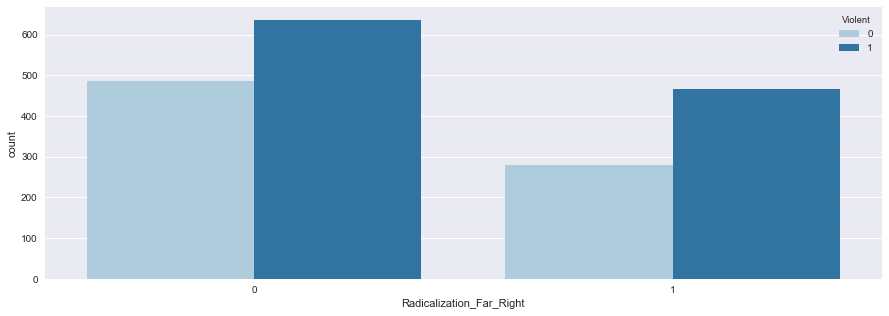

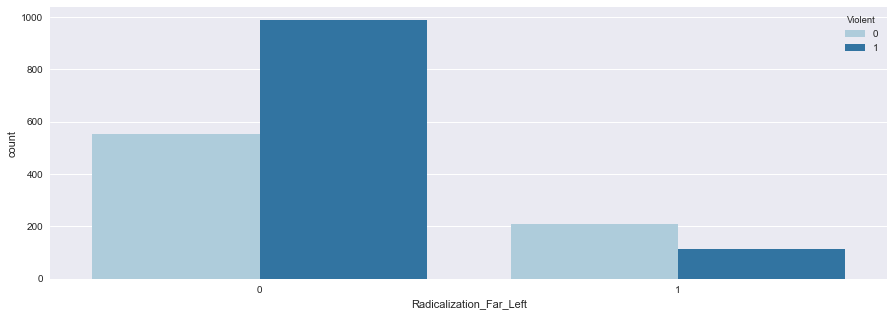

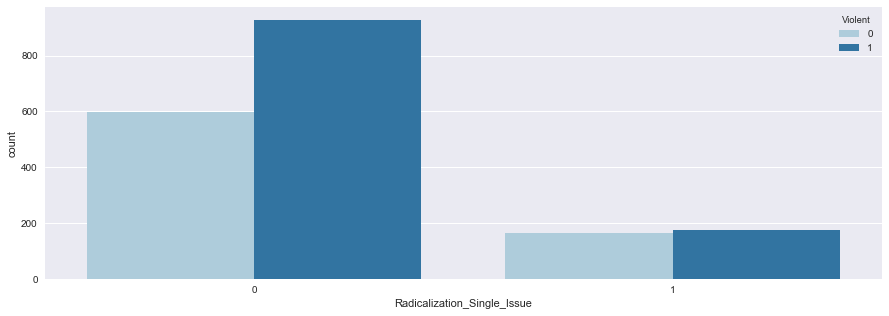

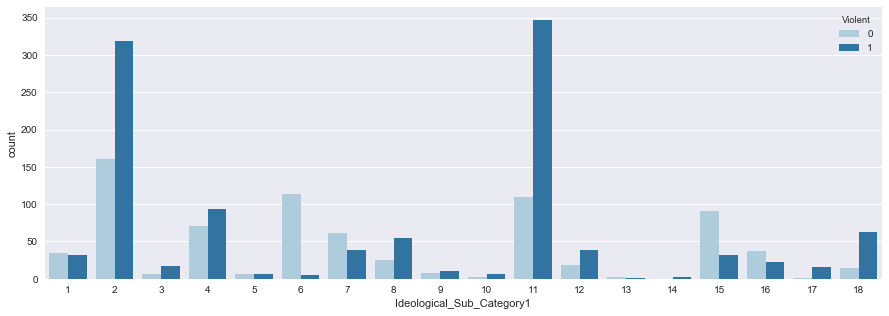

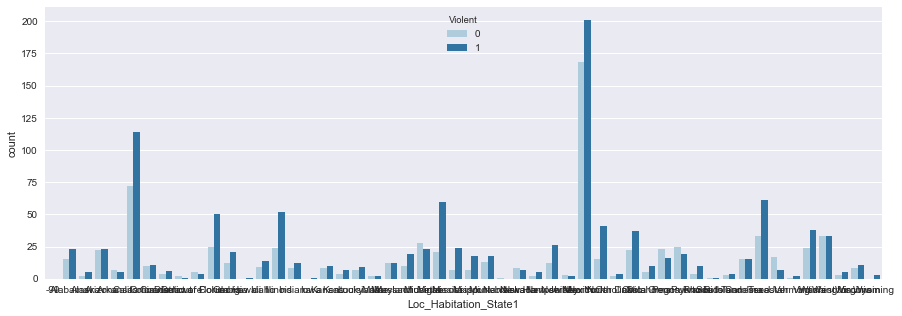

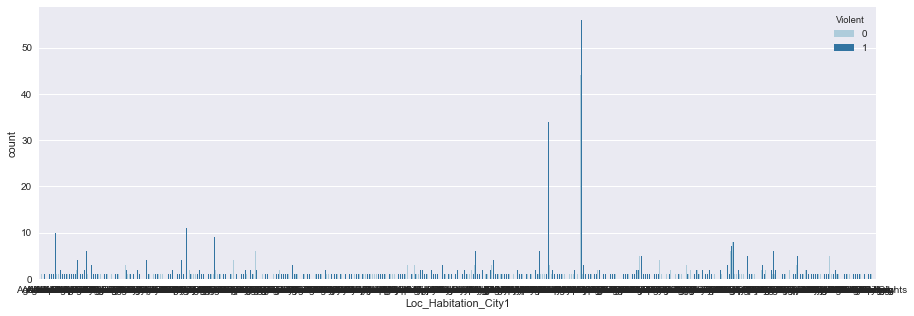

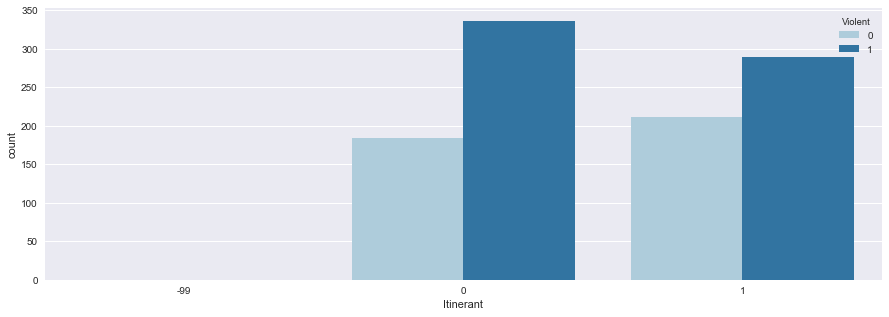

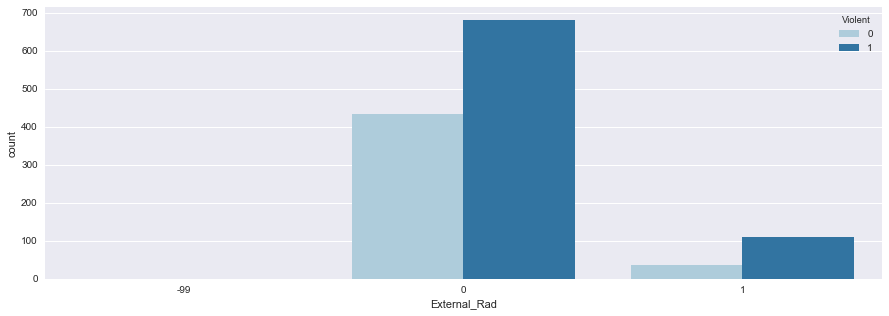

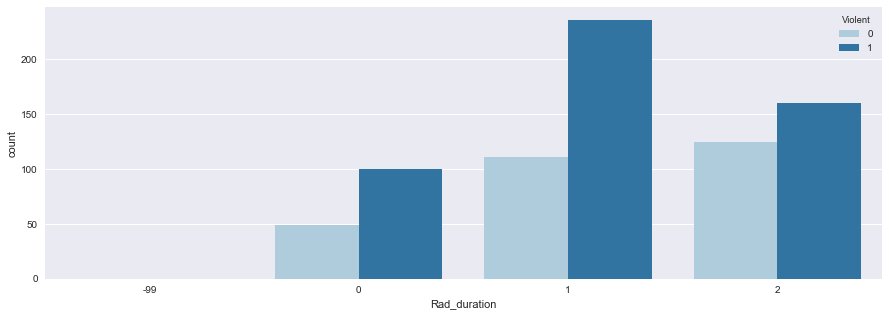

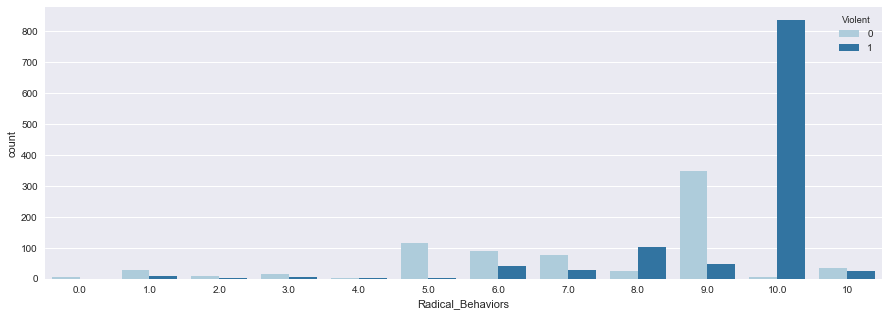

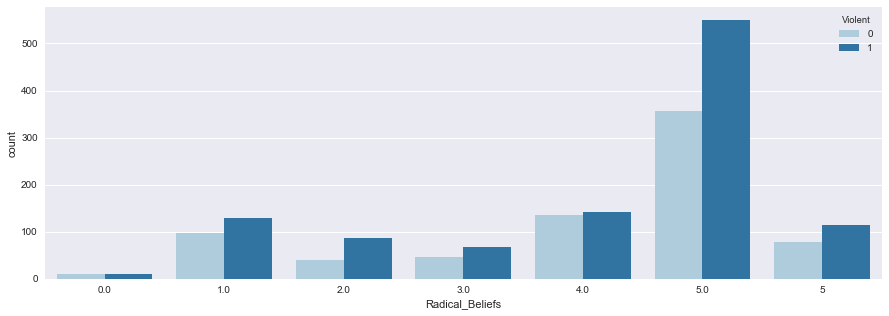

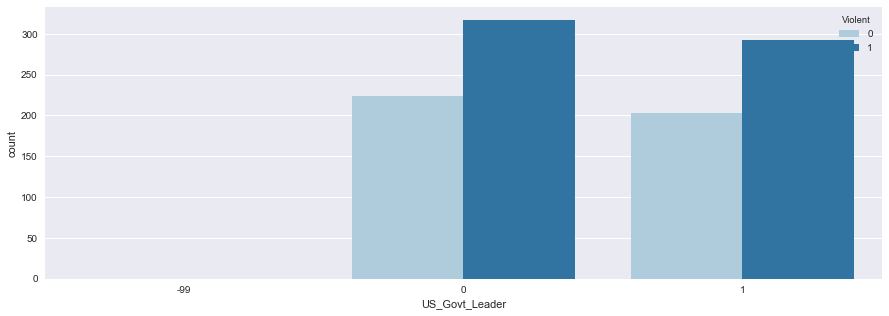

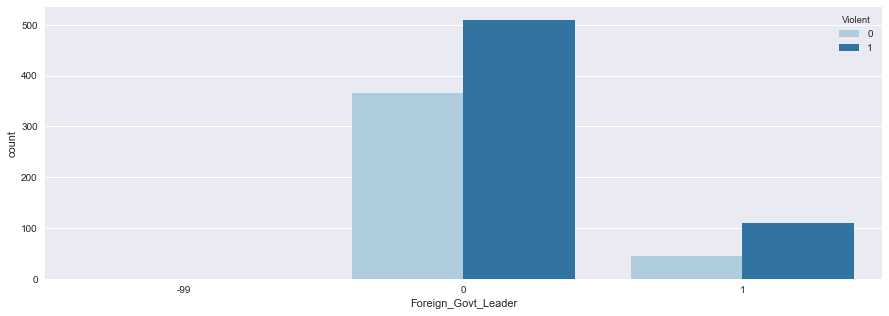

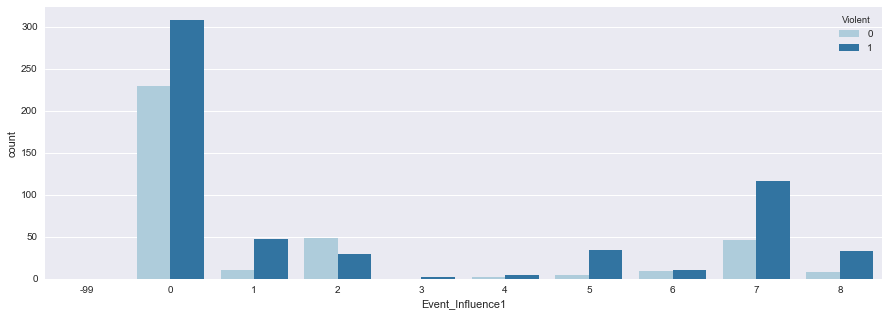

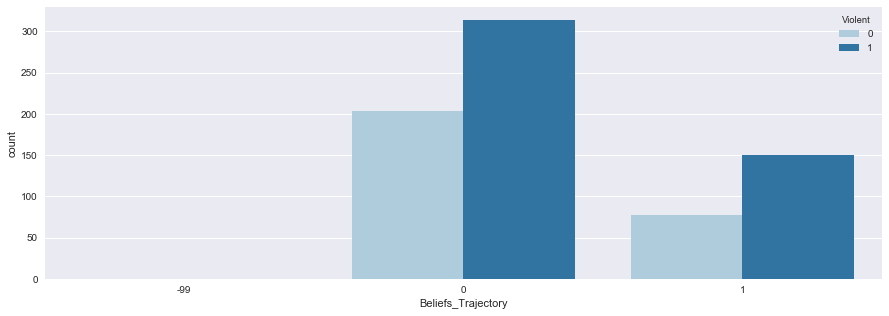

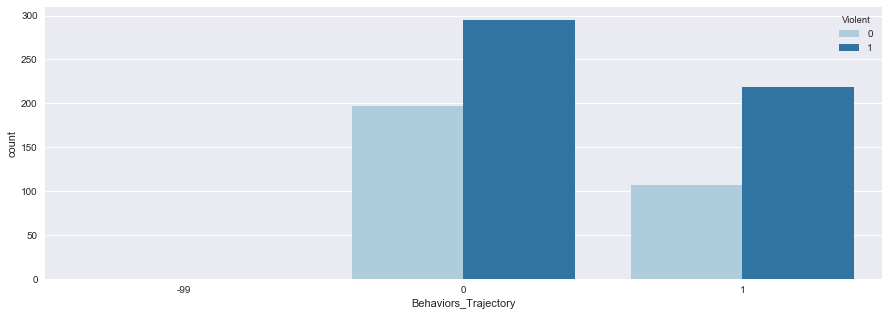

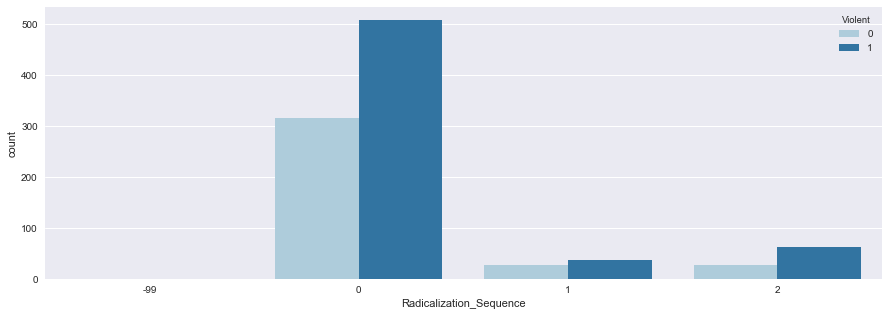

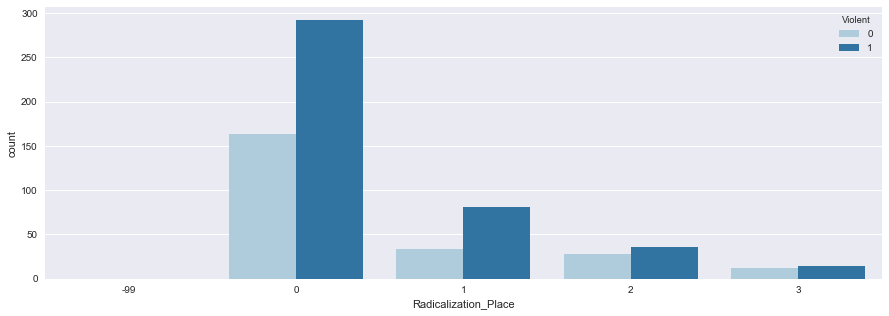

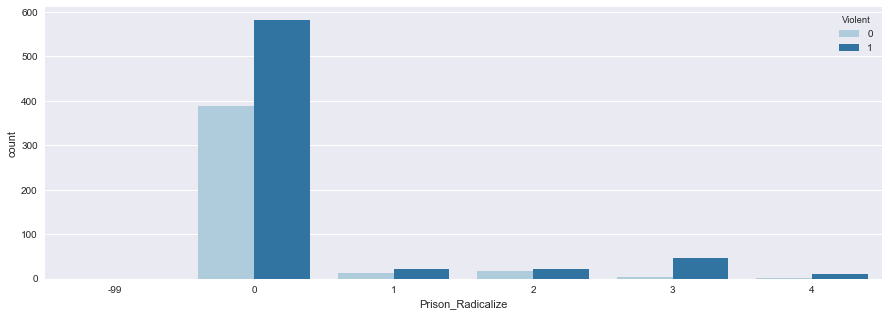

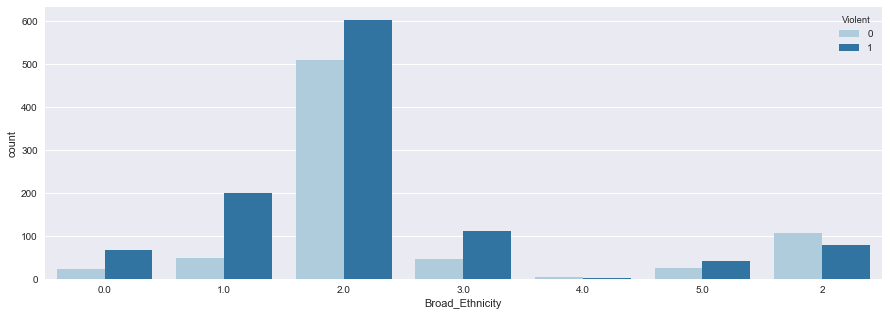

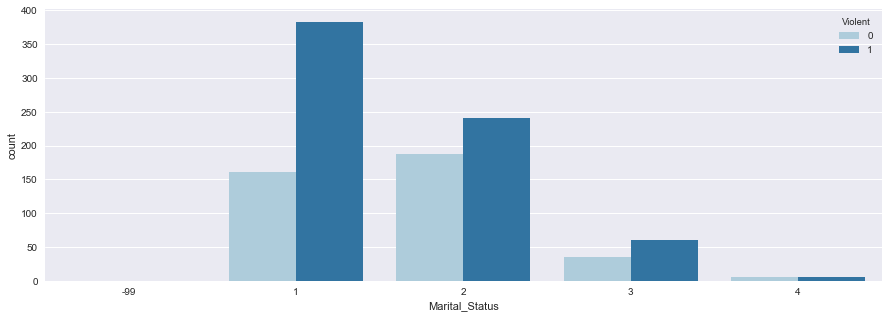

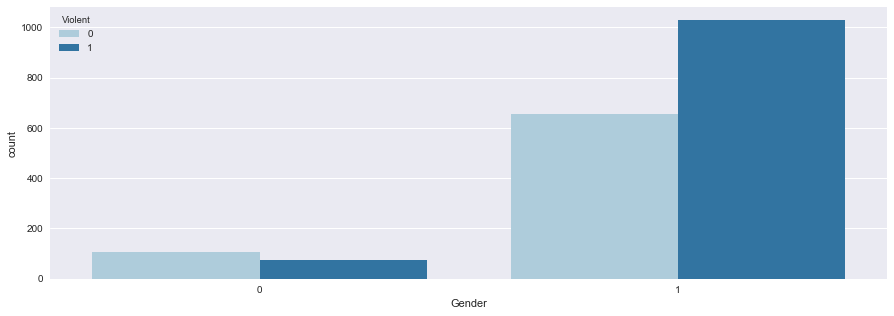

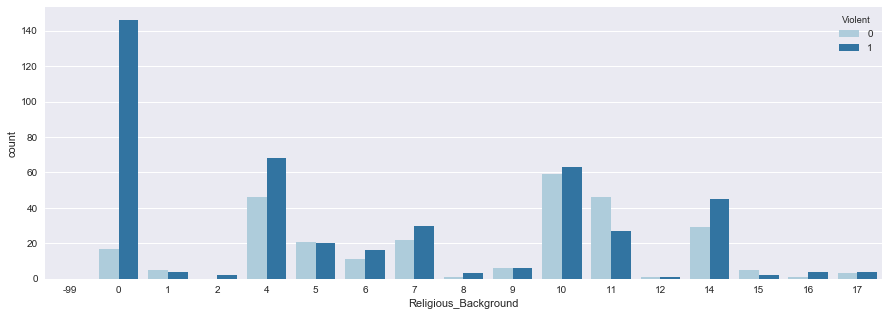

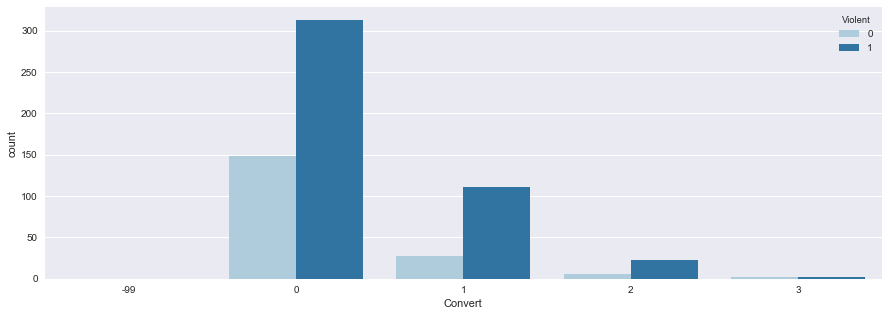

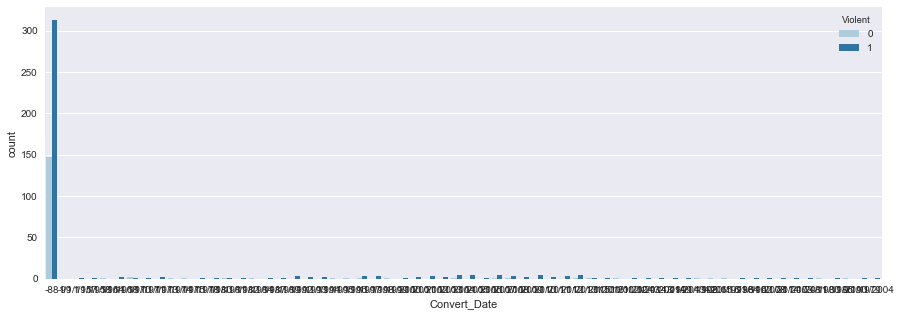

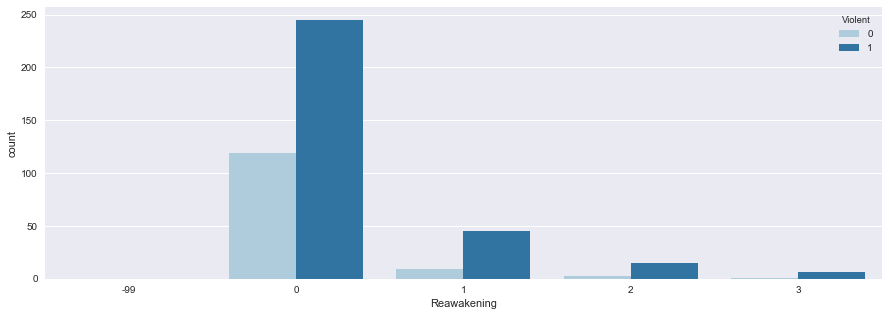

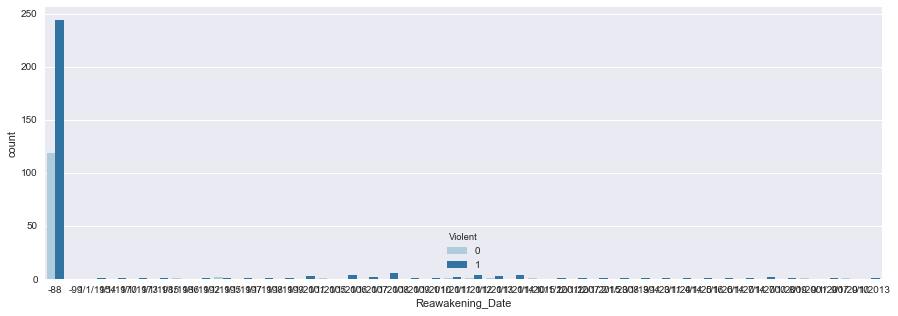

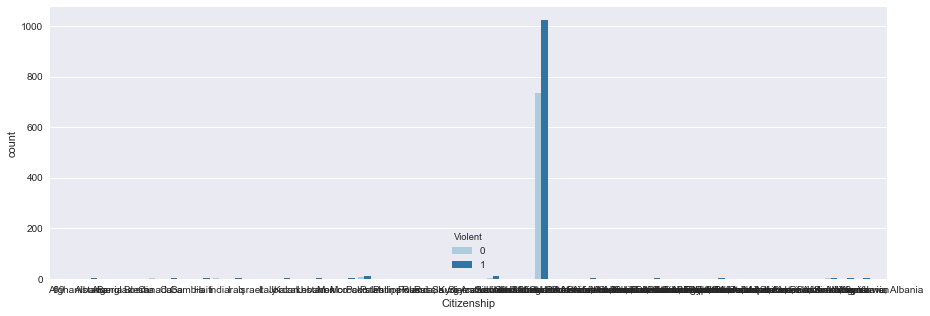

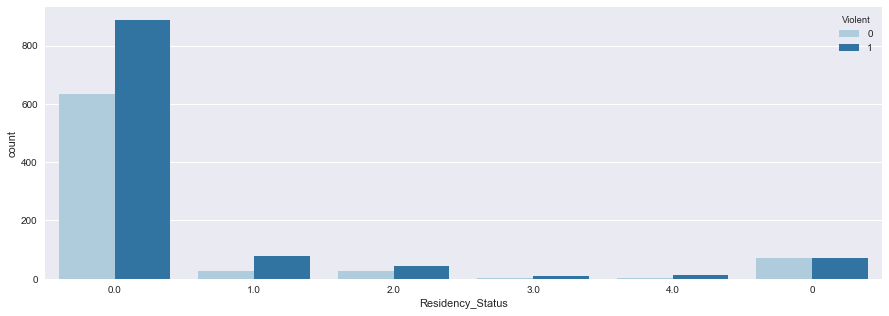

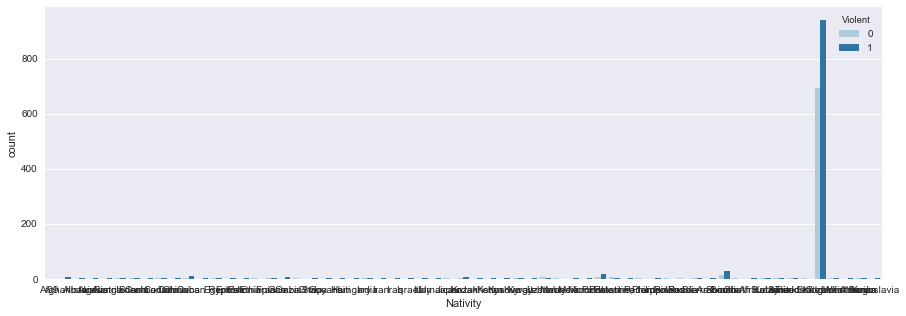

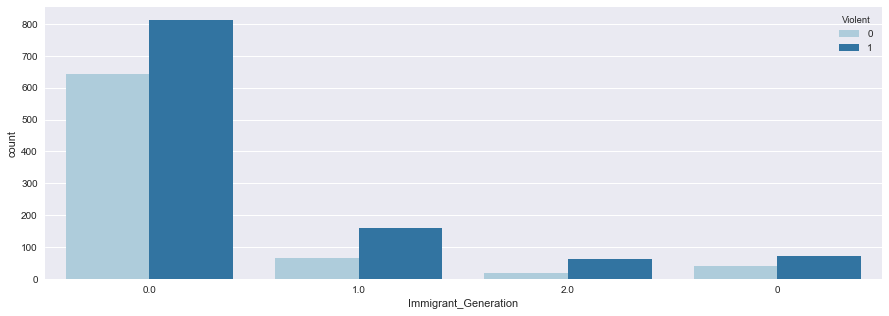

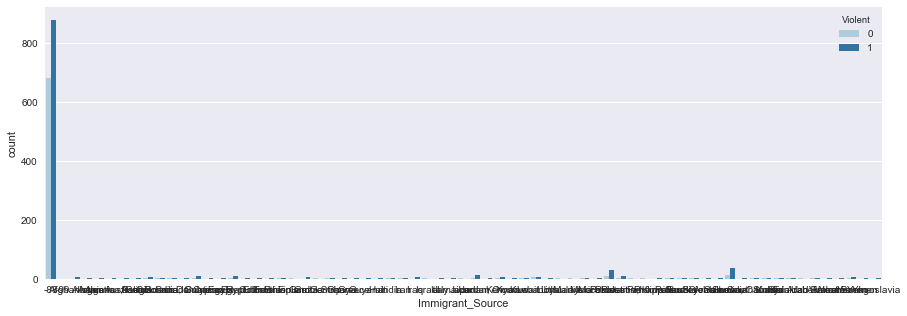

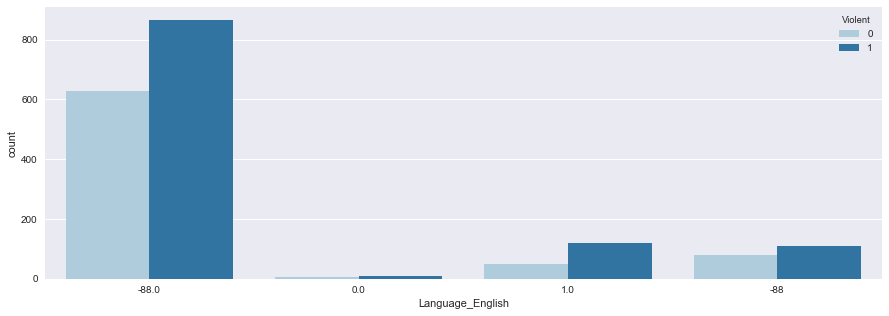

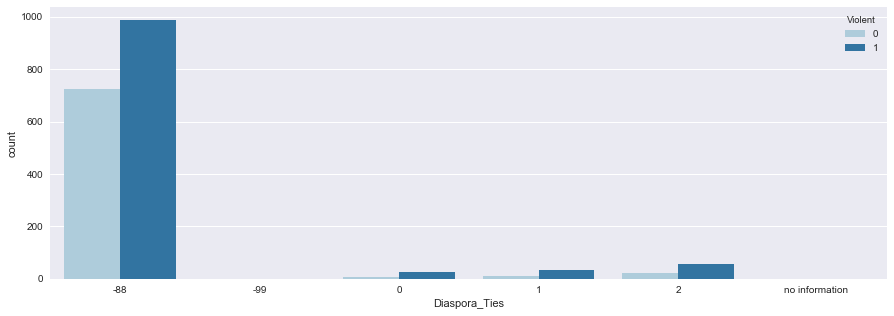

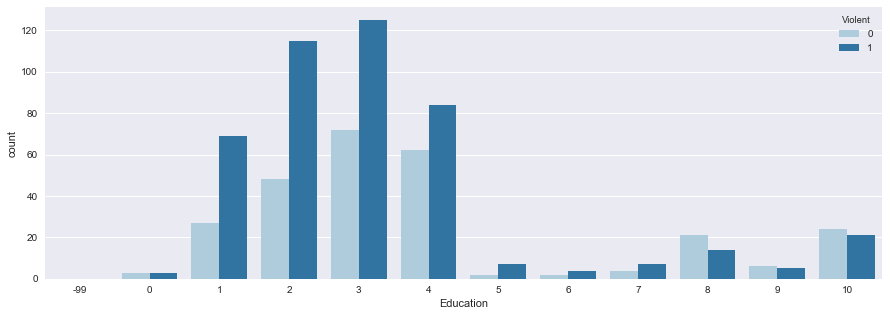

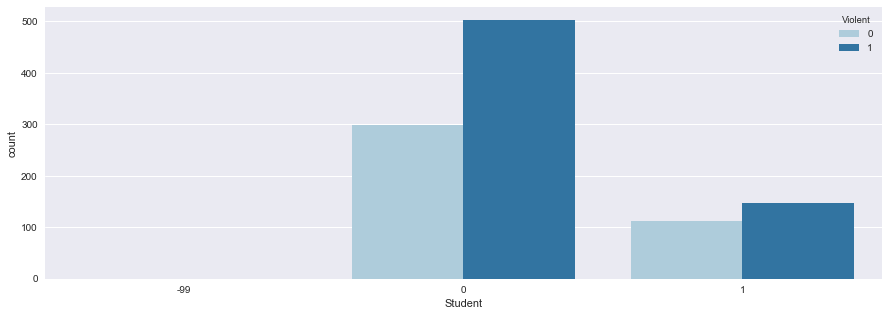

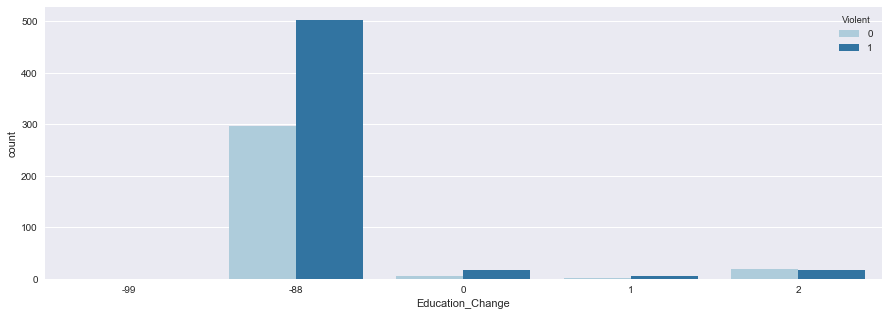

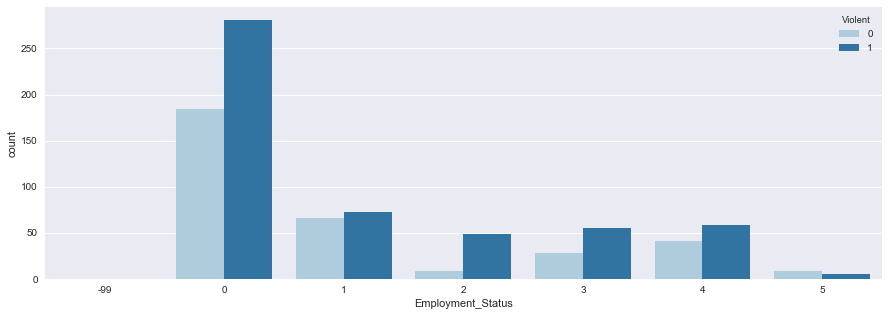

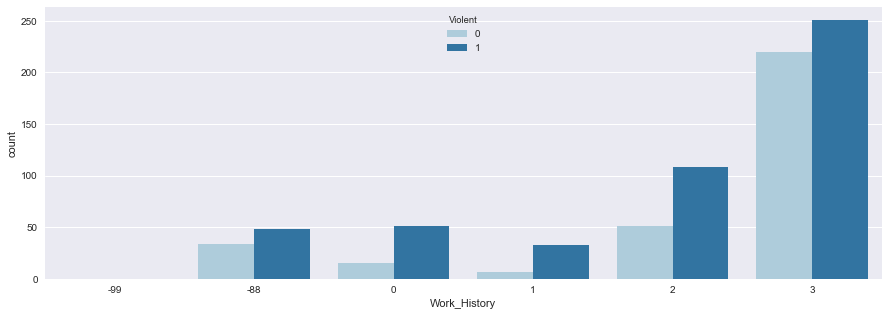

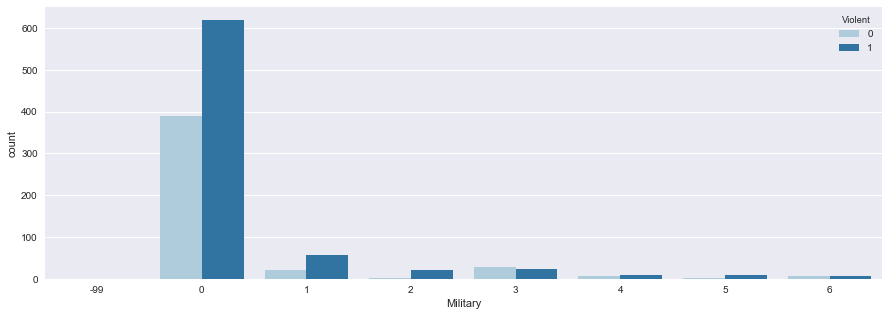

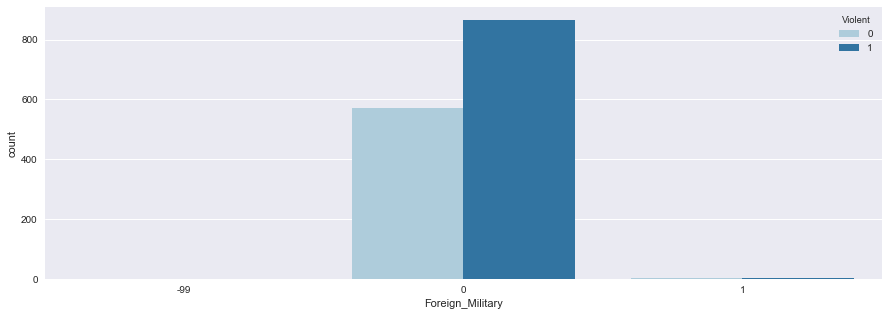

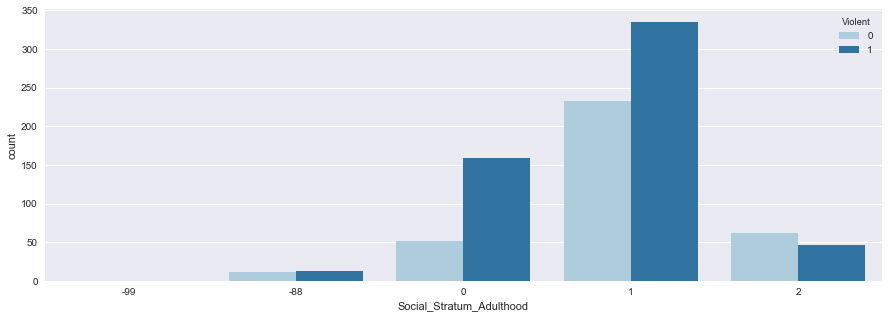

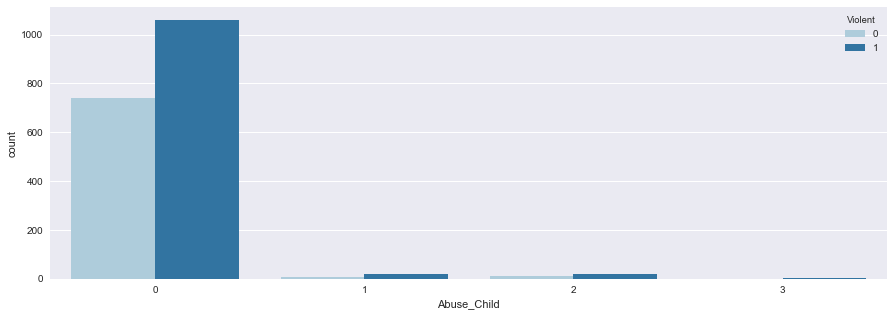

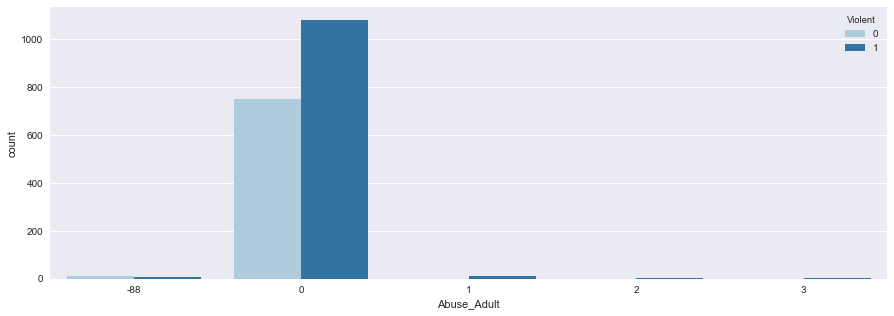

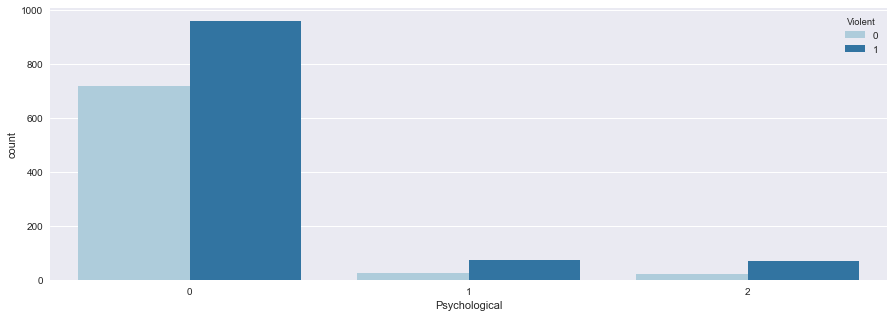

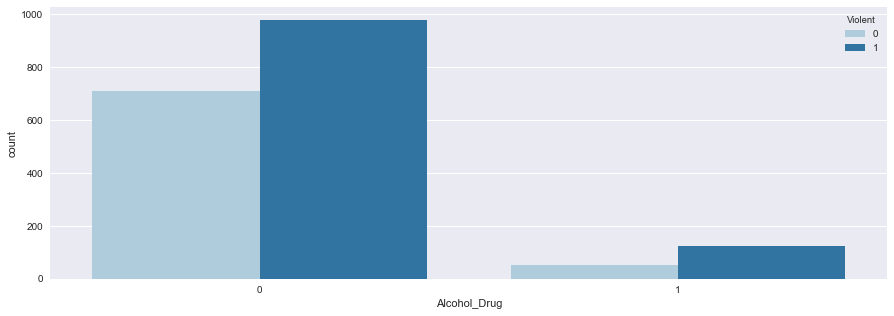

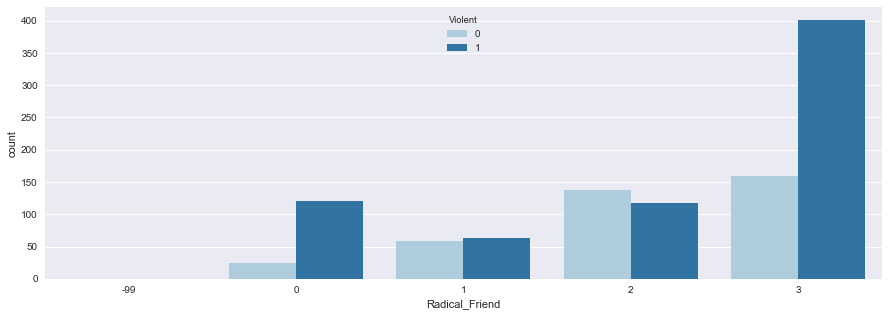

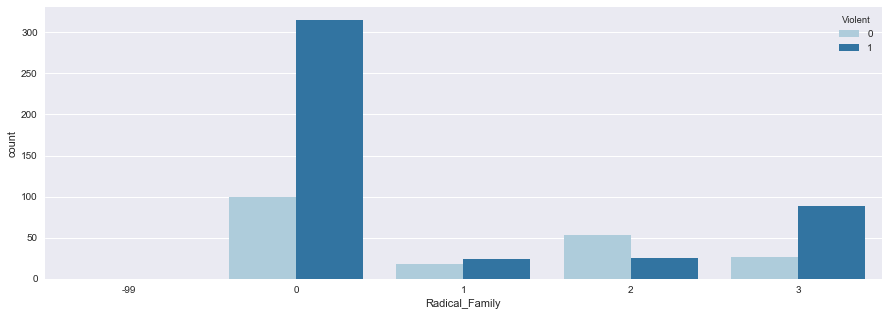

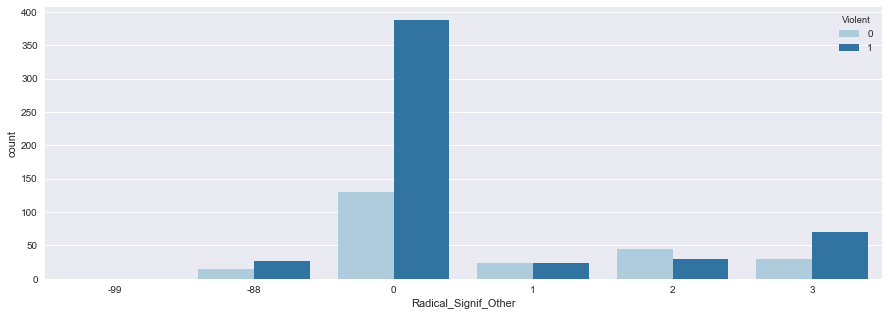

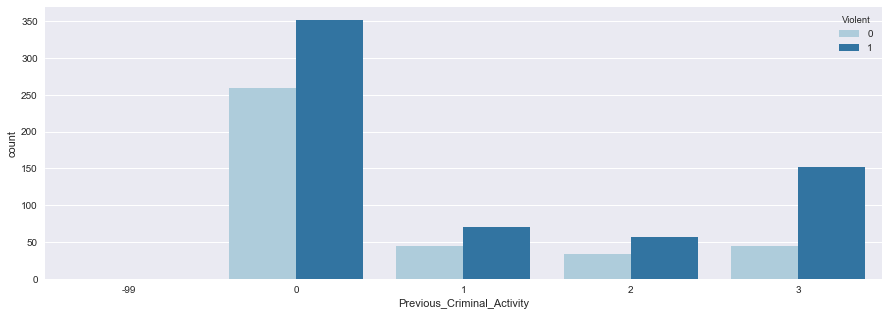

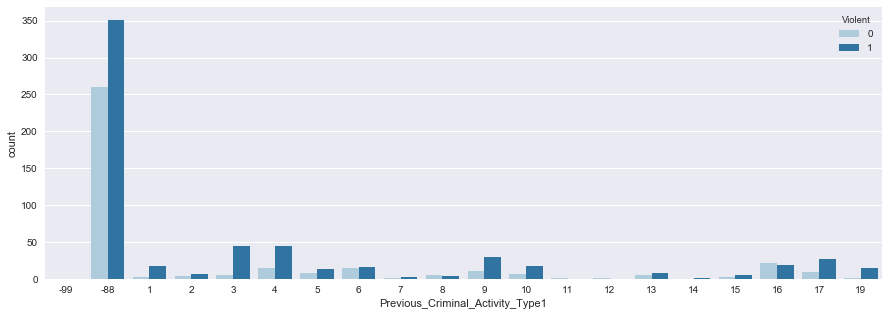

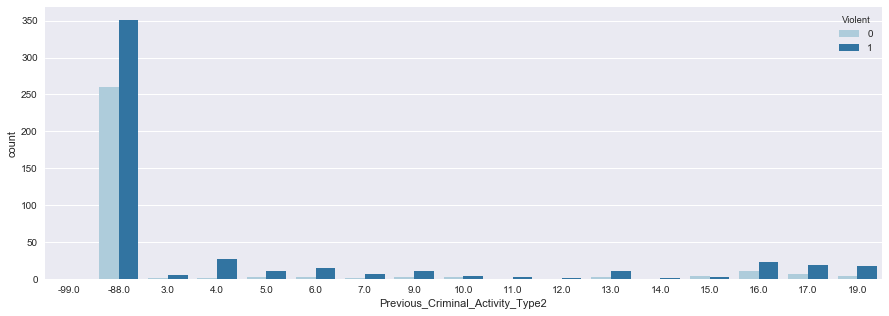

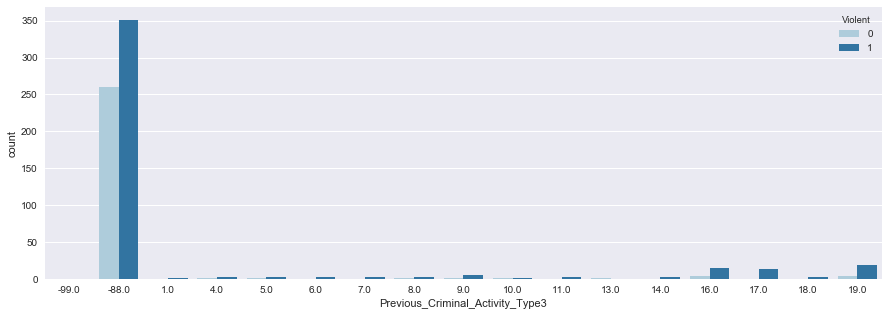

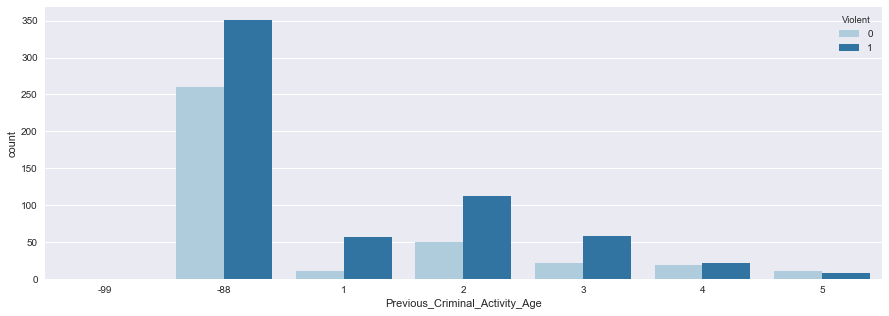

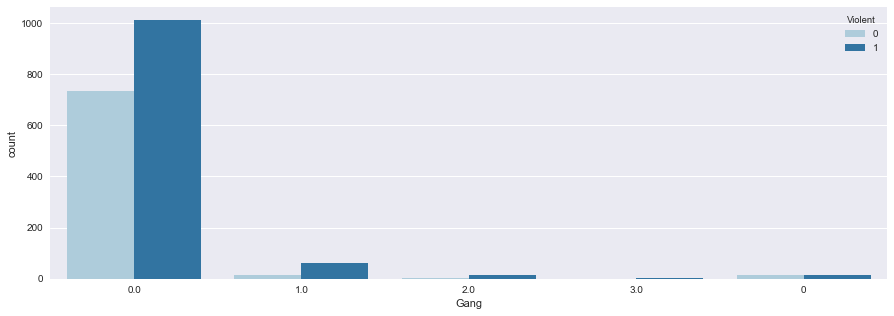

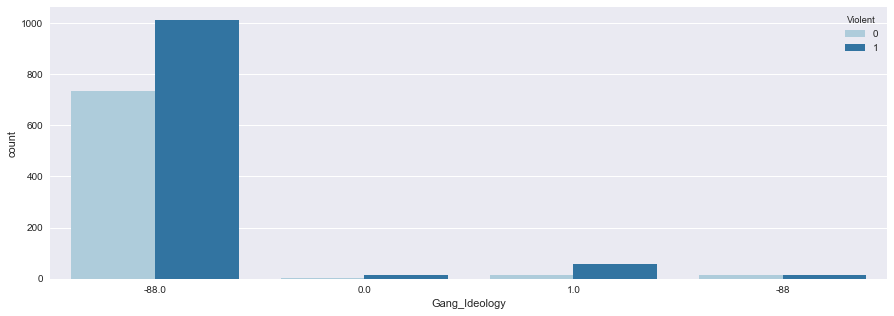

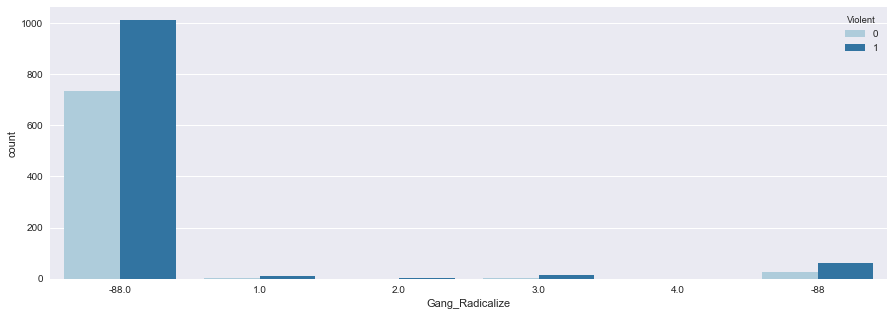

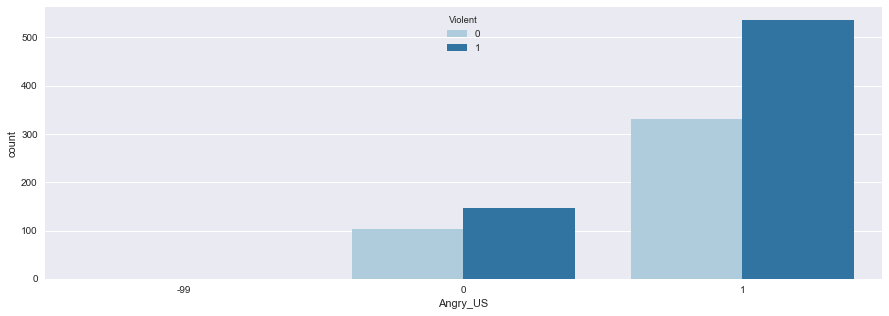

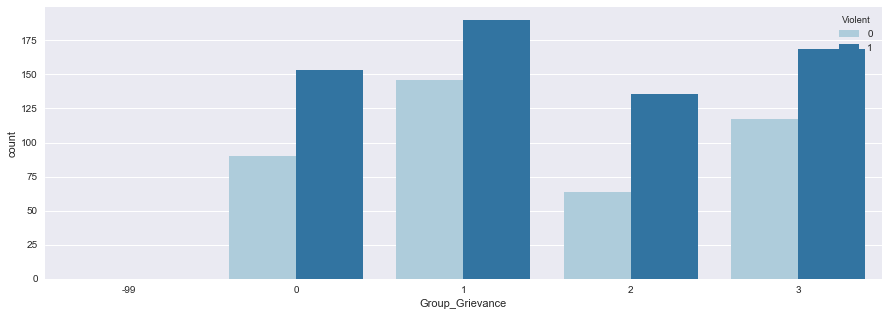

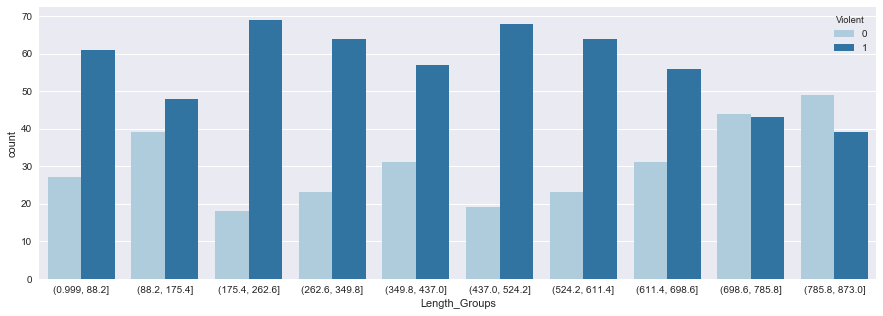

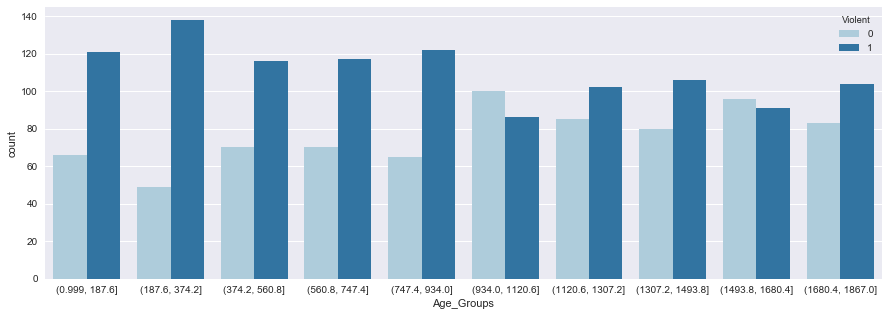

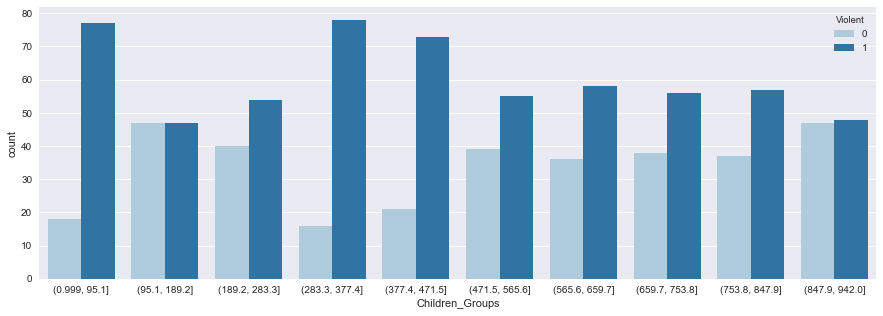

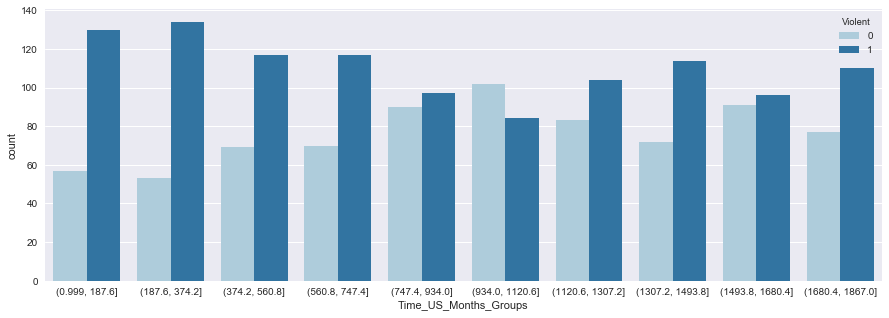

In [68]:
# Understanding individual feature with target feature
for cols in df.columns:
    if cols!='Violent':
        plt.figure()
        f,ax = plt.subplots(figsize=(15,5))
        sns.countplot(x=cols, hue="Violent",data=df, palette="Paired");
    

In [69]:
# Drop unwanted features
df_new =  df.drop(['Children_Groups','Group_Grievance','Length_Groups','Gang_Ideology','Gang_Radicalize','Previous_Criminal_Activity_Type1','Previous_Criminal_Activity_Type2','Previous_Criminal_Activity_Type3','Diaspora_Ties','Language_English','Education_Change','Immigrant_Source','Citizenship','Nativity','Reawakening_Date','Convert_Date','US_Govt_Leader','Criminal_Severity','Indict_Arrest','Criminal_Charges','Loc_Plot_State1','Loc_Plot_City1','Date_Exposure','Plot_Target1','Op_Security','Internet_Use_Plot','Extent_Plot','Recruiter1','Loc_Habitation_State1','Loc_Habitation_City1'],axis=1)

In [70]:
# Converting the entire dataset into dummies
df_dummies = pd.get_dummies(df_new,drop_first=True)
df_dummies.head(5)

Violent_1  Current_Status_1.0  Current_Status_2.0  Current_Status_3.0  \
0          1                   0                   0                   1   
1          0                   0                   0                   1   
2          0                   0                   0                   0   
3          1                   0                   0                   1   
4          1                   0                   0                   1   

   Current_Status_4.0  Current_Status_5.0  Current_Status_6.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Current_Status_7.0  Current_Status_8.0  Current_Status_3  \
0                   0                   0                 0   
1                   0                   0                 0   
2                   1                   0                 0   
3                   0                   0                 0   
4                   0                   0                 0   

   Group_Membership_1  Group_Membership_2  Group_Membership_3  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   Actively_Recruited_-88  Actively_Recruited_0  Actively_Recruited_1  \
0                       0                     0                     1   
1                       0                     1                     0   
2                       0                     0                     1   
3                       0                     0                     0   
4                       0                     0                     1   

   Actively_Connect_0  Actively_Connect_1  Actively_Connect_2  \
0                   1                   0                   0   
1                   0                   0                   1   
2                   0                   1                   0   
3                   1                   0                   0   
4                   0                   1                   0   

   Group_Competition_-88  Group_Competition_0  Group_Competition_1  \
0                      0                    1                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    1                    0   
4                      0                    1                    0   

   Role_Group_0.0  Role_Group_1.0  Role_Group_2.0  Role_Group_1  Clique_0  \
0               0               1               0             0         0   
1               0               1               0             0         0   
2               0               0               1             0         0   
3               0               1               0             0         0   
4               0               1               0             0         0   

   Clique_1  Clique_Radicalize_-88  Clique_Radicalize_0  Clique_Radicalize_1  \
0         1                      0                    0                    0   
1         1                      0                    0                    1   
2         1                      0                    0                    0   
3         1                      0                    0                    0   
4         1                      0                    0                    0   

   Clique_Radicalize_2  Clique_Connect_-88  Clique_Connect_0  \
0                    1                   0                 0   
1                    0                   0                 0  

In [71]:
df_dummies.shape

(1867, 249)

### <hr>2.1. Split the dataset into <font color="#66BB6A">Train</font>, <font color="#66BB6A">Test</font> using <font color="#42A5F5">Scikit Learn</font>

In [72]:
df_y = df_dummies['Violent_1']
df_X = df_dummies.drop('Violent_1',axis=1)

In [73]:
df_X.isnull().values.any()

False

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#Normalising input

df_X_norm = (df_X - df_X.min()) / (df_X.max() - df_X.min())
df_X_norm.insert(loc=0, column='Intercept', value=np.ones(df_X_norm.shape[0]))
features_s = SelectKBest(chi2, k=20)

fit = features_s.fit(df_X_norm, df_y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
df_best = fit.transform(df_X_norm)


[  0.      0.473  17.158  15.868   0.277   0.001  13.876  19.709   1.812
  22.16    4.509   0.98   82.167   2.078   0.461  11.841   4.674  10.907
   1.786  14.689   0.023   0.016   6.28    6.718  27.917   1.733   0.596
  19.597   0.693   0.325   8.716  10.636   0.623   4.045   1.995  21.317
   0.922   0.993  11.986  17.007  53.678   3.827  76.511   8.141  11.2
   1.372   0.381   0.898 146.798  17.538   2.812   0.092   0.493  53.678
   1.358   0.823   1.385  55.615  10.681   8.633  15.179   6.594   0.338
   1.941  15.974   3.979  11.453   1.018  22.728   6.97   12.025   0.002
 165.506  41.604  41.531  22.487 359.799 563.774   9.034   0.401   4.667
   0.      6.998   0.993   0.021   0.268   9.715   0.659  11.565  14.554
   1.385   0.143  14.521   0.138  10.514   7.773   0.508   4.602   0.158
   8.845   2.21    0.098   3.879   4.89    6.134   0.212   0.139   0.297
   0.345   0.229  24.544   4.61   45.945  10.829   8.161   2.695   0.361
  20.521  28.863   1.359   0.791   0.845   2.759  62.

In [75]:
best_f = pd.DataFrame()
best_f['Features']=df_X_norm.columns
best_f['Rel']=fit.scores_

In [76]:
# Selecting the top 20 features as per their fit scores with violent
best_f.sort_values(by='Rel', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(20)

Features         Rel
77         Radical_Behaviors_10.0  563.774104
76          Radical_Behaviors_9.0  359.798567
72          Radical_Behaviors_5.0  165.506258
48    Ideological_Sub_Category1_6  146.797816
12             Group_Membership_3   82.167497
42      Radicalization_Far_Left_1   76.511402
123        Religious_Background_0   62.686490
57   Ideological_Sub_Category1_15   55.615471
40      Radicalization_Islamist_1   53.678430
53   Ideological_Sub_Category1_11   53.678430
211        Radical_Signif_Other_0   53.656536
206              Radical_Family_0   48.592779
112           Broad_Ethnicity_1.0   45.944560
73          Radical_Behaviors_6.0   41.603524
74          Radical_Behaviors_7.0   41.531149
205              Radical_Friend_3   35.684497
202              Radical_Friend_0   33.631554
118              Marital_Status_1   28.863362
24                 Role_Group_2.0   27.916532
218  Previous_Criminal_Activity_3   27.664132

In [77]:
# Converting the numpy array into a dataframe
df_X = pd.DataFrame(df_best)

Selected best features:

Radical_Behaviors
Ideological_Sub_Category
Group_Membership
Radicalizationm
Religious_Background
Radical_Signif_Other
Radical_Family
Broad_Ethnicity
Radical_Friend
Marital_Status
Role_Group
Previous_Criminal_Activity


In [78]:
# Splitting into test and training set randomly -- random_state = 100  is the seed for split function
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 100)

In [79]:
df_X_train.isnull().values.any()

False

In [80]:
df_X_train.head(5)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
344  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
834  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
734  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
195  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
47   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   

      14   15   16   17   18   19  
344  0.0  0.0  0.0  1.0  1.0  1.0  
834  0.0  0.0  1.0  0.0  0.0  1.0  
734  0.0  0.0  0.0  1.0  1.0  1.0  
195  1.0  0.0  1.0  1.0  1.0  0.0  
47   1.0  1.0  0.0  1.0  1.0  0.0

## <hr> 3. Modelling <font color="#5C6BC0">Logistic Regression</font>

### 3.1 Logistic Regression <font color="#EC407A">Training</font>

In [81]:
# Training the model and printing the coeficients for each feature
logreg = LogisticRegression().fit(df_X_train,df_y_train)
columns = df_X_train.columns
for i,cols in enumerate(columns):
    print(cols,'::::',logreg.coef_[0][i])

0 :::: -0.39667164892193923
1 :::: -0.11179124235561745
2 :::: 0.30513243008805424
3 :::: -1.1488333358868135
4 :::: -0.951197117772188
5 :::: 0.30513243008805424
6 :::: -1.1248611115223182
7 :::: -2.412715052741484
8 :::: -1.2411812733544236
9 :::: -0.3084637197267294
10 :::: -0.9655719053068162
11 :::: 4.665148338539419
12 :::: 0.648705571059752
13 :::: 0.4209467221160653
14 :::: 1.1141509862311485
15 :::: -0.13976027584758072
16 :::: 0.5571367675654447
17 :::: 0.5785348725066717
18 :::: 0.01027082065220015
19 :::: 0.5368367706372191


### <hr>3.2 Logistic Regression <font color="#EC407A">Validation</font>

In [82]:
X_train_predict = logreg.predict(df_X_train.head(100))
print(X_train_predict)

[1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0]


In [83]:
X_train_mod_out_log = pd.DataFrame({'Actual_Violent':df_y_train.head(100),'Predicted_Violent':X_train_predict})
X_train_mod_out_log

Actual_Violent  Predicted_Violent
344                1                  1
834                0                  0
734                1                  1
195                1                  1
47                 1                  1
650                1                  1
1693               1                  1
490                0                  0
1021               0                  0
654                0                  1
91                 1                  1
777                1                  1
652                0                  0
977                1                  0
1122               1                  1
1162               1                  1
991                0                  0
646                1                  0
1744               0                  0
1017               0                  0
629                1                  1
1089               1                  1
667                1                  1
725                1                  1
315                1                  0
1664               0                  1
1825               0                  0
171                1                  1
941                1                  1
531                0                  0
508                1                  1
731                1                  1
1792               1                  1
1390               1                  1
784                0                  0
10                 1                  1
105                1                  1
44                 1                  1
815                0                  0
1131               0                  0
1758               0                  0
1227               1                  1
1411               0                  0
1653               1                  1
1301               1                  1
740                0                  0
1754               0                  0
559                0                  0
432                0                  0
1554               0                  0
133                1                  1
1487               1                  1
1429               0                  0
24                 1                  1
1582               1                  1
789                1                  1
1496               1                  1
610                0                  0
570                0                  0
501                1                  1
843                1                  1
1257               0                  0
302                1                  1
1007               1                  1
1443               1                  1
993                1                  1
82                 1                  1
1195               0                  0
1025               0                  0
951                1                  1
766                0                  0
1389               1                  1
479                1                  1
1528               1                  1
48                 1                  1
962                0                  0
622                1                  1
1248               1                  0
1180               1                  1
562                1                  1
1672               1                  1
773                1                  0
1129               1                  1
1394               1                  1
309                0                  0
92                 1                  1
1504               1                  0
1045               1                  1
1539               1                  1
312                0                  0
857                1                  1
1132               0                  0
1093               1                  1
1585               1                  1
1140               1                  1
1085               1                  1
1420               1                  1
590                0                  0
1245               0                  0
902   

In [84]:
y = X_train_mod_out_log.Actual_Violent
predictions = X_train_mod_out_log.Predicted_Violent
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.92
Confusion matrix: 
 [[33  2]
 [ 6 59]]
Classification report:
               precision    recall  f1-score   support

          0       0.85      0.94      0.89        35
          1       0.97      0.91      0.94        65

avg / total       0.92      0.92      0.92       100



Accuracy is:  0.92


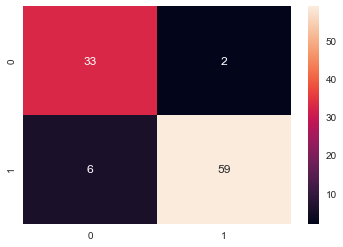

In [85]:
#Creating confusion matrix heatmap
ac = metrics.accuracy_score(y, predictions)
print('Accuracy is: ',ac)
cm = metrics.confusion_matrix(y, predictions)
sns_plot = sns.heatmap(cm,annot=True,fmt="d")
# plt.savefig("Logreg_CM.png",transparent=True)
plt.show()

<center>**Interpreting Classification Evaluation Measures**</center>

* <center>**Confusion Matrix**</center>

| n = 100   | Predicted: 0 | Predicted: 1 | Total |
|-----------|--------------|--------------|-------|
| Actual: 0 | 33           | 2            | 35    |
| Actual: 1 | 6            | 59           | 65    |
| Total     | 39           | 61           | 100   |

* This model is providing an accuracy of 92 % on our training set
* We can observe that when actual violent is '0' our model has correctly predicted these zeroes 33 times. whereas the rest 2 times it predicted it to be '1', providing us with a good recall rate for both zeros and ones
* We are also getting a good precision and f1 score


### <hr>3.3 Logistic Regression <font color="#EC407A">Testing</font>

In [86]:
X_test_predict = logreg.predict(df_X_test)

In [87]:
X_test_mod_out_log = pd.DataFrame({'Actual_Churn':df_y_test,'Predicted_Churn':X_test_predict})
X_test_mod_out_log

Actual_Churn  Predicted_Churn
1241             0                0
774              0                0
27               1                1
1818             1                1
1816             1                1
1783             1                1
56               1                1
525              0                0
1358             0                0
191              0                0
1770             1                0
1276             0                0
584              0                0
545              1                1
1616             1                0
1618             1                1
1741             1                1
874              1                1
936              1                1
1299             0                0
1016             1                1
1865             0                0
685              0                0
28               1                1
638              1                1
1856             0                0
877              1                1
1073             0                0
1468             1                1
204              0                0
718              0                0
1254             0                0
134              1                1
264              0                0
1829             1                1
1532             1                1
1186             1                1
1156             1                1
1690             1                1
608              0                0
999              1                1
1212             1                1
1678             0                0
1127             0                0
1789             1                1
599              0                0
75               0                1
571              0                1
1642             1                0
1620             0                0
1174             1                1
530              0                0
1649             1                1
1801             0                1
31               1                1
511              1                1
487              0                0
1070             1                1
225              0                0
241              0                0
399              1                1
814              0                0
57               0                1
1508             1                1
1472             1                1
250              0                0
682              0                0
499              1                1
110              1                1
1387             1                1
1831             1                1
1286             0                0
173              1                1
1826             1                0
1712             1                1
1023             0                0
1728             0                0
904              0                0
644              1                1
329              1                1
107              1                1
517              1                1
1568             1                1
1503             1                1
1138             1                1
830              1                1
723              1                1
391              0                0
433              1                1
1469             1                1
1566             1                0
1601             1                1
71               1                1
1160             1                1
503              1                1
1630             0                0
900              1                1
538              0                0
170              1                1
670              1                1
1704             1                1
592              0                0
416              1                1
1383             0                0
1782             1                1
355              0                0
1564             1                1
1130             1                1
891              1                1
1087             0                0
1551      

In [88]:
y = X_test_mod_out_log.Actual_Churn
predictions = X_test_mod_out_log.Predicted_Churn
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.9126559714795008
Confusion matrix: 
 [[228  15]
 [ 34 284]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.94      0.90       243
          1       0.95      0.89      0.92       318

avg / total       0.92      0.91      0.91       561



### <hr>3.3 Logistic Regression <font color="#EC407A">10 Fold Cross Validation</font>

In [89]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), df_X, df_y, scoring='f1', cv=10)
print(scores)
print(scores.mean())

[0.89  0.958 0.948 0.933 0.927 0.943 0.967 0.947 0.854 0.829]
0.9197682412207548


C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
scores = cross_val_score(LogisticRegression(), df_X, df_y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.856 0.952 0.941 0.925 0.919 0.935 0.962 0.941 0.833 0.801]
0.9067606808119143


In [91]:
scores = cross_val_score(LogisticRegression(), df_X, df_y, scoring='average_precision', cv=10)
print(scores)
print(scores.mean())

[0.946 0.995 0.986 0.973 0.98  0.982 0.988 0.986 0.949 0.899]
0.968438467195441


In [92]:
scores = cross_val_score(LogisticRegression(), df_X, df_y, scoring='recall', cv=10)
print(scores)
print(scores.mean())

[0.982 0.919 0.91  0.891 0.864 0.9   0.945 0.9   0.827 0.818]
0.8956265356265357


### <hr>3.4 Logistic Regression <font color="#EC407A">ROC Curve</font>

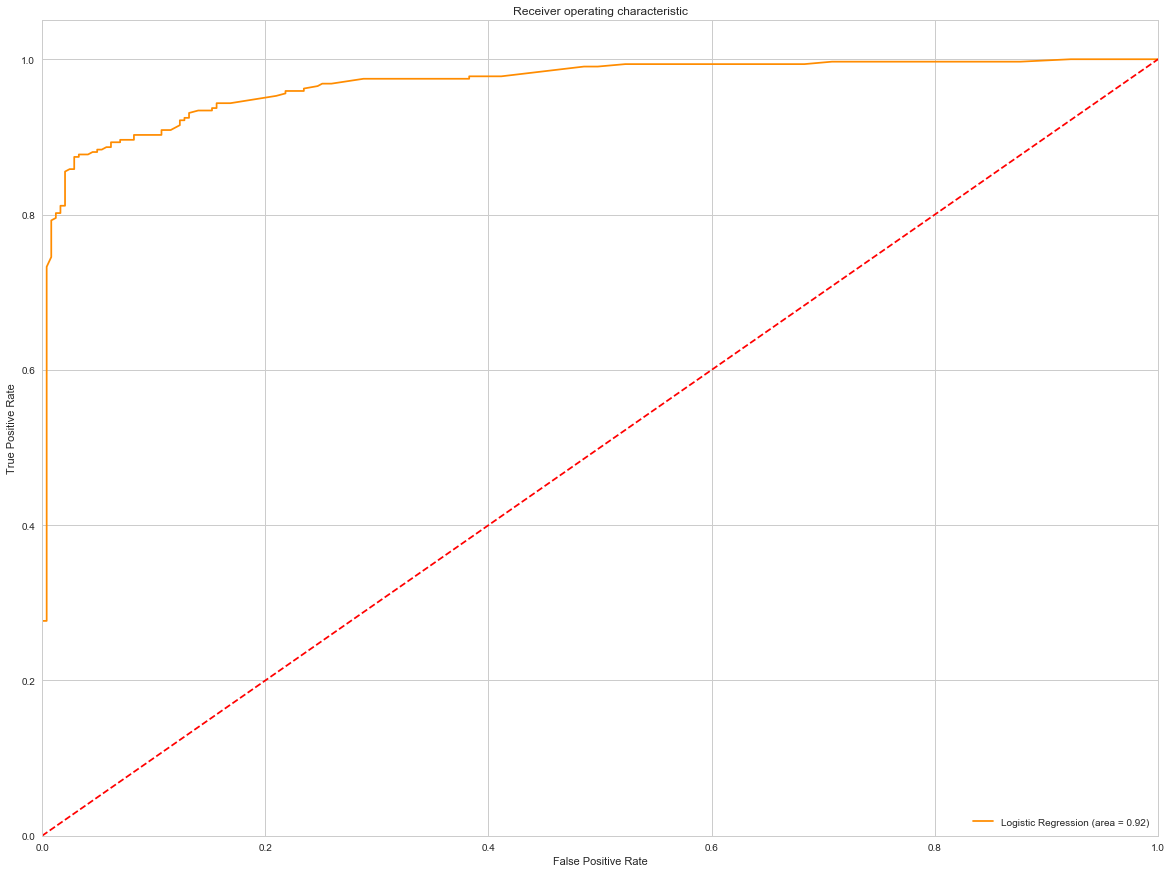

In [93]:
X_test = df_X_test
y_test = df_y_test
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
sns.set_style("whitegrid")
plt.figure()
plt.subplots(figsize=(20,15))
plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# plt.savefig('logreg_ROC.png',transparent=True)

### <hr>3.6 Logistic Regression <font color="#EC407A">Summary</font>

> * Logistic Regression has performed sufficiently well on the dataset by providing us an average accuracy rate of 92 %
* ROC Curve shows that the model is far off from the random classifier line towards the 100% mark of TPR which is shows the model is performing significantly well.


##### WE WILL NOW MOVE TO CHECK HOW MUCH ACCURACY WILL RANDOM FOREST PROVIDE US

## <hr> 4. Modelling <font color="#5C6BC0">Random Forest Classifier</font>

### 4.1 Random Forest Classifier <font color="#EC407A">Feature Selection</font>

In [94]:
# Splitting into test and training set randomly -- random_state = 100  is the seed for split function
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X_norm, df_y, test_size = 0.3, random_state = 100)

In [95]:
from sklearn.ensemble import RandomForestClassifier
# Training the model in random forest model and printing the coeficients for each feature

rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(df_X_train, df_y_train)
# pd.DataFrame({'feature': df_X_train.columns, 'importance':rfc.feature_importances_})

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [96]:
rfc_imp = pd.DataFrame()
rfc_imp['Features']=df_X_norm.columns
rfc_imp['Rel']=rfc.feature_importances_

In [97]:
# Selecting the top 20 features as per their fit scores with violent
rfc_imp.sort_values(by='Rel', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(25)

Features       Rel
77         Radical_Behaviors_10.0  0.262891
76          Radical_Behaviors_9.0  0.079898
72          Radical_Behaviors_5.0  0.031208
48    Ideological_Sub_Category1_6  0.020535
74          Radical_Behaviors_7.0  0.014041
73          Radical_Behaviors_6.0  0.012843
42      Radicalization_Far_Left_1  0.011210
75          Radical_Behaviors_8.0  0.009795
205              Radical_Friend_3  0.008790
12             Group_Membership_3  0.008623
206              Radical_Family_0  0.008609
27                       Clique_1  0.008233
211        Radical_Signif_Other_0  0.007756
40      Radicalization_Islamist_1  0.007513
3              Current_Status_3.0  0.007457
57   Ideological_Sub_Category1_15  0.007396
53   Ideological_Sub_Category1_11  0.006948
24                 Role_Group_2.0  0.006865
204              Radical_Friend_2  0.006013
44    Ideological_Sub_Category1_2  0.005628
36    Internet_Radicalization_-88  0.005600
112           Broad_Ethnicity_1.0  0.005557
230                    Angry_US_1  0.005478
118              Marital_Status_1  0.005475
123        Religious_Background_0  0.005412

We can see that both Chi Square and RFC Importance has provided us with quite a similar set of important features hence we will go ahead select these features to perform our predictions.
Selecting 25 features is performed here iteratively to see which features can be best selected to provide the most accurate prediction

In [98]:
df_X_norm_FS = df_X_norm[['Radical_Behaviors_10.0','Radical_Behaviors_9.0','Radical_Behaviors_5.0','Ideological_Sub_Category1_6','Radical_Behaviors_7.0','Radical_Behaviors_6.0','Radicalization_Far_Left_1','Radical_Behaviors_8.0','Radical_Friend_3','Group_Membership_3','Radical_Family_0','Clique_1','Radical_Signif_Other_0','Radicalization_Islamist_1','Current_Status_3.0','Ideological_Sub_Category1_15','Ideological_Sub_Category1_11','Role_Group_2.0','Radical_Friend_2','Ideological_Sub_Category1_2','Internet_Radicalization_-88','Broad_Ethnicity_1.0','Angry_US_1','Marital_Status_1','Religious_Background_0']]

### <hr>4.2 Random Forest Classifier <font color="#EC407A">Training</font>

In [99]:
# Splitting the new created X into train and test
# Splitting into test and training set randomly -- random_state = 100  is the seed for split function
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X_norm_FS, df_y, test_size = 0.3, random_state = 100)
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(df_X_train, df_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [100]:
#Predicting probabilities
rfc.predict_proba(df_X_train.head(100))

array([[0.02 , 0.98 ],
       [0.939, 0.061],
       [0.03 , 0.97 ],
       [0.   , 1.   ],
       [0.021, 0.979],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.98 , 0.02 ],
       [0.966, 0.034],
       [0.86 , 0.14 ],
       [0.05 , 0.95 ],
       [0.   , 1.   ],
       [0.917, 0.083],
       [0.564, 0.436],
       [0.   , 1.   ],
       [0.01 , 0.99 ],
       [1.   , 0.   ],
       [0.2  , 0.8  ],
       [0.963, 0.037],
       [0.89 , 0.11 ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.31 , 0.69 ],
       [0.77 , 0.23 ],
       [0.897, 0.103],
       [0.012, 0.988],
       [0.   , 1.   ],
       [0.897, 0.102],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.329, 0.671],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.27 , 0.73 ],
       [0.08 , 0.92 ],
       [0.02 , 0.98 ],
       [0.965, 0.035],
       [0.98 , 0.02 ],
       [0.629, 0.371],
       [0.   , 1.   ],
       [0.91 , 0.09 ],
       [0. 

### <hr>4.3 Random Forest Classifier <font color="#EC407A">Validation</font>

In [101]:
rfc_predictions = rfc.predict(df_X_train.head(100))
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': df_y_train.head(100), 'PredictedClass': rfc_predictions})
df_true_vs_rfc_predicted

ActualClass  PredictedClass
344             1               1
834             0               0
734             1               1
195             1               1
47              1               1
650             1               1
1693            1               1
490             0               0
1021            0               0
654             0               0
91              1               1
777             1               1
652             0               0
977             1               0
1122            1               1
1162            1               1
991             0               0
646             1               1
1744            0               0
1017            0               0
629             1               1
1089            1               1
667             1               1
725             1               1
315             1               1
1664            0               0
1825            0               0
171             1               1
941             1               1
531             0               0
508             1               1
731             1               1
1792            1               1
1390            1               1
784             0               0
10              1               1
105             1               1
44              1               1
815             0               0
1131            0               0
1758            0               0
1227            1               1
1411            0               0
1653            1               1
1301            1               1
740             0               0
1754            0               0
559             0               0
432             0               0
1554            0               0
133             1               1
1487            1               1
1429            0               0
24              1               1
1582            1               1
789             1               1
1496            1               1
610             0               0
570             0               0
501             1               1
843             1               1
1257            0               0
302             1               1
1007            1               1
1443            1               1
993             1               1
82              1               1
1195            0               0
1025            0               0
951             1               1
766             0               0
1389            1               1
479             1               1
1528            1               1
48              1               1
962             0               0
622             1               1
1248            1               1
1180            1               1
562             1               1
1672            1               1
773             1               1
1129            1               1
1394            1               1
309             0               0
92              1               1
1504            1               1
1045            1               1
1539            1               1
312             0               0
857             1               1
1132            0               0
1093            1               1
1585            1               1
1140            1               1
1085            1               1
1420            1               1
590             0               0
1245            0               0
902             0               0

In [102]:
print("Accuracy: ", metrics.accuracy_score(df_y_train.head(100), rfc_predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df_y_train.head(100), rfc_predictions))
print("Classification report:\n ", metrics.classification_report(df_y_train.head(100), rfc_predictions))

Accuracy:  0.99
Confusion matrix: 
 [[35  0]
 [ 1 64]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      1.00      0.99        35
          1       1.00      0.98      0.99        65

avg / total       0.99      0.99      0.99       100



<center>**Interpreting Classification Evaluation Measures**</center>

* <center>**Confusion Matrix**</center>

| n = 100   | Predicted: 0 | Predicted: 1 | Total |
|-----------|--------------|--------------|-------|
| Actual: 0 | 35           | 0            | 35    |
| Actual: 1 | 1            | 64           | 65    |
| Total     | 36           | 64           | 100   |

We can see that Random Forest Classifier has provided us with an accuracy, f1 score precision and recall rate of 99%, which is far better than Logistic Regression

### <hr>4.4 Random Forest Classifier <font color="#EC407A">Testing</font>

In [103]:
X_test_predict = rfc.predict(df_X_test)
df_true_test_vs_rfc_predicted = pd.DataFrame({'ActualClass': df_y_test, 'PredictedClass': X_test_predict})
df_true_test_vs_rfc_predicted

ActualClass  PredictedClass
1241            0               0
774             0               0
27              1               1
1818            1               1
1816            1               1
1783            1               1
56              1               1
525             0               0
1358            0               0
191             0               0
1770            1               0
1276            0               0
584             0               0
545             1               1
1616            1               0
1618            1               1
1741            1               1
874             1               1
936             1               1
1299            0               0
1016            1               1
1865            0               0
685             0               0
28              1               0
638             1               1
1856            0               0
877             1               1
1073            0               0
1468            1               1
204             0               1
718             0               1
1254            0               0
134             1               1
264             0               0
1829            1               1
1532            1               1
1186            1               1
1156            1               1
1690            1               1
608             0               0
999             1               1
1212            1               1
1678            0               0
1127            0               0
1789            1               1
599             0               0
75              0               1
571             0               0
1642            1               0
1620            0               0
1174            1               1
530             0               1
1649            1               1
1801            0               0
31              1               1
511             1               1
487             0               0
1070            1               1
225             0               0
241             0               0
399             1               1
814             0               0
57              0               1
1508            1               0
1472            1               1
250             0               0
682             0               0
499             1               1
110             1               1
1387            1               1
1831            1               1
1286            0               0
173             1               1
1826            1               0
1712            1               0
1023            0               0
1728            0               0
904             0               0
644             1               1
329             1               1
107             1               1
517             1               1
1568            1               1
1503            1               1
1138            1               1
830             1               1
723             1               1
391             0               0
433             1               1
1469            1               1
1566            1               1
1601            1               1
71              1               1
1160            1               1
503             1               1
1630            0               0
900             1               1
538             0               0
170             1               1
670             1               1
1704            1               1
592             0               0
416             1               1
1383            0               0
1782            1               1
355             0               0
1564            1               1
1130            1               1
891             1               1
1087            0               0
1551            1               1
1042            1               1
347             0               0
568             0               0
330             0               0
474             0               0
23              1           

In [104]:
print("Accuracy: ", metrics.accuracy_score(df_y_test, X_test_predict))
print("Confusion matrix: \n", metrics.confusion_matrix(df_y_test, X_test_predict))
print("Classification report:\n ", metrics.classification_report(df_y_test, X_test_predict))

Accuracy:  0.8859180035650623
Confusion matrix: 
 [[220  23]
 [ 41 277]]
Classification report:
               precision    recall  f1-score   support

          0       0.84      0.91      0.87       243
          1       0.92      0.87      0.90       318

avg / total       0.89      0.89      0.89       561



On the holdout we are getting a 10% decrease in the accuracy and f2 score. But still this isn't bad

### <hr>4.5 Random Forest Classifier <font color="#EC407A">10 Fold Cross Validation</font>

In [105]:
#f1
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), df_X, df_y, scoring='f1', cv=10)
print(scores)
print(scores.mean())

[0.867 0.953 0.948 0.925 0.927 0.947 0.95  0.928 0.857 0.852]
0.9152558860900581


In [106]:
#accuracy
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), df_X, df_y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.83  0.947 0.941 0.914 0.919 0.941 0.941 0.919 0.839 0.823]
0.9014244039164302


In [107]:
#average_precision
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), df_X, df_y, scoring='average_precision', cv=10)
print(scores)
print(scores.mean())

[0.917 0.988 0.983 0.969 0.979 0.982 0.987 0.978 0.924 0.911]
0.9619531528996532


In [108]:
#recall
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), df_X, df_y, scoring='recall', cv=10)
print(scores)
print(scores.mean())

[0.937 0.91  0.901 0.891 0.864 0.9   0.945 0.873 0.818 0.864]
0.8902293202293201


### <hr>4.6 Random Forest Classifier <font color="#EC407A">ROC Curve</font>

In [109]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
false_positive, true_positive, _ = roc_curve(df_y_test, X_test_predict)
auc = roc_auc_score(df_y_test, X_test_predict)

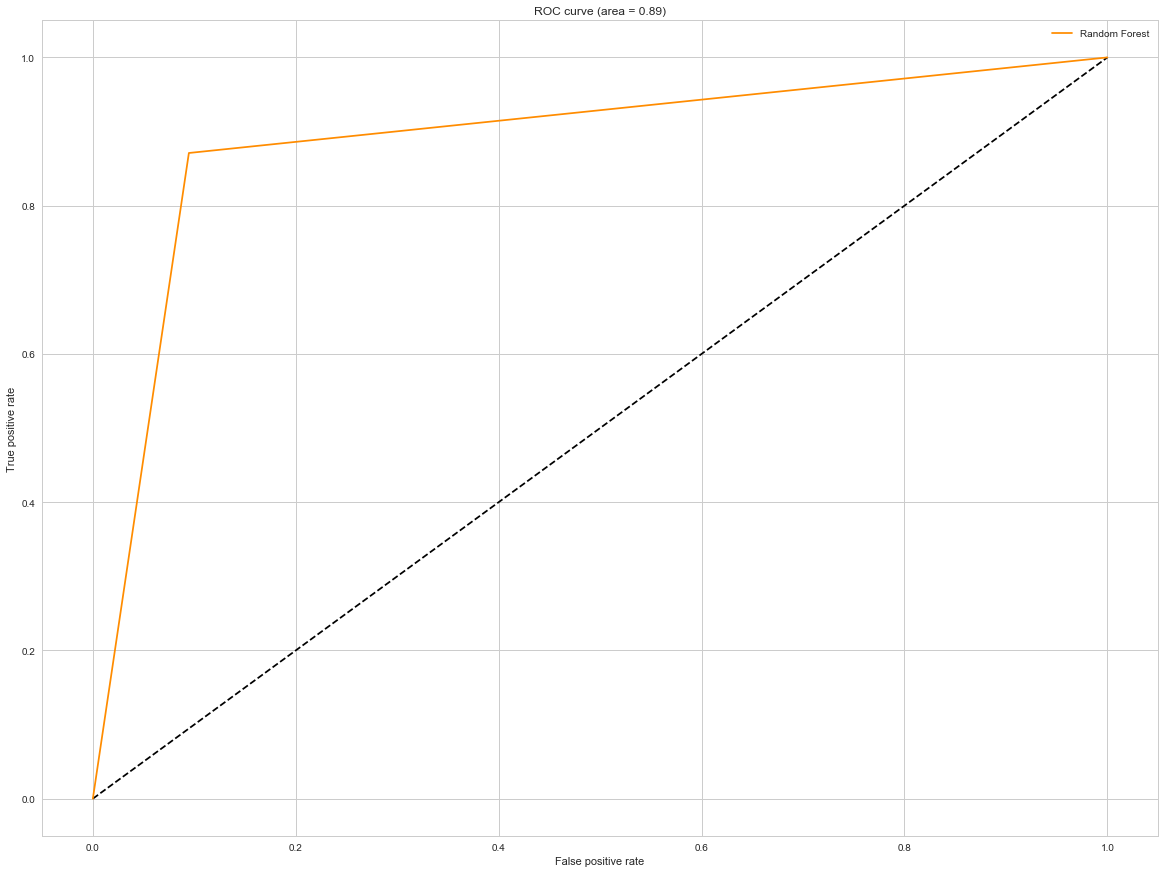

In [110]:
plt.figure()
plt.subplots(figsize=(20,15))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (area = %0.2f)' % auc)
plt.legend(loc='best')
plt.show()
# plt.savefig('RFC_ROC.png',transparent=True)

### <hr>4.7 Random Forest Classifier <font color="#EC407A">Summary</font>

> * Evidently we can see that RFC has also performed quite similarly as Logistic Regression. We made sure that the features selected for the classification for RFC is in align with its learned importance. Not much iteration was done during feature selection otherwise the accuracy of this model can also be increased. There is some difference in results as shown in the presentation and here since for the presentation the features for RFC as well were selected from Chi2 mechanism

<r>

<hr>

## 5. Summary

We can see that both the models perform quite similarly. Accuracy by Logisitc Regresion is around 92% on a 10 fold cross validated data set whereas that with Random Forest Classifier in around 89%.<br>
It seems that both the models agree on to following features as a good predictor for an individual to be violent or not
* Whether the individual has shown Radical Behaviours
* Whether the individual has a Group Ideology [White Supremist, Islamist, etc.]
* Whether the individual is a part of a Extremist Group
* Whether the individual has a Radical Friend
* Whether the individual has a Radical Family
* Individuals marital status
etc...<br>
It seems that if we have enough information about individuals socio economic background, family background, education status we can provide a good prediction of an accuracy of 92% whether the extremist individual turn violent or not.

## <hr>Plots for the Presentation

## PLOTS: <font color="#FF5722">Trend of Radicalisation in Dataset</font>

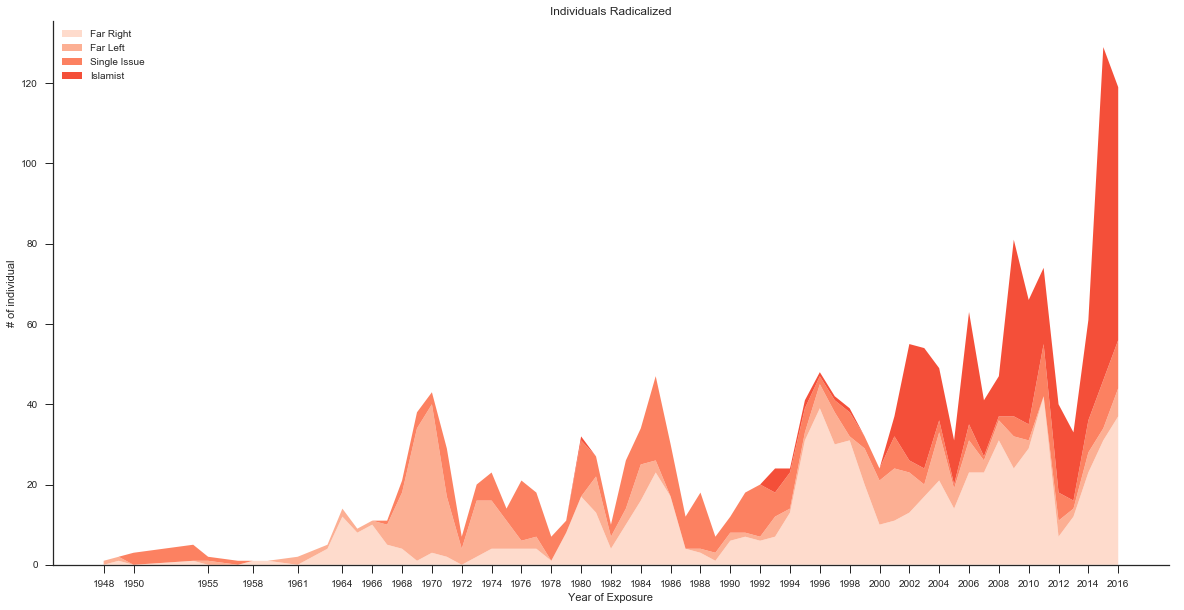

In [111]:
# Plotting the stacked area chart for Radicalised Ideology
import datetime as dt
dateExp = pd.DataFrame()
dateExp['date'] = pd.to_datetime(df['Date_Exposure'])
dateExp['year'] = dateExp['date'].dt.year
dateExp.drop('date',axis=1,inplace=True)
dateExp['Rad_Far_Right'] = df['Radicalization_Far_Right']
dateExp['Rad_Far_Left'] = df['Radicalization_Far_Left']
dateExp['Rad_Single_Issue'] = df['Radicalization_Single_Issue']
dateExp['Rad_Islamist'] = df['Radicalization_Islamist']
RadGroup = dateExp.groupby('year')[["Rad_Far_Right","Rad_Far_Left","Rad_Single_Issue","Rad_Islamist"]].sum()
x = RadGroup.index.tolist()
y = []
for cols in RadGroup.columns:
    y.append(RadGroup[cols].tolist())
    
sns.set()
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette("Reds")
f,ax = plt.subplots(figsize=(20,10))
plt.stackplot(x,y, labels=['Far Right','Far Left','Single Issue','Islamist'])
plt.legend(loc='upper left')
ax.set_xticks(x[::2])
ax.set_xlabel('Year of Exposure')
ax.set_ylabel('# of individual')
ax.set_title('Individuals Radicalized')
# fig = plt.figure()
# plt.suptitle('Individuals Radicalized', fontsize=20)
sns.despine()
# plt.savefig('stackedAreaChart.png', transparent=True)
plt.show()


## PLOTS: <font color="#D81B60">Ideologies</font>

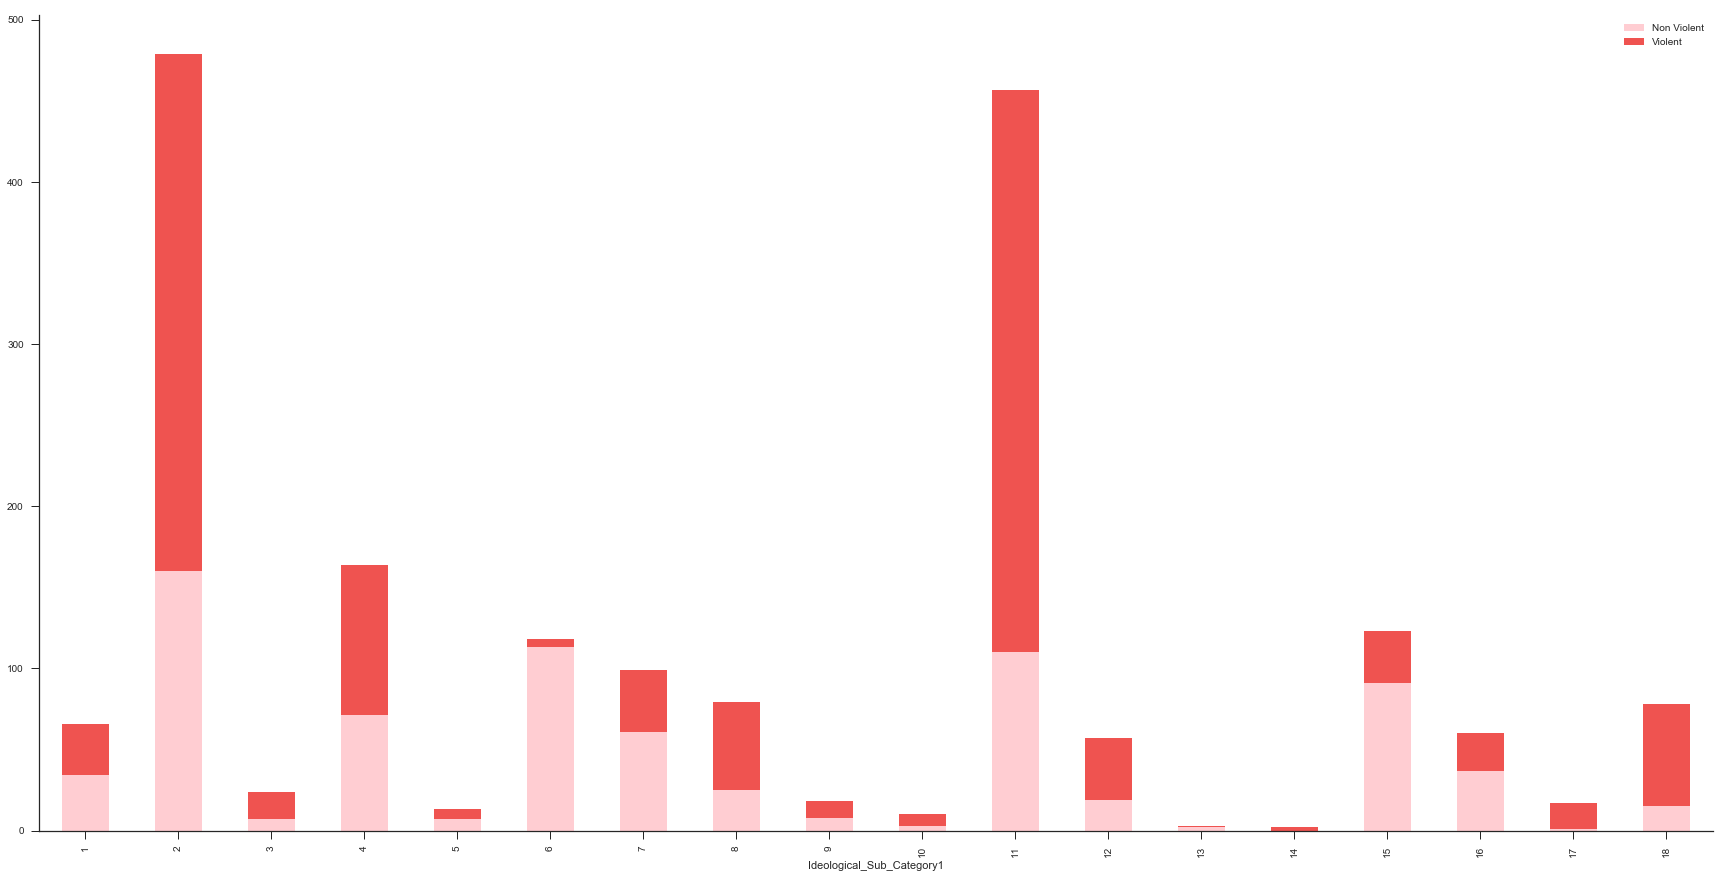

In [112]:
IdeoSC = pd.DataFrame(df[['Ideological_Sub_Category1','Violent']])
violent = pd.get_dummies(IdeoSC['Violent'],prefix="Violent_",drop_first=False)
IdeoSC = pd.concat([IdeoSC,violent],axis=1)
IdeoSC.drop('Violent',axis=1,inplace=True)
colors = ["#ffcdd2","#ef5350"]
sns.set_palette(sns.color_palette(colors))
IdeoGroup = IdeoSC.groupby('Ideological_Sub_Category1')[['Violent__0','Violent__1']].sum()
IdeoGroup.rename(columns={"Violent__0":"Non Violent","Violent__1":"Violent"},inplace=True)
IdeoGroup.plot.bar(stacked=True,figsize=(30,15))
sns.despine()
plt.show()
# plt.savefig('IdeoLogyChart.png', transparent=True)
# IdeoGroup.plot(kind='pie', subplots=True, figsize=(30,15),autopct='%.2f')

## PLOTS: <font color="#00BCD4">Role in a Group</font>

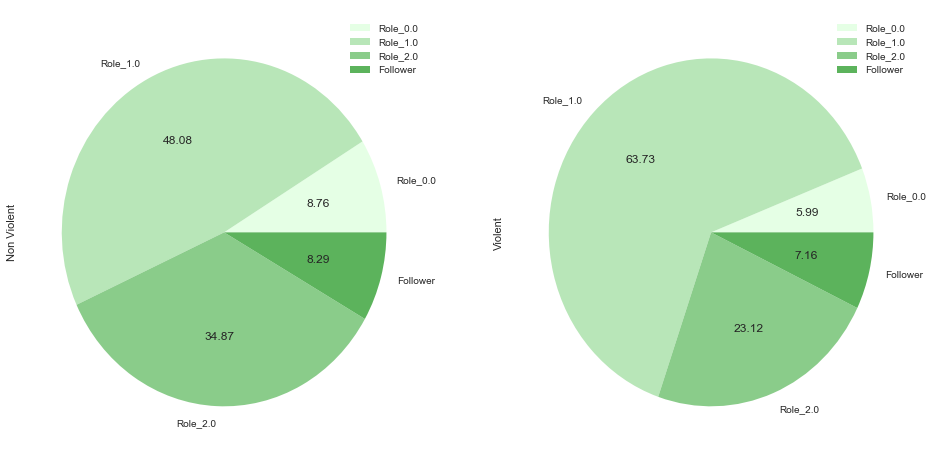

In [113]:
#Plotting Role in a Group
rg = pd.get_dummies(df['Role_Group'],prefix="Role",drop_first=True)
rgn = pd.concat([df['Violent'],rg],axis=1)
rgGroup = rgn.groupby('Violent').sum()
rgT = rgGroup.T
rgT.rename(columns={0:"Non Violent",1:"Violent"},index={"Role_-88":"NA","Role_0":"Loose Assc","Role_1":"Follower","Role_2":"Leader"},inplace=True)
sns.set_palette(sns.light_palette("green"))
rgT.plot(kind='pie', subplots=True, figsize=(16,8),autopct='%.2f')
plt.show()
# plt.savefig("roleGroup.png",transparent=True)

## PLOTS: <font color="#90CAF9">Radical Friend</font>

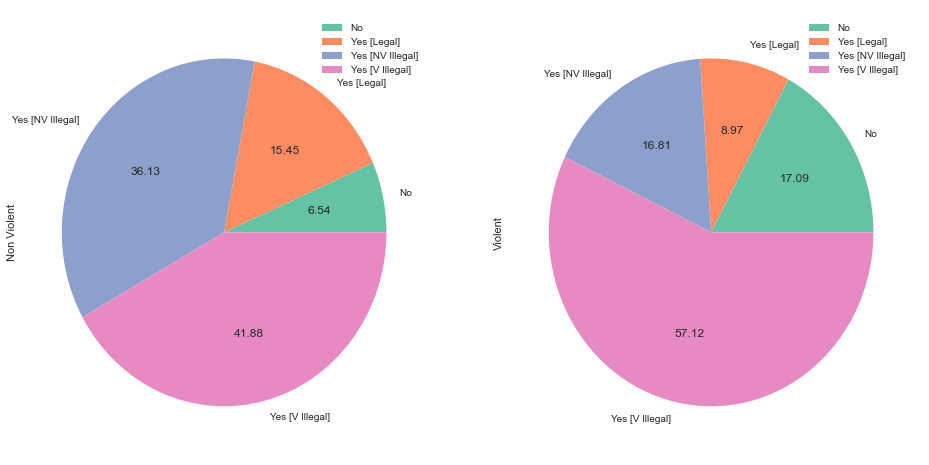

In [114]:
#Plotting Role in a Group
rg = pd.get_dummies(df['Radical_Friend'],prefix="Radical_Friend",drop_first=True)
rgn = pd.concat([df['Violent'],rg],axis=1)
rgGroup = rgn.groupby('Violent').sum()
rgT = rgGroup.T
rgT
rgT.rename(columns={0:"Non Violent",1:"Violent"},index={"Radical_Friend_0":"No","Radical_Friend_1":"Yes [Legal]","Radical_Friend_2":"Yes [NV Illegal]","Radical_Friend_3":"Yes [V Illegal]"},inplace=True)
sns.set_palette(sns.color_palette("Set2", 10))
rgT.plot(kind='pie', subplots=True, figsize=(16,8),autopct='%.2f')
plt.show()
# plt.savefig("radFriend.png",transparent=True)

## PLOTS: <font color="#90CAF9">Radical Family</font>

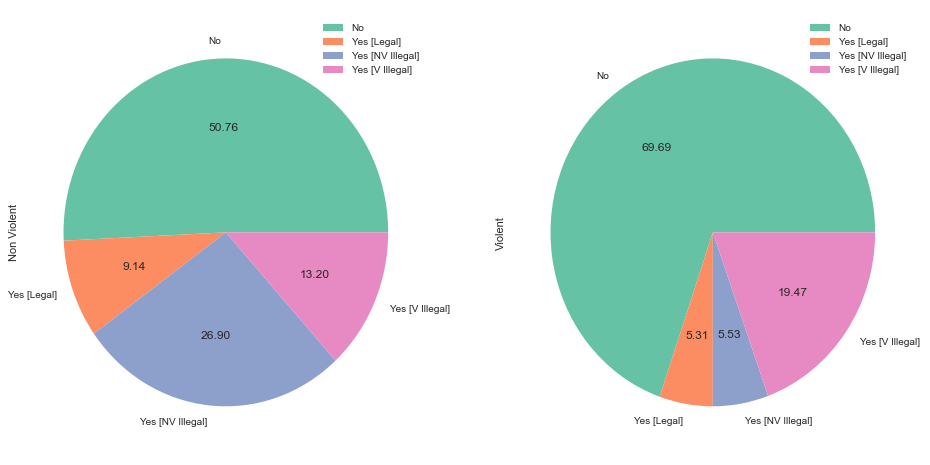

In [115]:
#Plotting Role in a Group
rg = pd.get_dummies(df['Radical_Family'],prefix="Radical_Family",drop_first=True)
rgn = pd.concat([df['Violent'],rg],axis=1)
rgGroup = rgn.groupby('Violent').sum()
rgT = rgGroup.T
rgT
rgT.rename(columns={0:"Non Violent",1:"Violent"},index={"Radical_Family_0":"No","Radical_Family_1":"Yes [Legal]","Radical_Family_2":"Yes [NV Illegal]","Radical_Family_3":"Yes [V Illegal]"},inplace=True)
sns.set_palette(sns.color_palette("Set2", 10))
rgT.plot(kind='pie', subplots=True, figsize=(16,8),autopct='%.2f')
plt.show()
# plt.savefig("radFamily.png",transparent=True)

## PLOTS: <font color="#d32f2f">WordCloud</font>

In [116]:
# import numpy as np
# import csv
# import random
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from palettable.colorbrewer.diverging import RdYlGn_9
# stopwords = set(STOPWORDS)
# stopwords.add("City")
# stopwords.add("County")
# from os import path
# d = path.dirname("Words.csv")
# def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)
# # def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
# #     return tuple(RdYlGn_9.colors[random.randint(0,8)])

# csv_path = "Words.csv"
# font_path = "mplus-1m-regular.ttf"

# icon="github"

# words_array = []
# with open(csv_path, 'r') as csvfile:
#     reader = csv.DictReader(csvfile)
#     for row in reader:
#         if row['Word'] not in STOPWORDS:
#             words_array.append(row['Word'].upper())

# # http://stackoverflow.com/questions/7911451/pil-convert-png-or-gif-with-transparency-to-jpg-without
# icon_path = "us-map.png"
# icon = Image.open(icon_path)
# # image_colors = ImageColorGenerator(np.array(icon))
# mask = Image.new("RGBA", icon.size, (255,255,255,1))
# mask.paste(icon,icon)
# mask = np.array(mask)

# wc = WordCloud(font_path=font_path, background_color=None, max_words=30000, mask=mask,
#                max_font_size=100, mode="RGBA")
               
# # generate word cloud
# wc.generate(' '.join(words_array))
# wc.recolor(color_func=grey_color_func)
# plt.show()
# # wc.to_file("github_wordcloud4.png")